In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 680.19it/s]
100%|██████████| 720/720 [00:08<00:00, 89.77it/s]
8280it [00:00, 228585.97it/s]
7920it [00:00, 214768.50it/s]
720it [00:00, 749.76it/s]
100%|██████████| 720/720 [00:08<00:00, 88.24it/s]
8280it [00:00, 220845.49it/s]
720it [00:00, 766.86it/s]
100%|██████████| 720/720 [00:08<00:00, 89.68it/s]
8280it [00:00, 78237.66it/s]
700it [00:00, 790.23it/s]
100%|██████████| 700/700 [00:07<00:00, 95.47it/s] 
8280it [00:00, 216420.85it/s]
509it [00:00, 1110.15it/s]
100%|██████████| 509/509 [00:02<00:00, 185.47it/s]
3664it [00:00, 224914.09it/s]
700it [00:00, 763.27it/s]
100%|██████████| 700/700 [00:07<00:00, 95.86it/s] 
8280it [00:00, 168953.20it/s]
700it [00:00, 721.13it/s]
100%|██████████| 700/700 [00:07<00:00, 96.05it/s] 
8280it [00:00, 223396.91it/s]
710it [00:01, 358.93it/s]
100%|██████████| 710/710 [00:07<00:00, 91.98it/s] 
8280it [00:00, 221431.27it/s]
710it [00:01, 365.72it/s]
100%|██████████| 710/710 [00:07<00:00, 93.61it/s] 
8280it [00:00, 196501.21it/s]
710it [00:

In [8]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.25581


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.079803


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.088381


100%|██████████| 248/248 [00:19<00:00, 12.68it/s]


Mean val loss: 0.070369


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.084379


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.07349
EarlyStopping counter: 1 out of 10
Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.082074


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.055683


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.080983


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.054796


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.079752


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.048992


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.078858


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.049059


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077419


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.046212


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.077009


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.046244


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.07623


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.039359


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.075075


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.039903
EarlyStopping counter: 1 out of 10
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074924


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.051737
EarlyStopping counter: 2 out of 10
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.074603


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.037879


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073449


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.034816


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073714


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.032704


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073642


100%|██████████| 248/248 [00:19<00:00, 12.68it/s]


Mean val loss: 0.032561


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073114


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035408
EarlyStopping counter: 1 out of 10
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073084


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.033161
EarlyStopping counter: 2 out of 10
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.072742


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03873
EarlyStopping counter: 3 out of 10
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.07216


100%|██████████| 248/248 [00:19<00:00, 12.69it/s]


Mean val loss: 0.031387


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.072572


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035068
EarlyStopping counter: 1 out of 10
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.073534


100%|██████████| 248/248 [00:19<00:00, 12.64it/s]


Mean val loss: 0.028925


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071798


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.030905
EarlyStopping counter: 1 out of 10
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071496


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.034213
EarlyStopping counter: 2 out of 10
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071668


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.028814


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071973


100%|██████████| 248/248 [00:19<00:00, 15.23it/s]


Mean val loss: 0.028361


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071588


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.030632
EarlyStopping counter: 1 out of 10
Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071029


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.027082


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071145


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.027996
EarlyStopping counter: 1 out of 10
Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.071379


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.026817


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070897


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.02883
EarlyStopping counter: 1 out of 10
Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070833


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.029393
EarlyStopping counter: 2 out of 10
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070767


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.035981
EarlyStopping counter: 3 out of 10
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070401


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.02586


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070911


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.03086
EarlyStopping counter: 1 out of 10
Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069998


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.038781
EarlyStopping counter: 2 out of 10
Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070344


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025985
EarlyStopping counter: 3 out of 10
Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070014


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.025218


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 38...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069733


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025796
EarlyStopping counter: 1 out of 10
Epoch 39...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.070012


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026815
EarlyStopping counter: 2 out of 10
Epoch 40...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069421


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.02511


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 41...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069315


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.024053


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 42...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069092


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024637
EarlyStopping counter: 1 out of 10
Epoch 43...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069388


100%|██████████| 248/248 [00:19<00:00, 15.14it/s]


Mean val loss: 0.024103


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 44...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.069105


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026514
EarlyStopping counter: 1 out of 10
Epoch 45...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068271


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.027574
EarlyStopping counter: 2 out of 10
Epoch 46...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067768


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025036
EarlyStopping counter: 3 out of 10
Epoch 47...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068575


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024637
EarlyStopping counter: 4 out of 10
Epoch 48...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068148


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025125
EarlyStopping counter: 5 out of 10
Epoch 49...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068255


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026093
EarlyStopping counter: 6 out of 10
Epoch 50...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067986


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025725
EarlyStopping counter: 7 out of 10
Epoch 51...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067646


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.024021


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 52...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.068056


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.023967


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067685


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.023643


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067281


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024207
EarlyStopping counter: 1 out of 10
Epoch 55...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067245


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.023369


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 56...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067198


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023518
EarlyStopping counter: 1 out of 10
Epoch 57...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067265


100%|██████████| 248/248 [00:19<00:00, 12.65it/s]


Mean val loss: 0.023102


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 58...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.067179


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.02331
EarlyStopping counter: 1 out of 10
Epoch 59...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06666


100%|██████████| 248/248 [00:19<00:00, 12.64it/s]


Mean val loss: 0.022866


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 60...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066606


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026216
EarlyStopping counter: 1 out of 10
Epoch 61...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066477


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.022933


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066566


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024198
EarlyStopping counter: 1 out of 10
Epoch 63...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066542


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023532
EarlyStopping counter: 2 out of 10
Epoch 64...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066439


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.022796


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 65...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066081


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023589
EarlyStopping counter: 1 out of 10
Epoch 66...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066926


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.022759


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 67...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065846


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023361
EarlyStopping counter: 1 out of 10
Epoch 68...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066548


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.026039
EarlyStopping counter: 2 out of 10
Epoch 69...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066099


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022965
EarlyStopping counter: 3 out of 10
Epoch 70...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065527


100%|██████████| 248/248 [00:19<00:00, 12.70it/s]


Mean val loss: 0.022662


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 71...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065572


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.02249


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066093


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022761
EarlyStopping counter: 1 out of 10
Epoch 73...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065445


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023336
EarlyStopping counter: 2 out of 10
Epoch 74...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065023


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022634
EarlyStopping counter: 3 out of 10
Epoch 75...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.066282


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.024856
EarlyStopping counter: 4 out of 10
Epoch 76...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065378


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023669
EarlyStopping counter: 5 out of 10
Epoch 77...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065892


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.023013
EarlyStopping counter: 6 out of 10
Epoch 78...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065468


100%|██████████| 248/248 [00:19<00:00, 15.29it/s]


Mean val loss: 0.02237


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 79...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065509


100%|██████████| 248/248 [00:19<00:00, 12.66it/s]


Mean val loss: 0.022189


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065604
Epoch    80: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022682
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065066


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.022093


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 82...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06524


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022974
EarlyStopping counter: 1 out of 10
Epoch 83...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064284


100%|██████████| 248/248 [00:19<00:00, 12.63it/s]


Mean val loss: 0.02219


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 84...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064941


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.022338


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 86...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063959


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022535
EarlyStopping counter: 1 out of 10
Epoch 87...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064762


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.022109


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 88...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063948


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.022001


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 89...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064536


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022341
EarlyStopping counter: 1 out of 10
Epoch 90...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06509


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.022123
EarlyStopping counter: 2 out of 10
Epoch 91...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064057


100%|██████████| 248/248 [00:19<00:00, 12.72it/s]


Mean val loss: 0.021836


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 92...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.065005


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.021815


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 93...


 32%|███▏      | 83/259 [00:18<00:37,  4.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063244


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021439


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 112...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063608


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021434


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 113...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063165


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.021535
EarlyStopping counter: 1 out of 10
Epoch 114...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063478


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021417


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 115...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063798


100%|██████████| 248/248 [00:19<00:00, 15.17it/s]


Mean val loss: 0.021498


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 116...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063898
Epoch   116: reducing learning rate of group 0 to 6.2500e-06.


100%|██████████| 248/248 [00:19<00:00, 12.75it/s]


Mean val loss: 0.021487


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 117...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063595


100%|██████████| 248/248 [00:19<00:00, 12.74it/s]


Mean val loss: 0.021415


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 118...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.064099


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.021446


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 119...


  9%|▉         | 24/259 [00:06<00:48,  4.88it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063636


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.021343


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063356


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.021362


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 138...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062871


100%|██████████| 248/248 [00:19<00:00, 12.56it/s]


Mean val loss: 0.021363


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 139...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062214


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021354


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 140...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063262


100%|██████████| 248/248 [00:19<00:00, 12.59it/s]


Mean val loss: 0.021345


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 141...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062807


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021389


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 142...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063032


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021349


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 143...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063789


 43%|████▎     | 107/248 [00:09<00:10, 13.48it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063643


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.02135


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 162...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062969


100%|██████████| 248/248 [00:19<00:00, 15.26it/s]


Mean val loss: 0.021332


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 163...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06288


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021335


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 164...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062397


100%|██████████| 248/248 [00:19<00:00, 12.61it/s]


Mean val loss: 0.021331


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 165...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062517


100%|██████████| 248/248 [00:19<00:00, 12.62it/s]


Mean val loss: 0.02133


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 166...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063309


100%|██████████| 248/248 [00:19<00:00, 12.55it/s]


Mean val loss: 0.021342


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 167...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062943


100%|██████████| 248/248 [00:19<00:00, 12.57it/s]


Mean val loss: 0.021324


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 168...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063188


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021348


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 169...


 25%|██▌       | 65/259 [00:14<00:41,  4.64it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021351


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0633


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021335


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063167


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021316


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06346


100%|██████████| 248/248 [00:19<00:00, 12.59it/s]


Mean val loss: 0.021351


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063225


100%|██████████| 248/248 [00:19<00:00, 12.58it/s]


Mean val loss: 0.021319


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 191...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.063288


100%|██████████| 248/248 [00:19<00:00, 12.64it/s]


Mean val loss: 0.021317


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 192...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.06274


100%|██████████| 248/248 [00:19<00:00, 12.59it/s]


Mean val loss: 0.021323


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 193...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.062662


100%|██████████| 248/248 [00:19<00:00, 12.60it/s]


Mean val loss: 0.021323


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 194...


 68%|██████▊   | 175/259 [00:37<00:17,  4.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [17]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'rb') as f:
#     results = pickle.load(f)

In [11]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [18]:
from itertools import chain

In [19]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [20]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

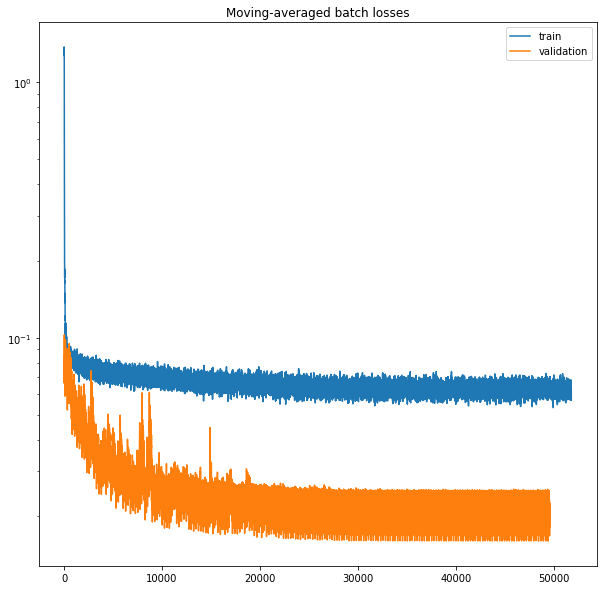

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

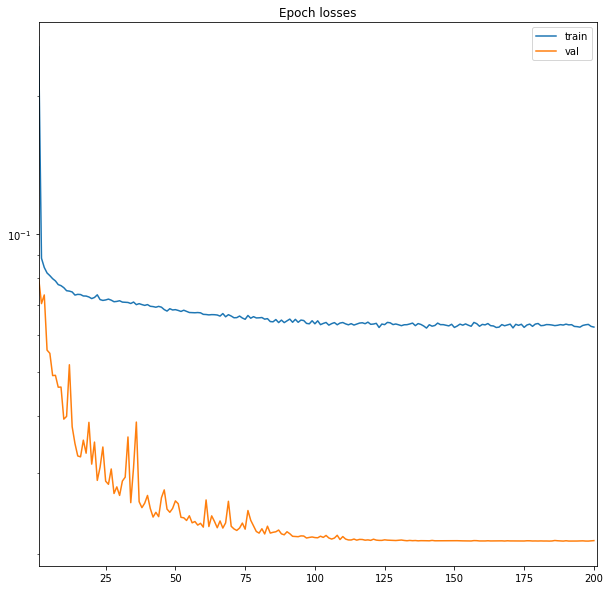

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [24]:
import os

In [25]:
import torch

In [26]:
from visualization_utils import output_to_binary, plot_sample

In [27]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

carb96558


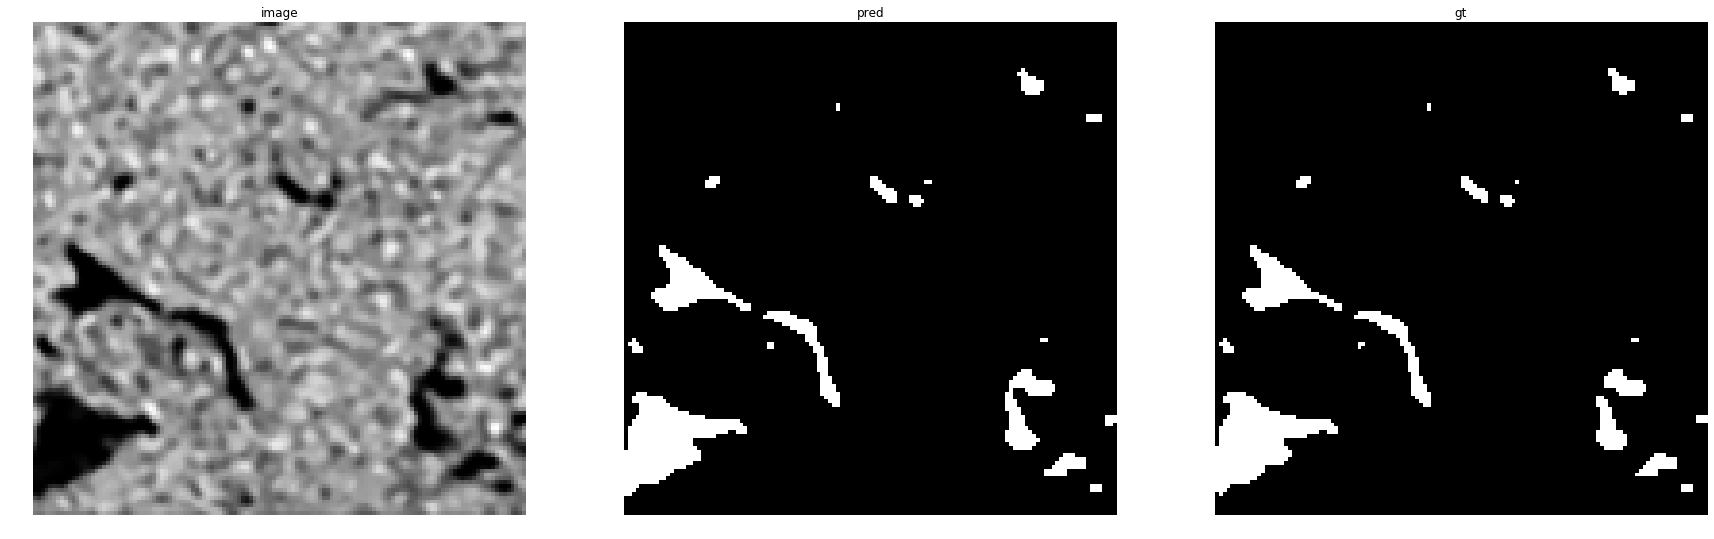

accuracy    : 0.99774169921875
precision   : 0.966804979253112
recall      : 0.9946638207043756
f1          : 0.9805365597054182
pr_auc      : 0.9987521284922758
iou         : 0.9618163054695562


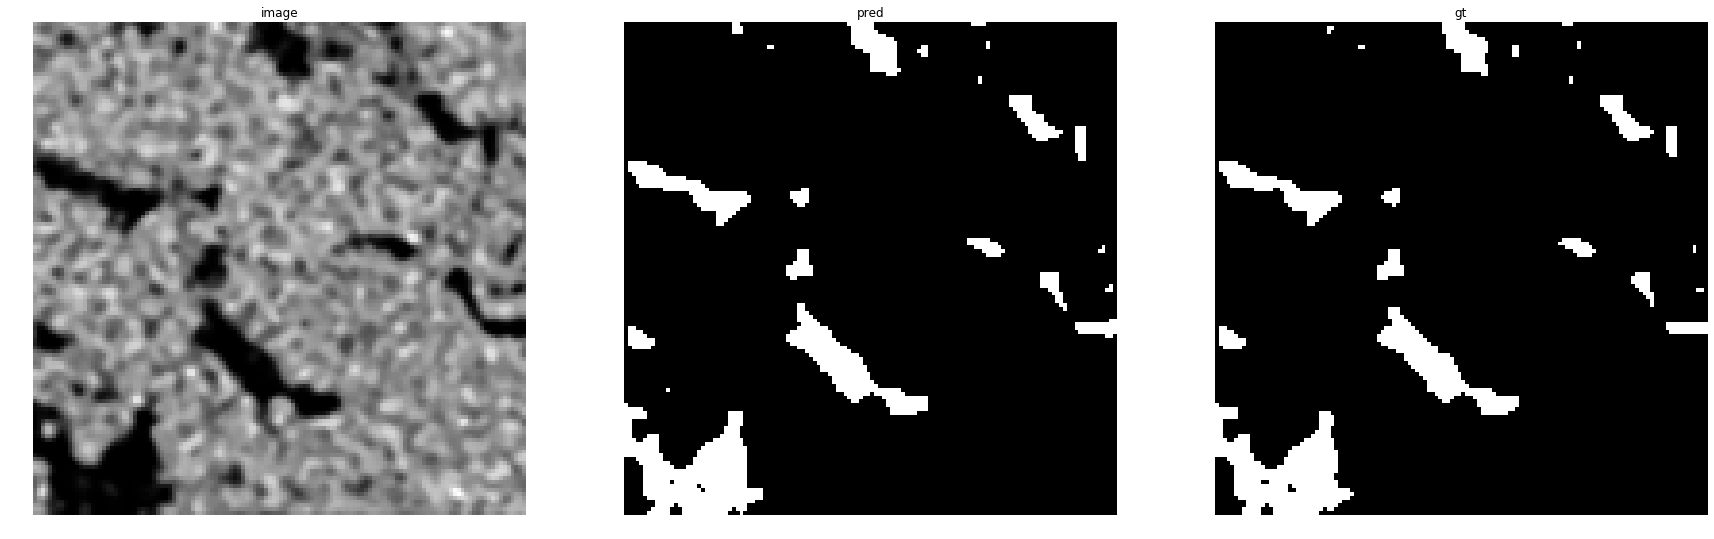

accuracy    : 0.99578857421875
precision   : 0.9553695955369595
recall      : 0.9963636363636363
f1          : 0.975436098255607
pr_auc      : 0.9987502357045825
iou         : 0.9520500347463516


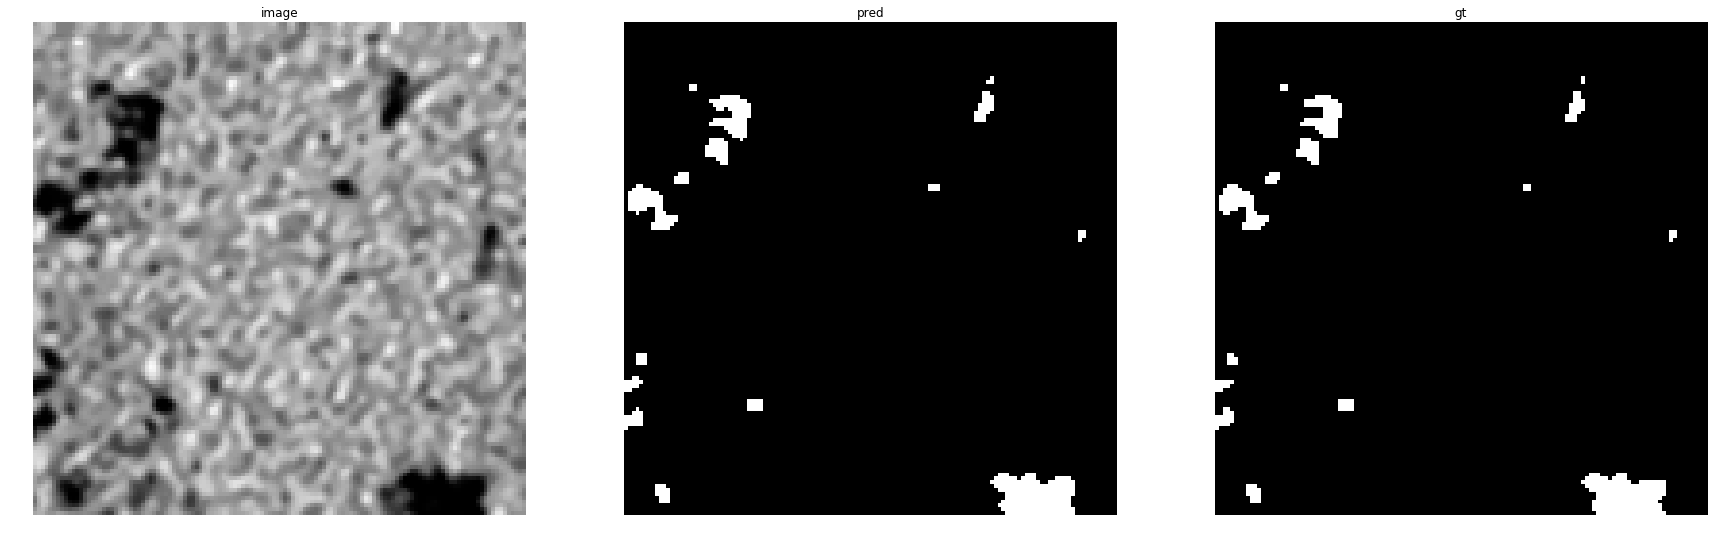

accuracy    : 0.99822998046875
precision   : 0.9482071713147411
recall      : 0.9937369519832986
f1          : 0.9704383282364935
pr_auc      : 0.9989435216804015
iou         : 0.9425742574257425


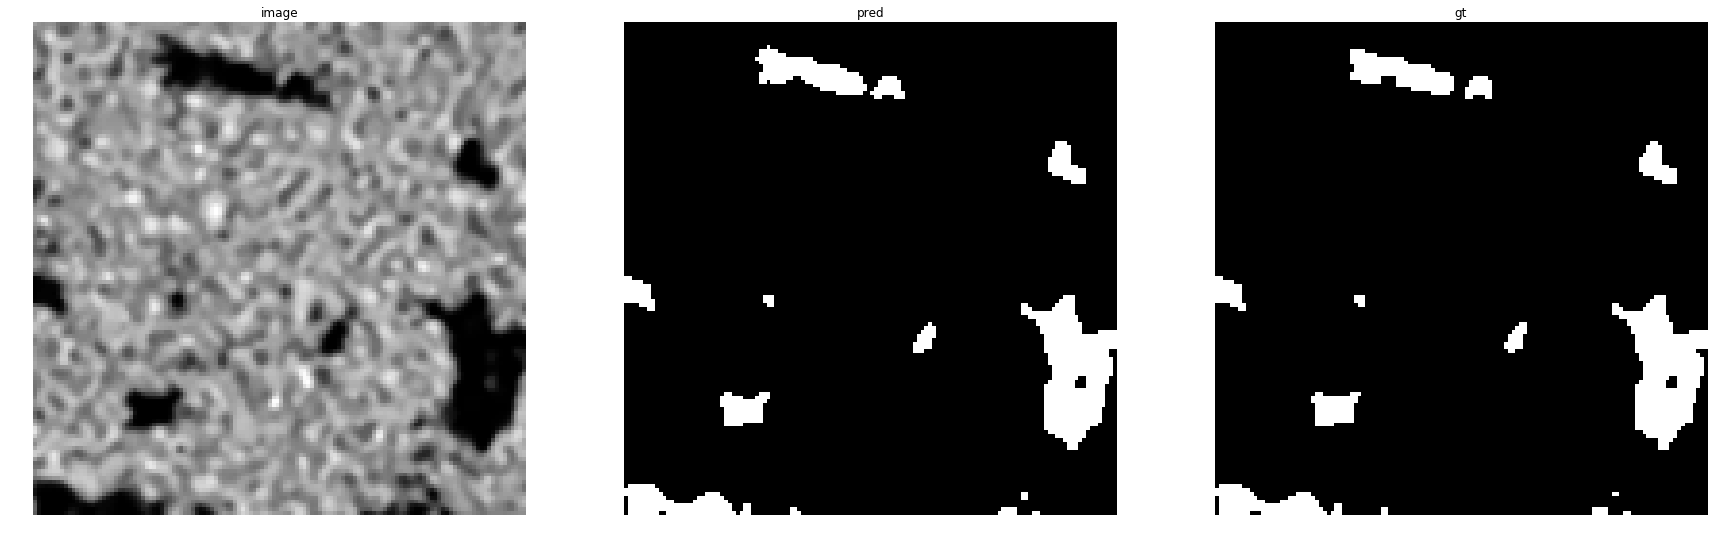

accuracy    : 0.997314453125
precision   : 0.9699054170249355
recall      : 0.9920844327176781
f1          : 0.9808695652173912
pr_auc      : 0.9989280541763977
iou         : 0.962457337883959


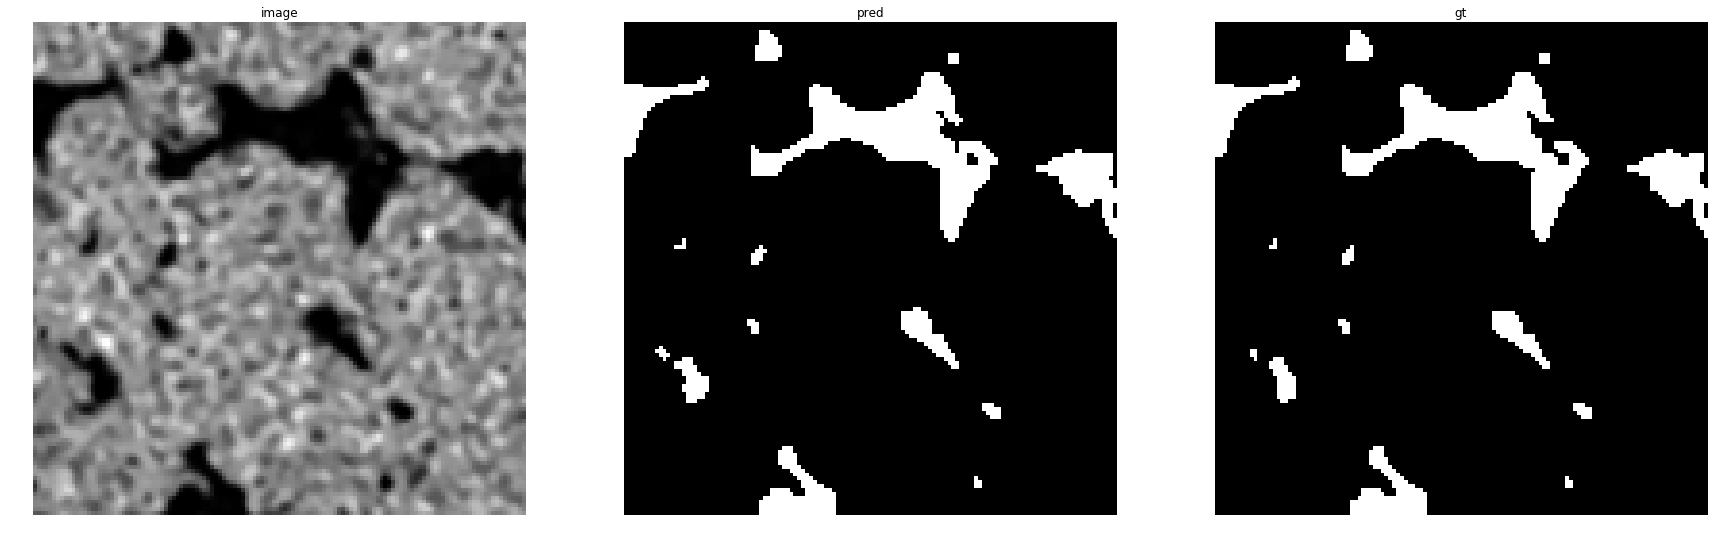

accuracy    : 0.99688720703125
precision   : 0.9718482252141983
recall      : 0.9968612680477087
f1          : 0.9841958475364116
pr_auc      : 0.9993728738017293
iou         : 0.9688834655277608


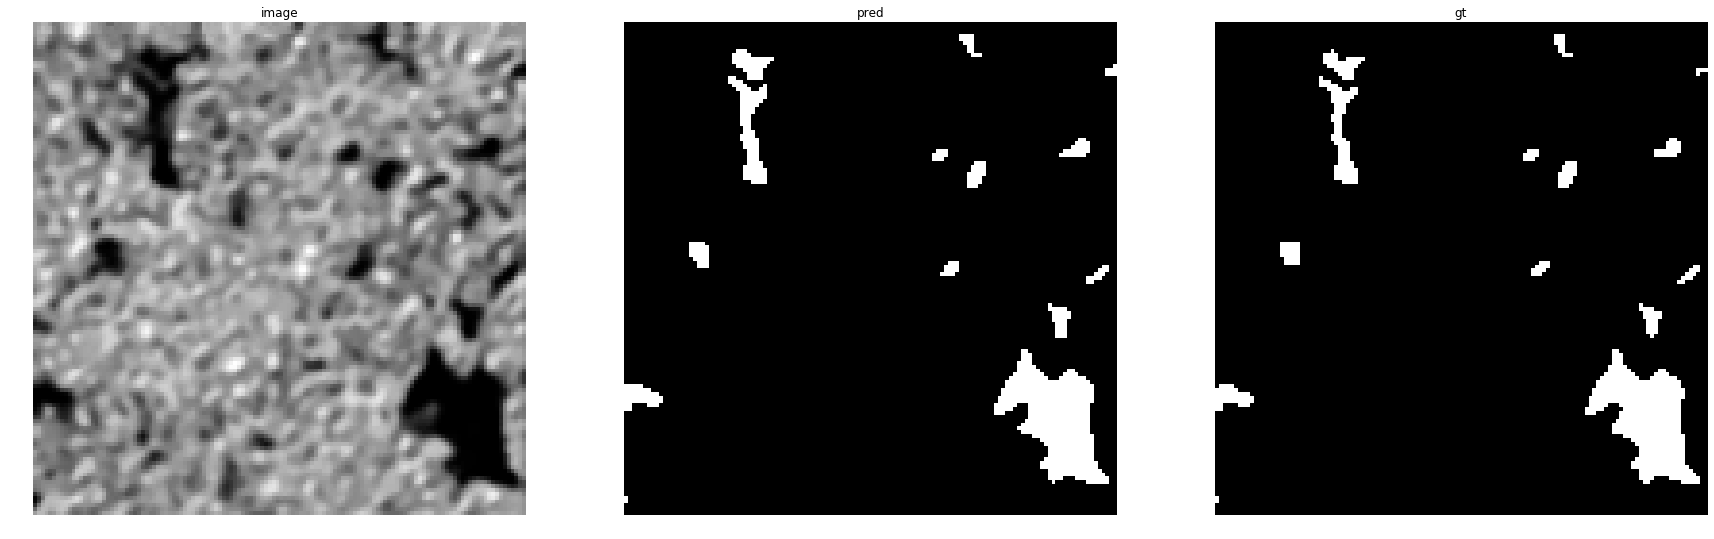

accuracy    : 0.99676513671875
precision   : 0.9475982532751092
recall      : 0.9942726231386025
f1          : 0.9703745108999441
pr_auc      : 0.9981567310362797
iou         : 0.9424538545059717


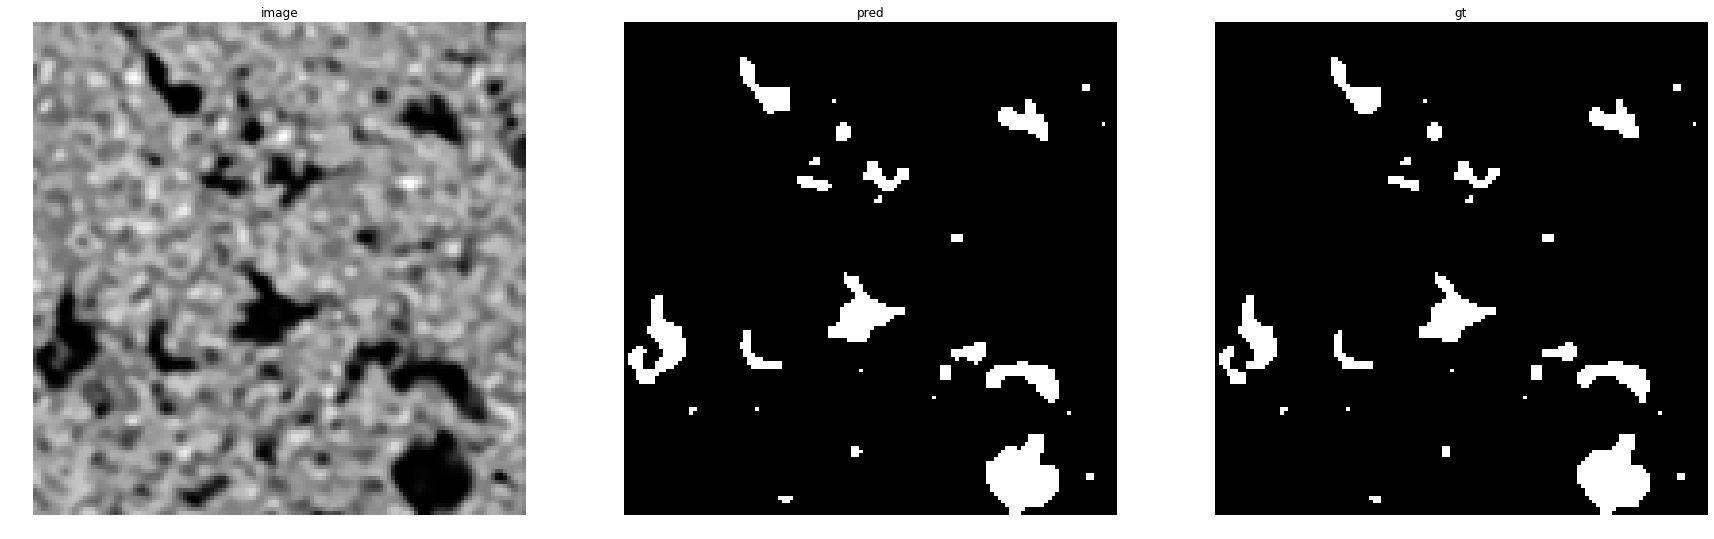

accuracy    : 0.99591064453125
precision   : 0.9398642095053347
recall      : 0.9948665297741273
f1          : 0.9665835411471322
pr_auc      : 0.998259597017561
iou         : 0.9353281853281853


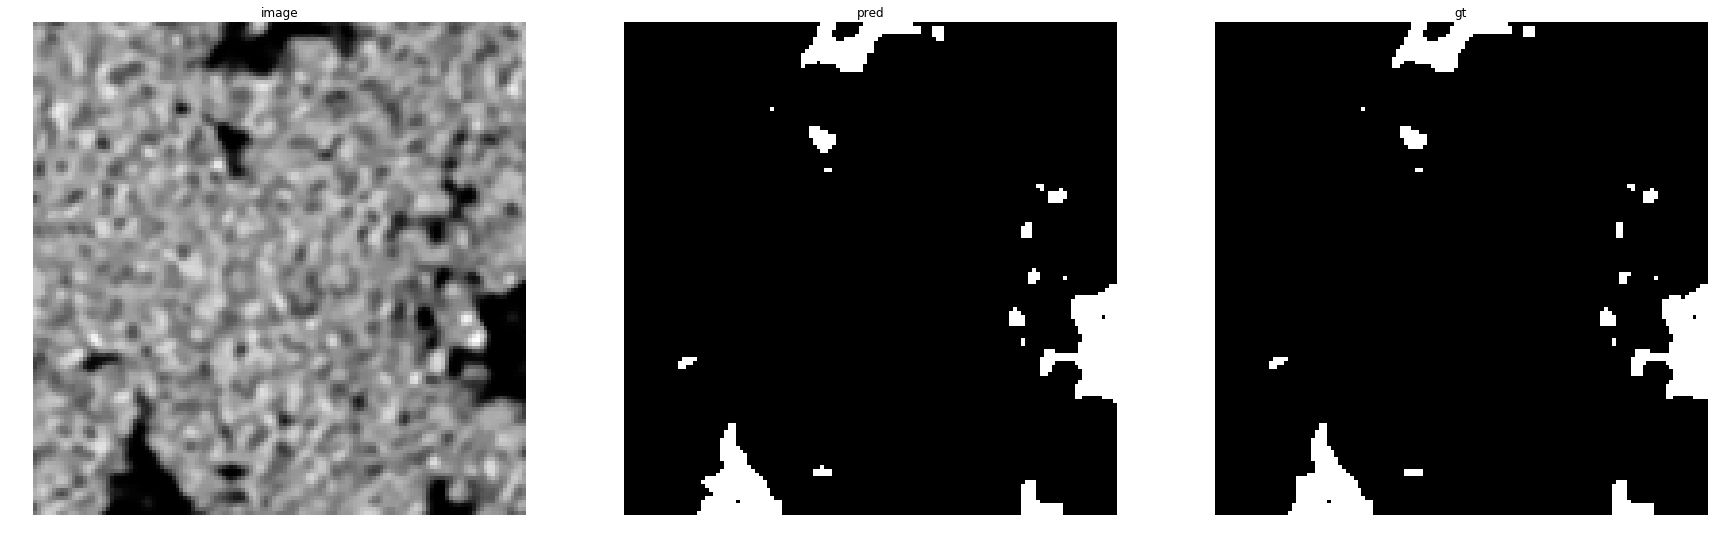

accuracy    : 0.997802734375
precision   : 0.9708333333333333
recall      : 0.9914893617021276
f1          : 0.9810526315789473
pr_auc      : 0.9991242069968393
iou         : 0.9628099173553719


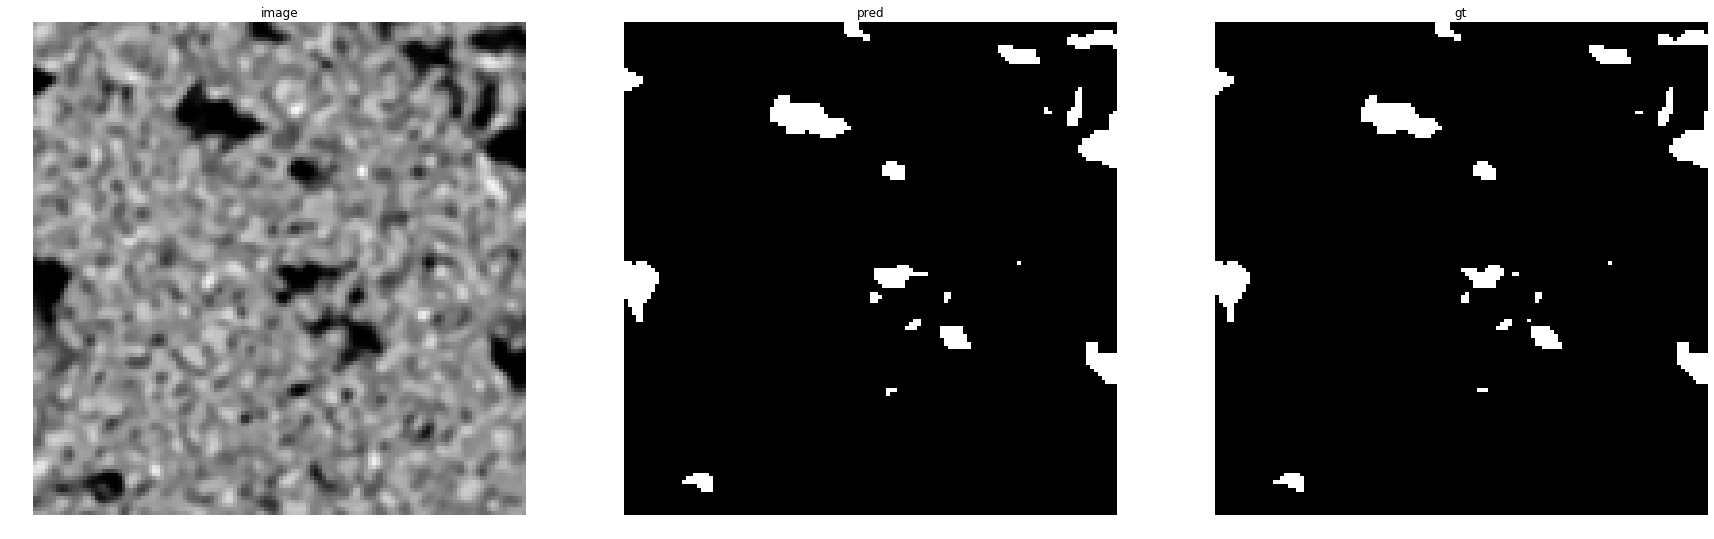

accuracy    : 0.99737548828125
precision   : 0.9449275362318841
recall      : 0.9923896499238964
f1          : 0.9680772086117297
pr_auc      : 0.9973185120079726
iou         : 0.9381294964028777


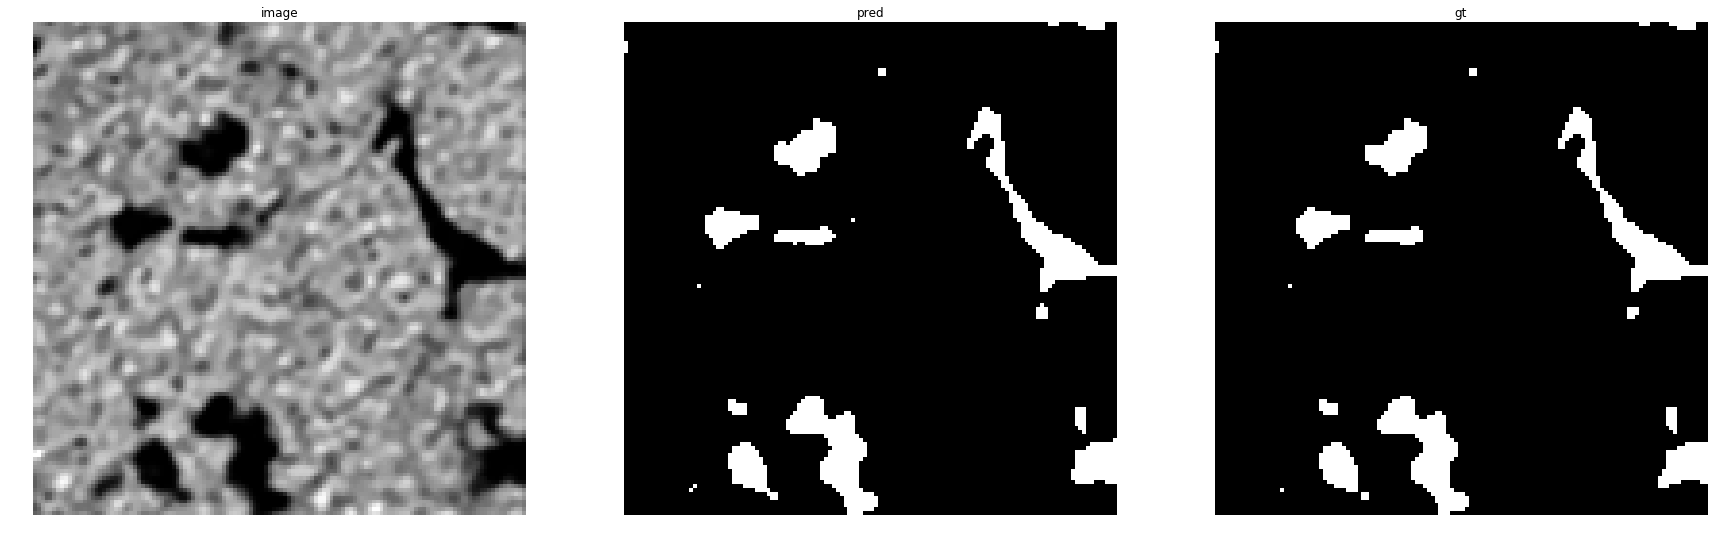

accuracy    : 0.99749755859375
precision   : 0.9729508196721312
recall      : 0.9933054393305439
f1          : 0.9830227743271222
pr_auc      : 0.9989283735591831
iou         : 0.9666123778501629
carb71


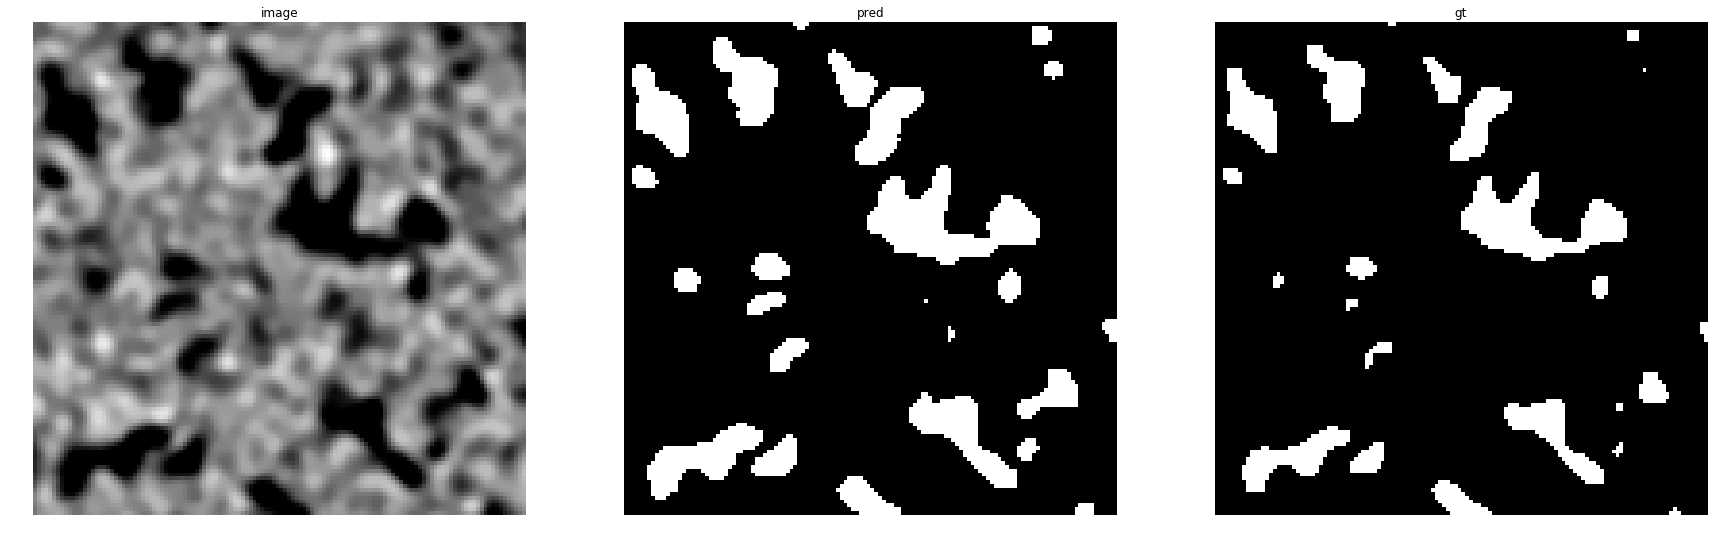

accuracy    : 0.954345703125
precision   : 0.6986301369863014
recall      : 1.0
f1          : 0.8225806451612903
pr_auc      : 0.9918441926188484
iou         : 0.6986301369863014


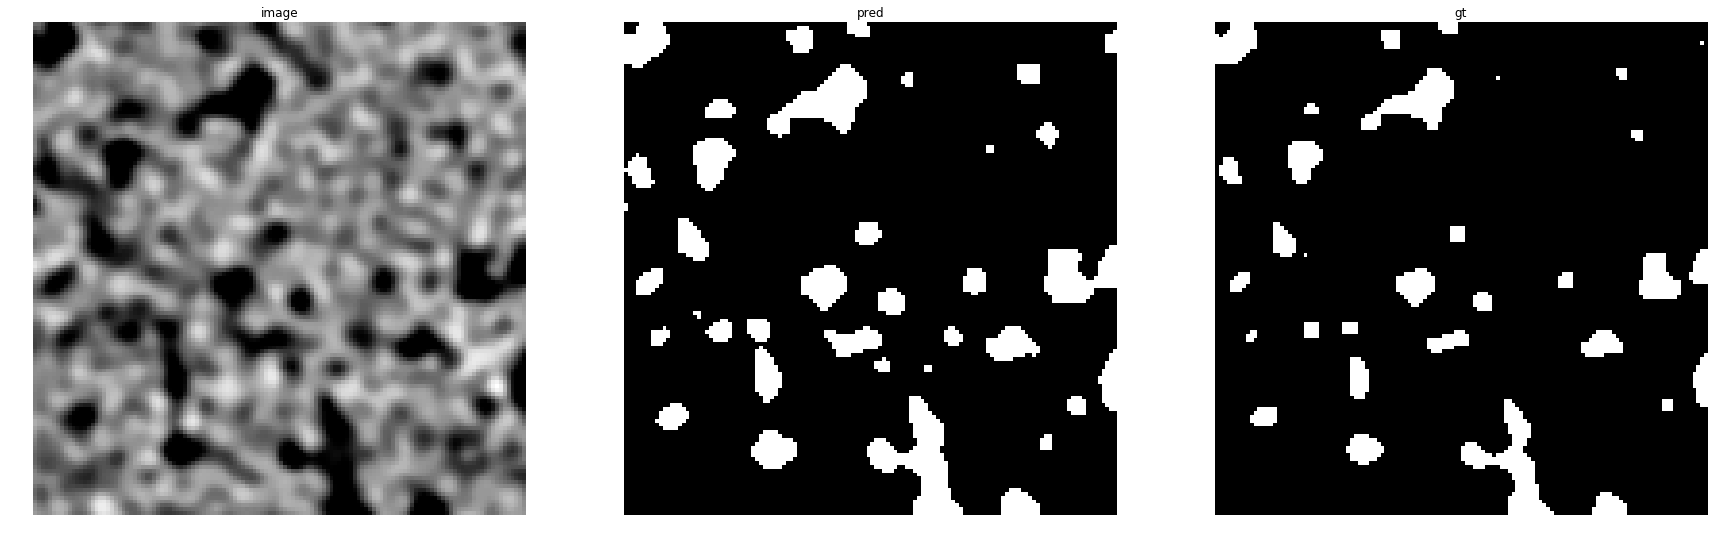

accuracy    : 0.95391845703125
precision   : 0.6419753086419753
recall      : 0.9992609016999261
f1          : 0.7817288233593523
pr_auc      : 0.9883194082320652
iou         : 0.6416706217370669


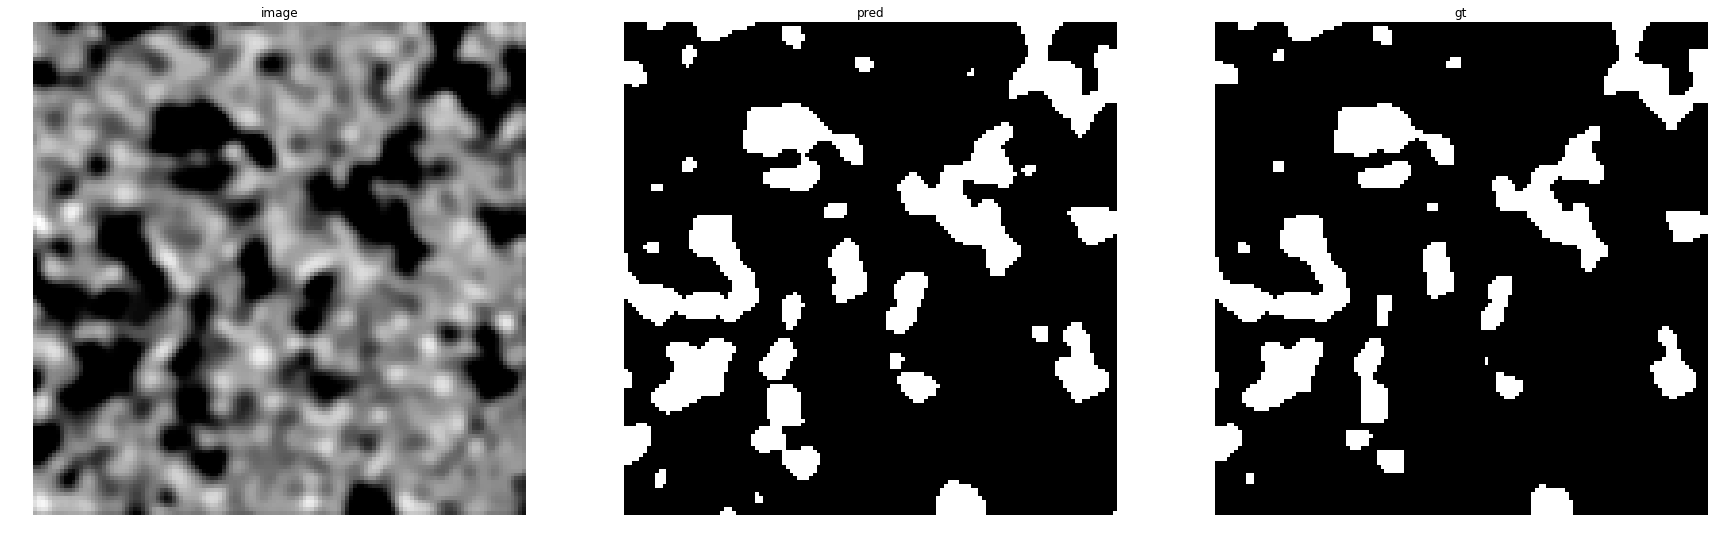

accuracy    : 0.9619140625
precision   : 0.8156458459672529
recall      : 0.9940872135994088
f1          : 0.8960692871419055
pr_auc      : 0.9918051715935272
iou         : 0.8117079058539529


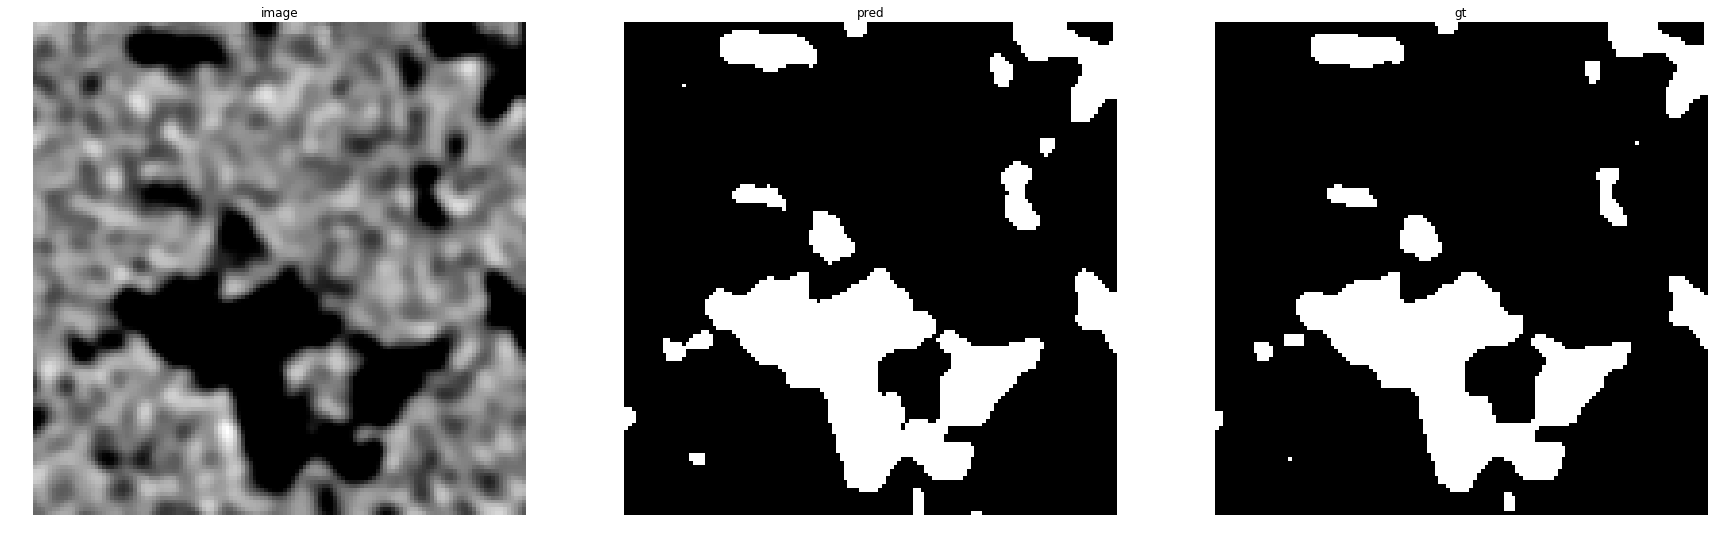

accuracy    : 0.97705078125
precision   : 0.8909252143068283
recall      : 0.9976828864614367
f1          : 0.9412866958151156
pr_auc      : 0.9974858645541924
iou         : 0.8890855457227138


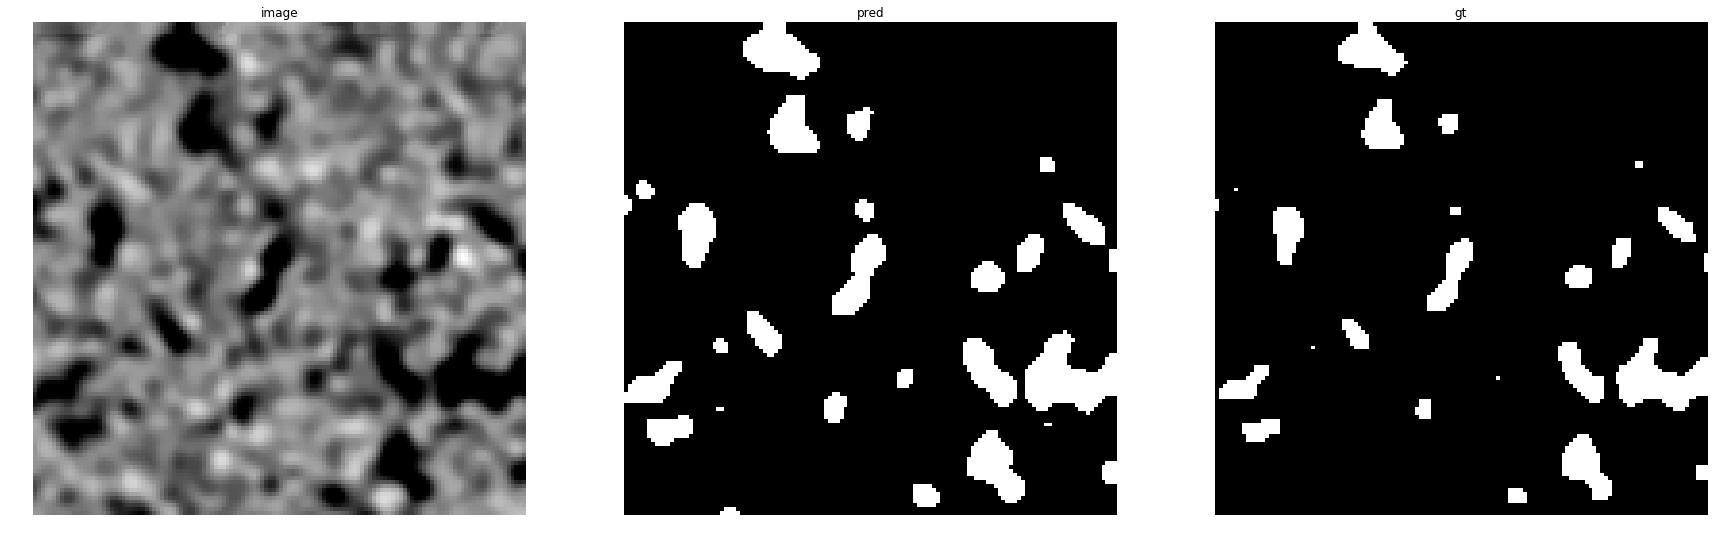

accuracy    : 0.96331787109375
precision   : 0.6801490154337414
recall      : 1.0
f1          : 0.8096293949952487
pr_auc      : 0.9939431649816292
iou         : 0.6801490154337414


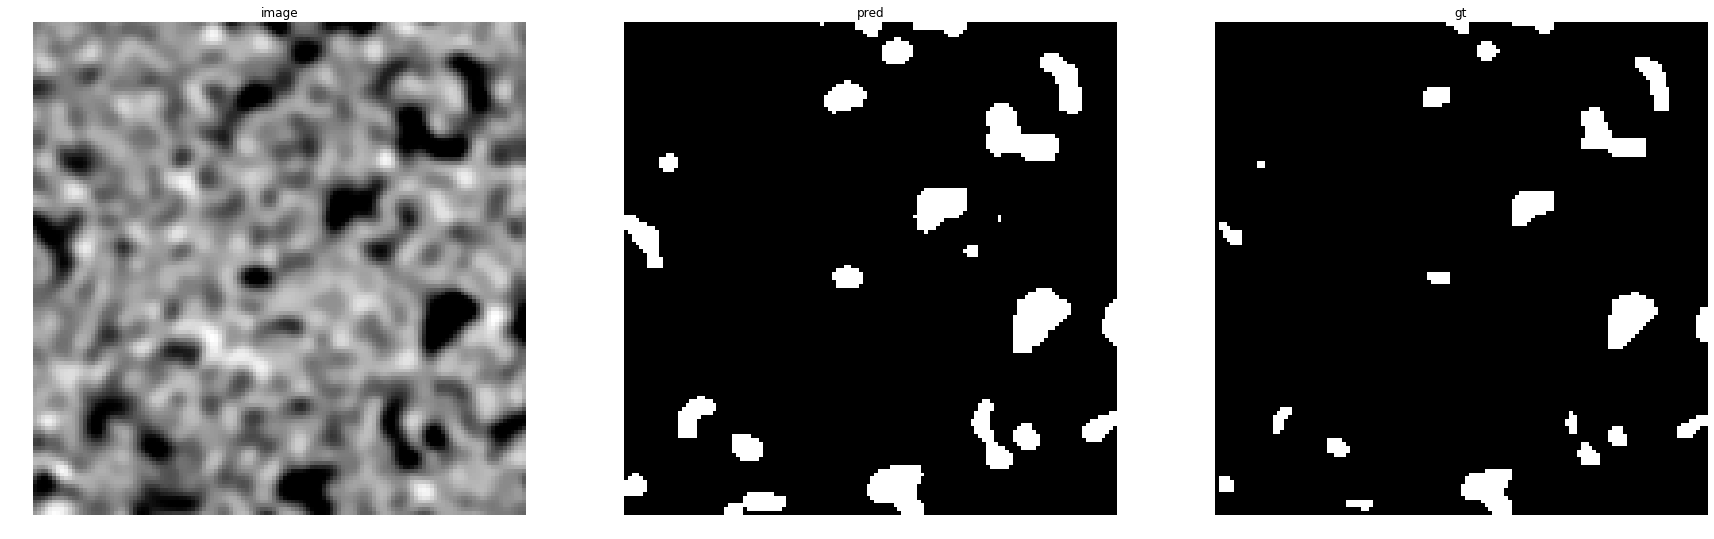

accuracy    : 0.9639892578125
precision   : 0.5818568391211907
recall      : 1.0
f1          : 0.735663082437276
pr_auc      : 0.9802239311348497
iou         : 0.5818568391211907


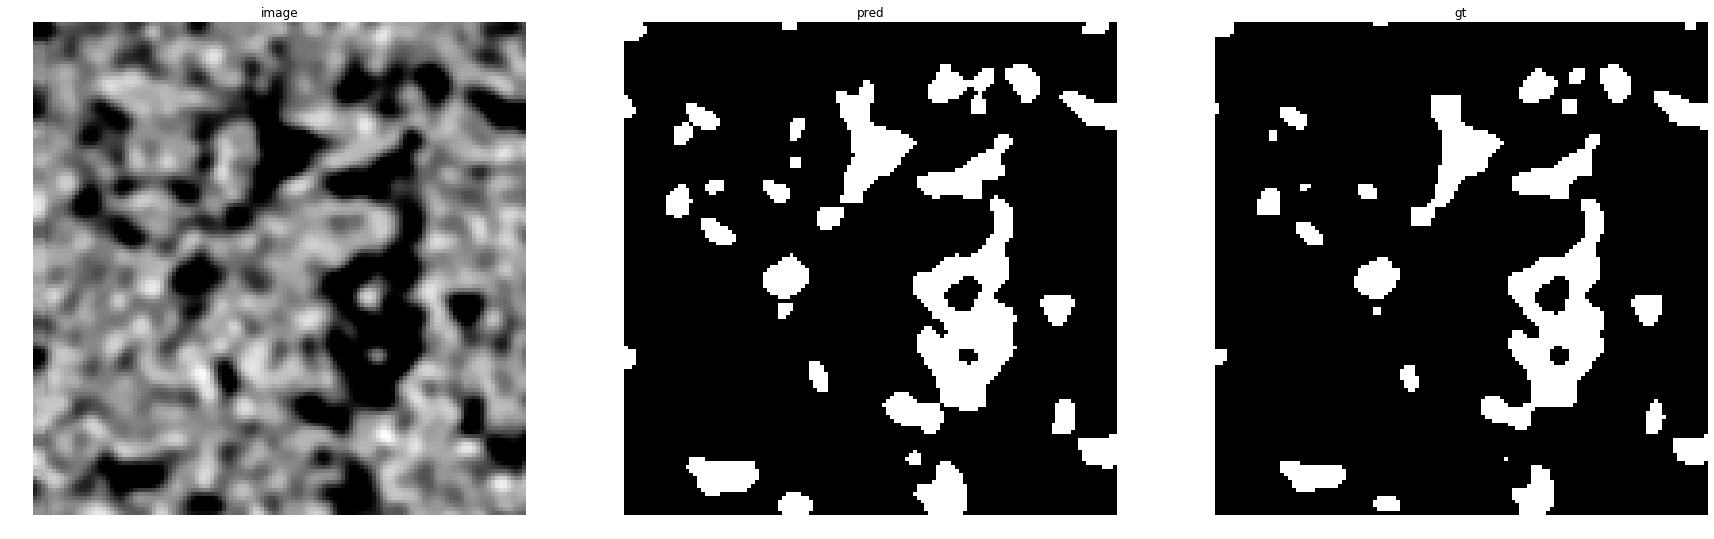

accuracy    : 0.9696044921875
precision   : 0.8170685036356679
recall      : 0.9907192575406032
f1          : 0.8955536912751677
pr_auc      : 0.9899740493607774
iou         : 0.8108621344473984


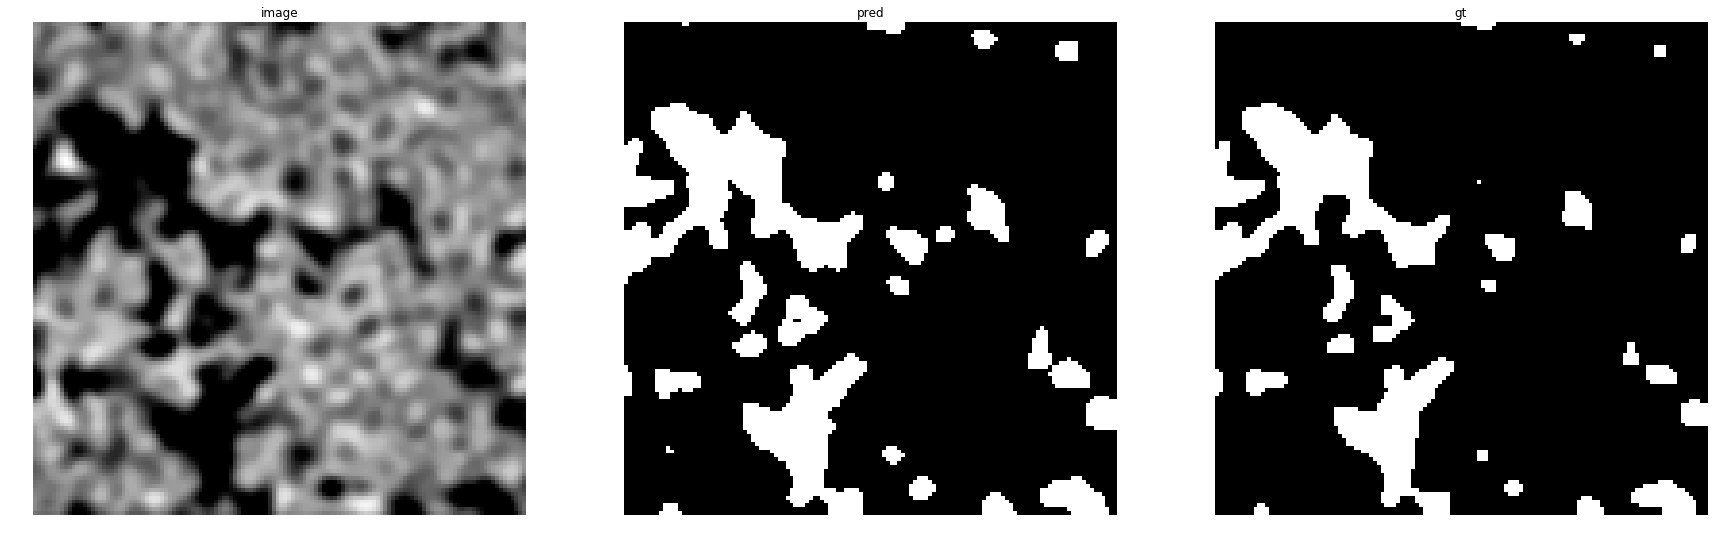

accuracy    : 0.96478271484375
precision   : 0.8074023303632625
recall      : 0.9936735554618304
f1          : 0.890905653242579
pr_auc      : 0.9936215928122507
iou         : 0.80327309921582


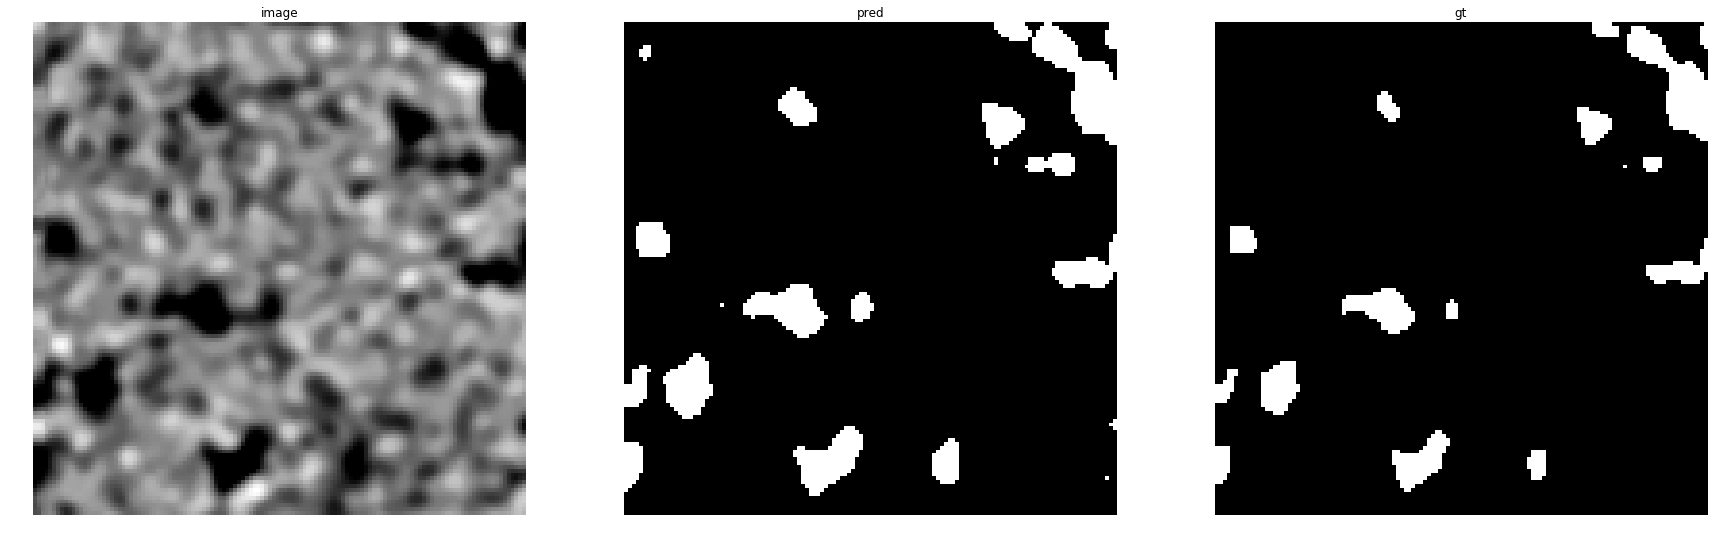

accuracy    : 0.97119140625
precision   : 0.6838580040187542
recall      : 1.0
f1          : 0.8122513922036596
pr_auc      : 0.9911946132538869
iou         : 0.6838580040187542


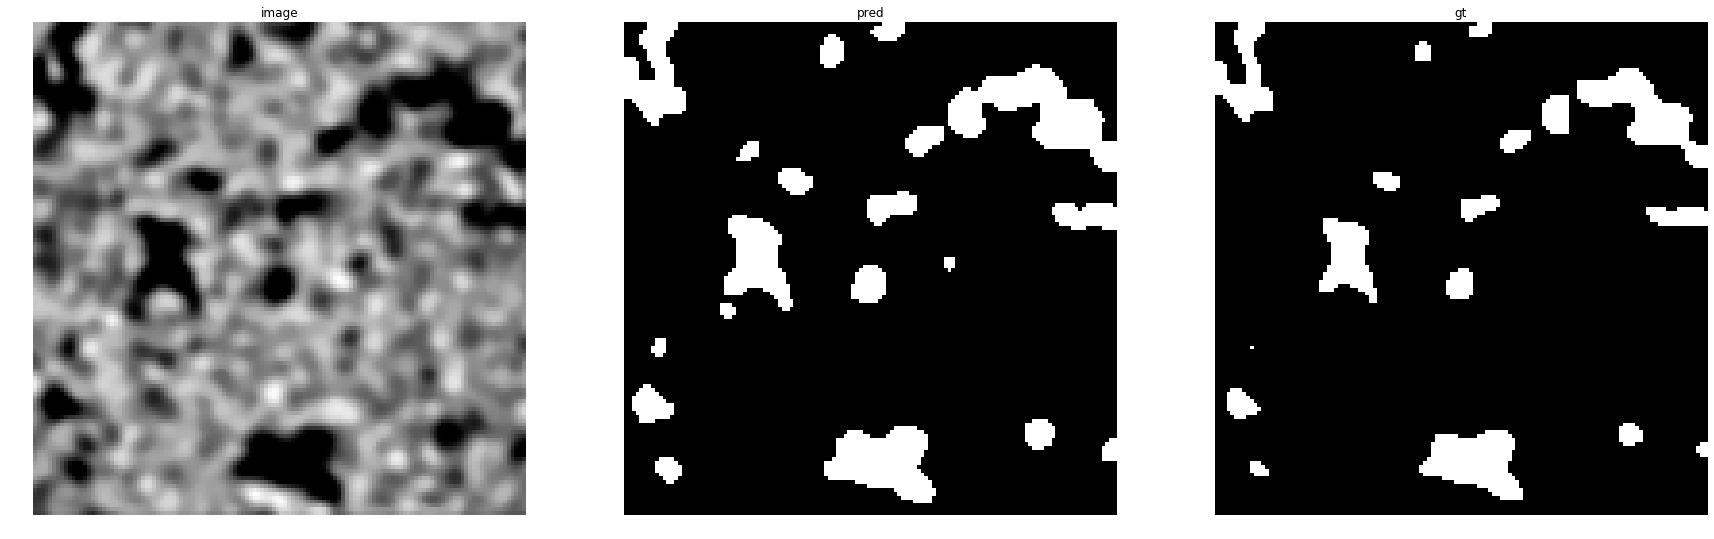

accuracy    : 0.962890625
precision   : 0.7103382563125298
recall      : 1.0
f1          : 0.8306406685236769
pr_auc      : 0.9946699051288859
iou         : 0.7103382563125298
carbRNF


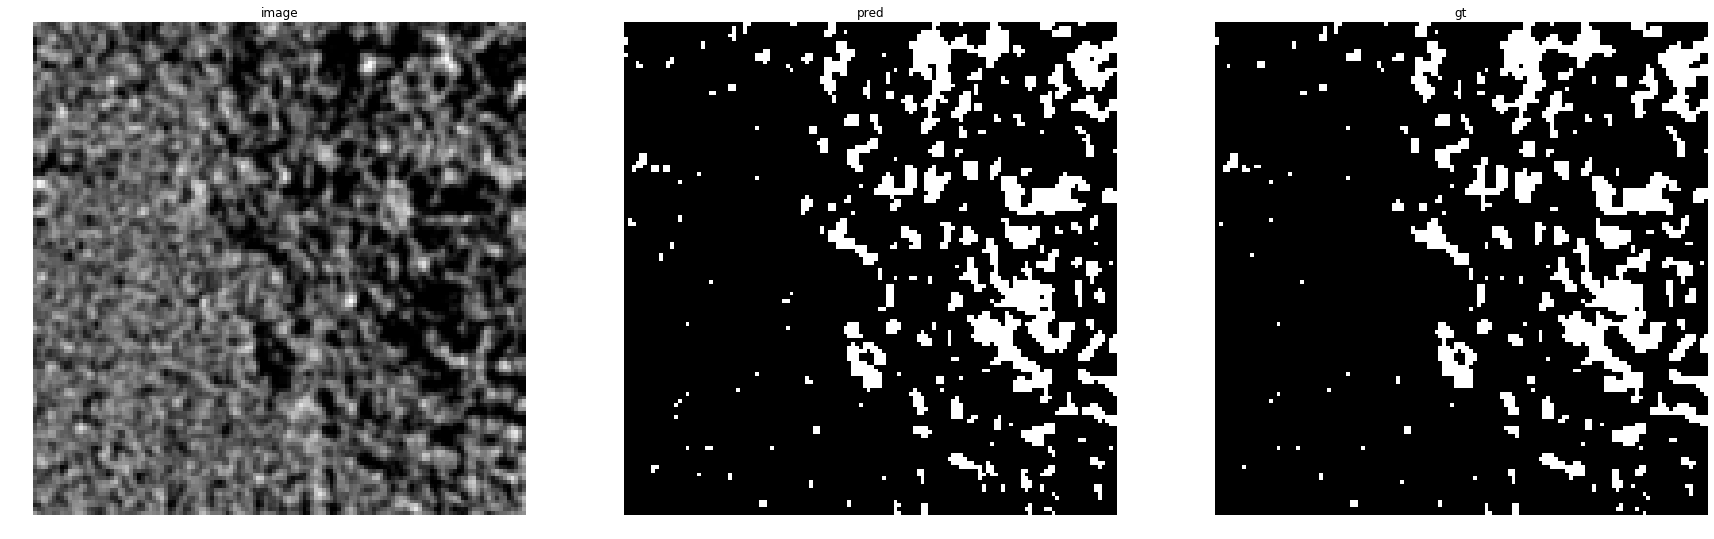

accuracy    : 0.98150634765625
precision   : 0.9353123615418697
recall      : 0.9307760141093474
f1          : 0.9330386740331491
pr_auc      : 0.9858547880508044
iou         : 0.8744821872410936


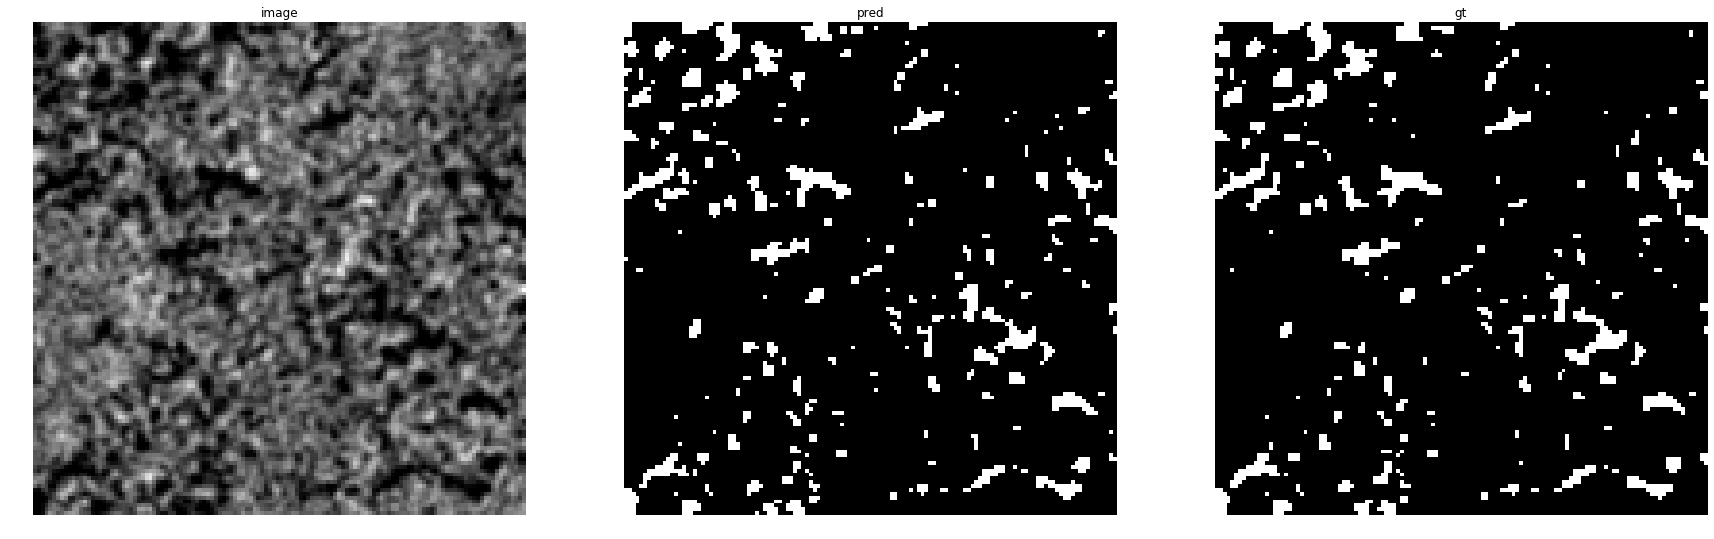

accuracy    : 0.98565673828125
precision   : 0.9117241379310345
recall      : 0.9251224632610217
f1          : 0.9183744355679054
pr_auc      : 0.9794320742264513
iou         : 0.8490687219010918


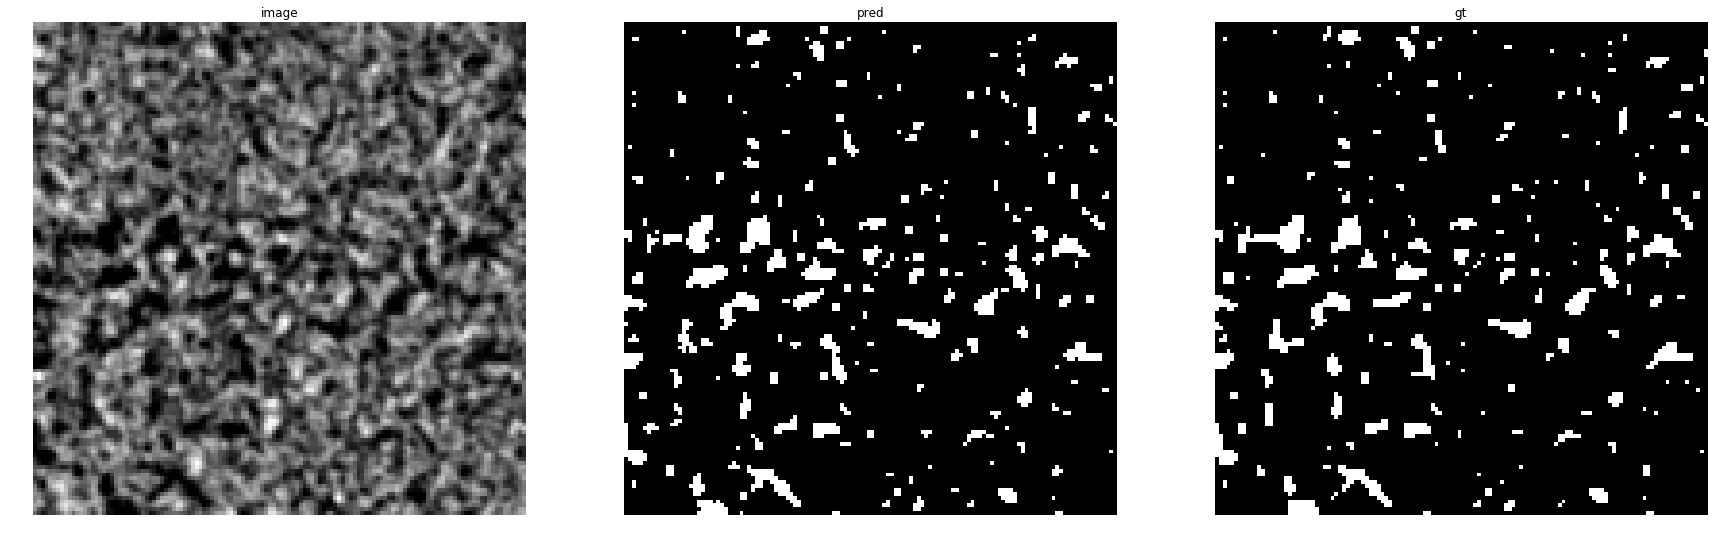

accuracy    : 0.98309326171875
precision   : 0.8716654650324441
recall      : 0.9243119266055045
f1          : 0.89721706864564
pr_auc      : 0.972809442855346
iou         : 0.8135935397039031


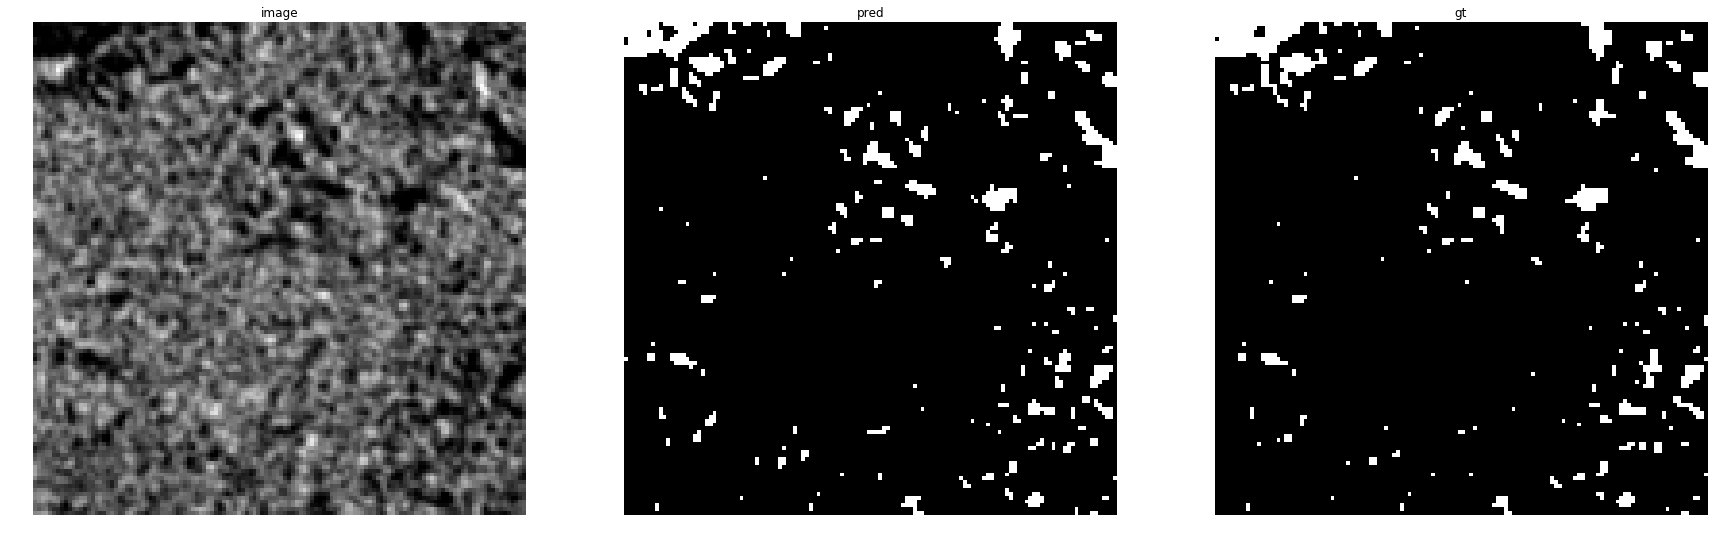

accuracy    : 0.98919677734375
precision   : 0.908080808080808
recall      : 0.9126903553299492
f1          : 0.910379746835443
pr_auc      : 0.9723270802301408
iou         : 0.8355018587360595


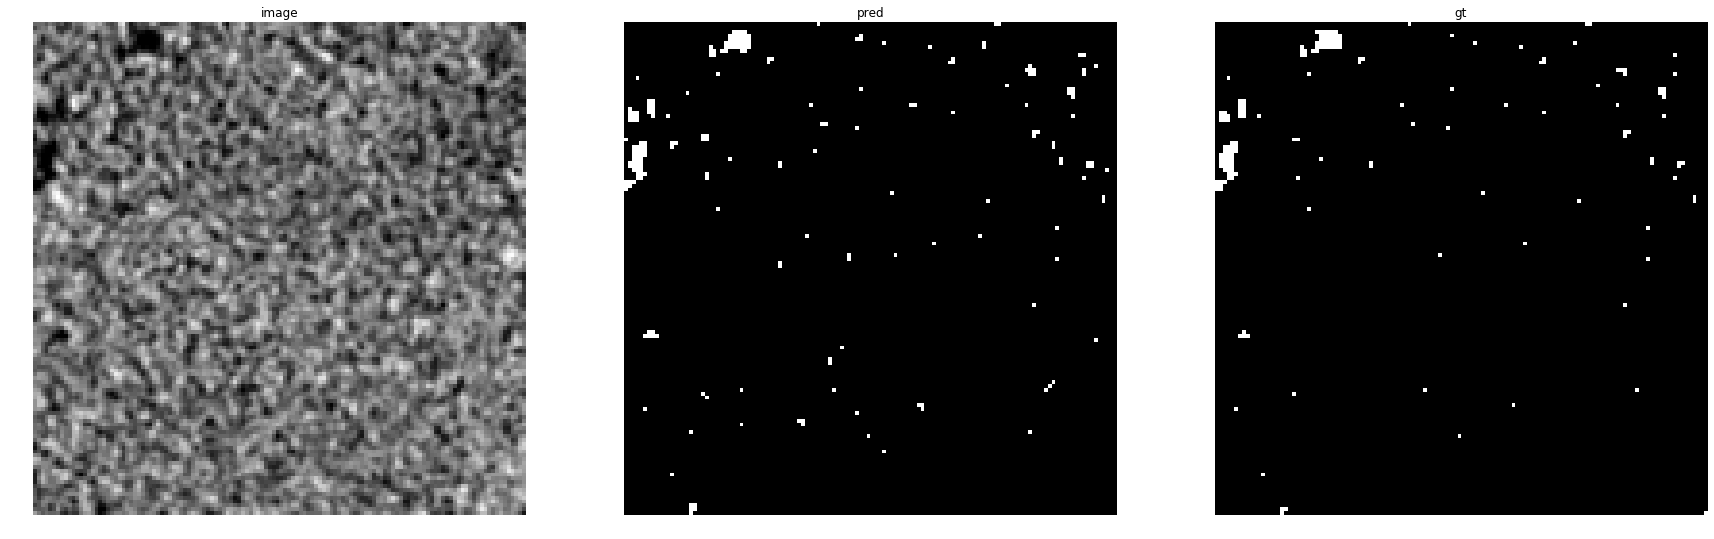

accuracy    : 0.99615478515625
precision   : 0.7488789237668162
recall      : 0.9597701149425287
f1          : 0.8413098236775819
pr_auc      : 0.9662752770983105
iou         : 0.7260869565217392


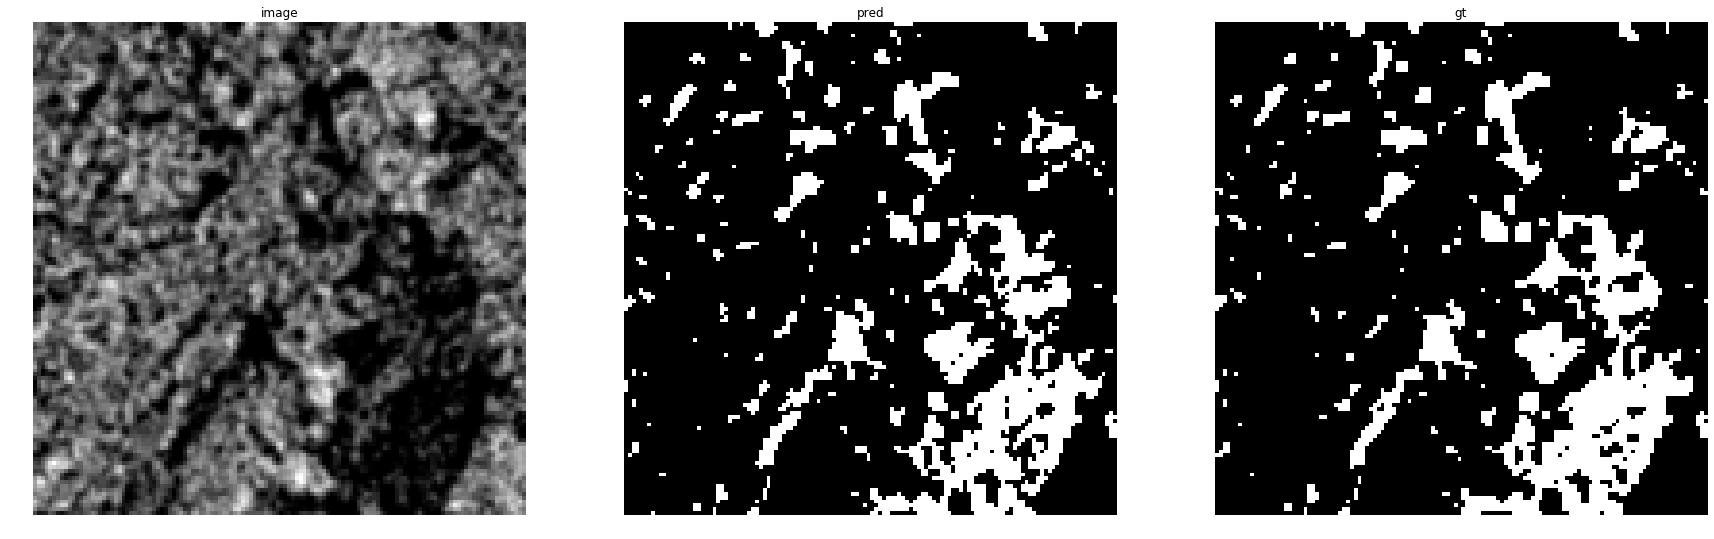

accuracy    : 0.9755859375
precision   : 0.9460382513661202
recall      : 0.9196547144754316
f1          : 0.9326599326599325
pr_auc      : 0.9885129183069218
iou         : 0.8738170347003155


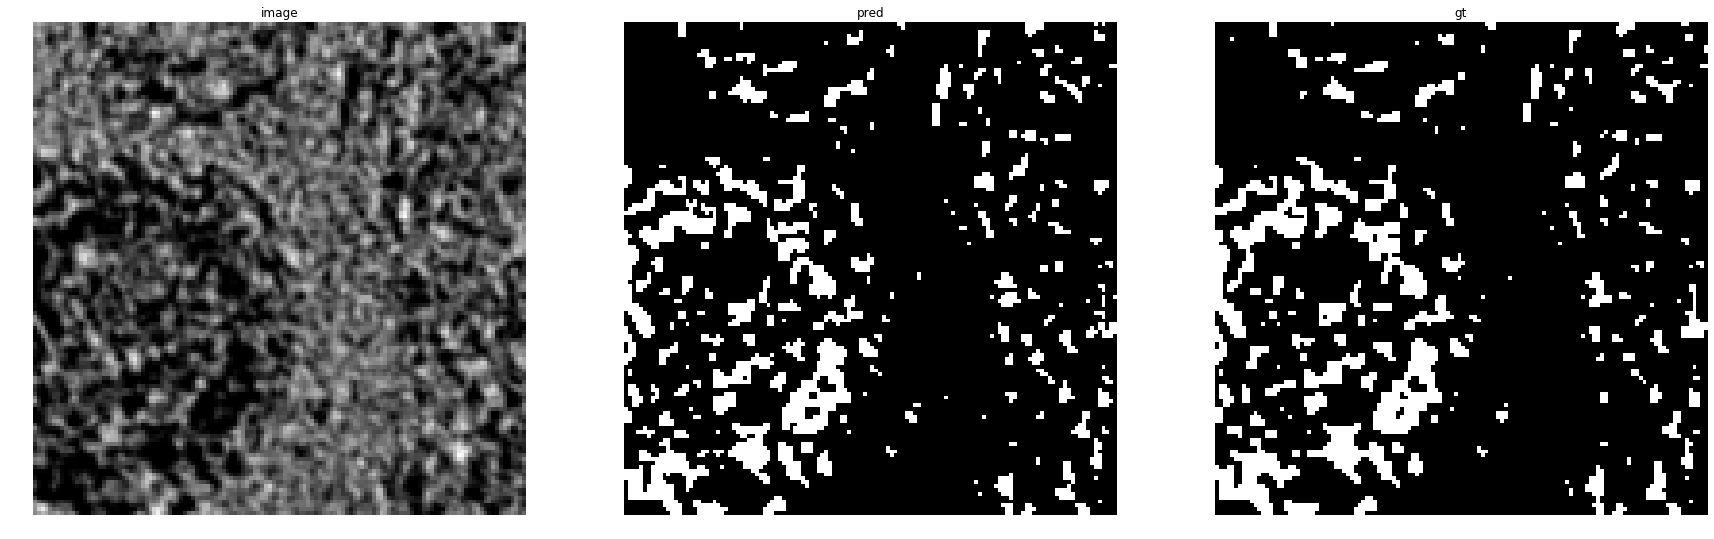

accuracy    : 0.974853515625
precision   : 0.9251644736842105
recall      : 0.907258064516129
f1          : 0.9161237785016286
pr_auc      : 0.9796824608237267
iou         : 0.845229151014275


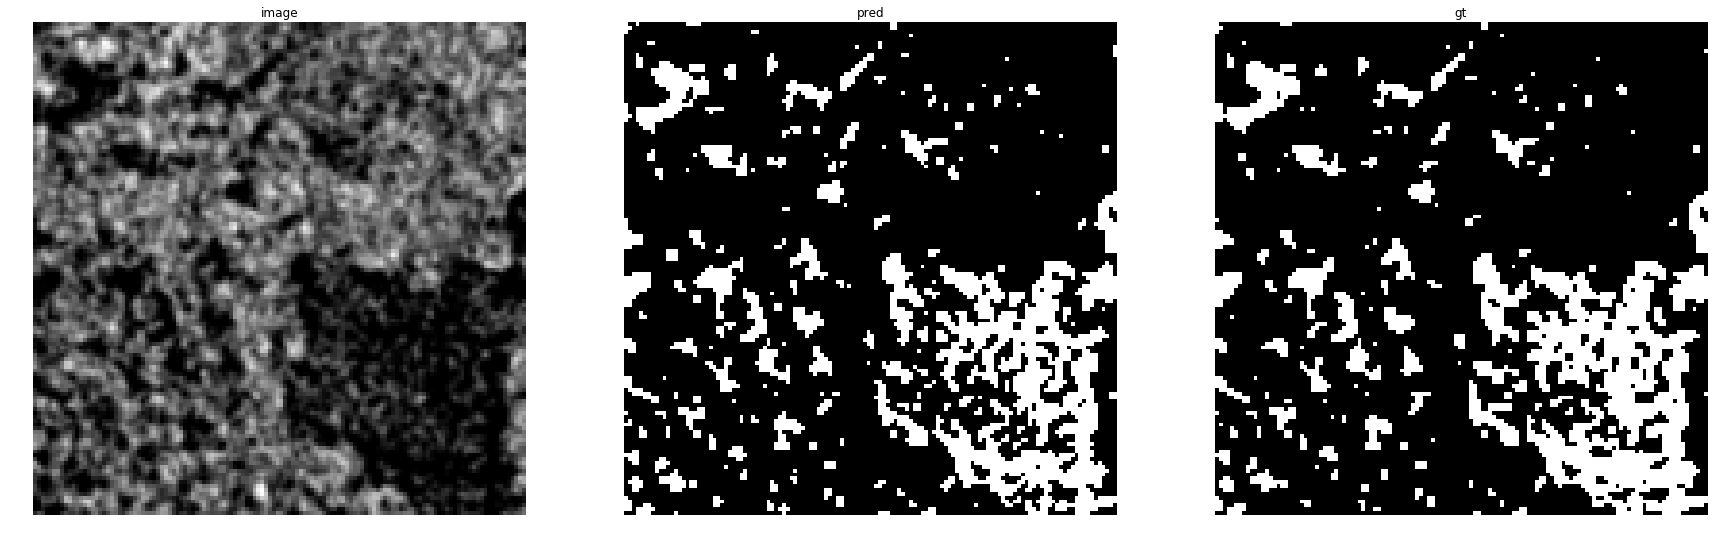

accuracy    : 0.97052001953125
precision   : 0.947172156619018
recall      : 0.906872954477834
f1          : 0.9265845873233014
pr_auc      : 0.9854770388067716
iou         : 0.8632115548003398


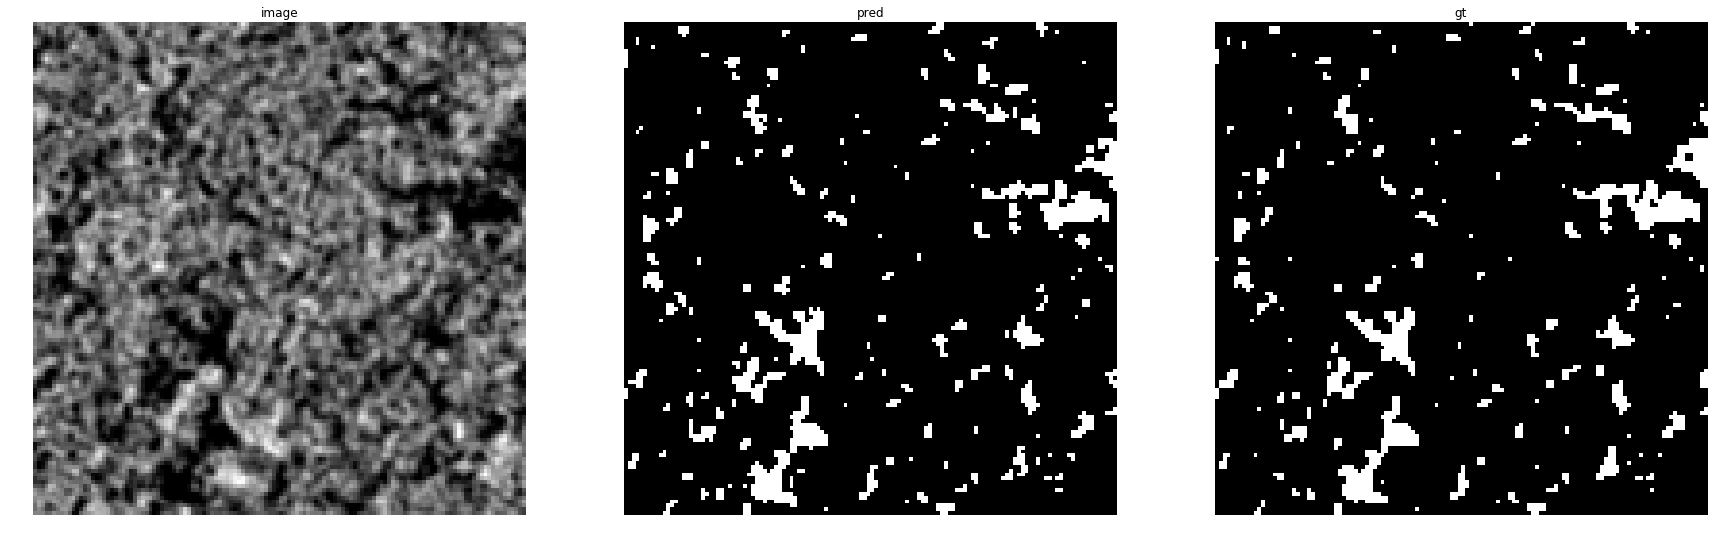

accuracy    : 0.98541259765625
precision   : 0.9032033426183844
recall      : 0.9284180386542591
f1          : 0.9156371337804449
pr_auc      : 0.9775632042079421
iou         : 0.8444010416666666


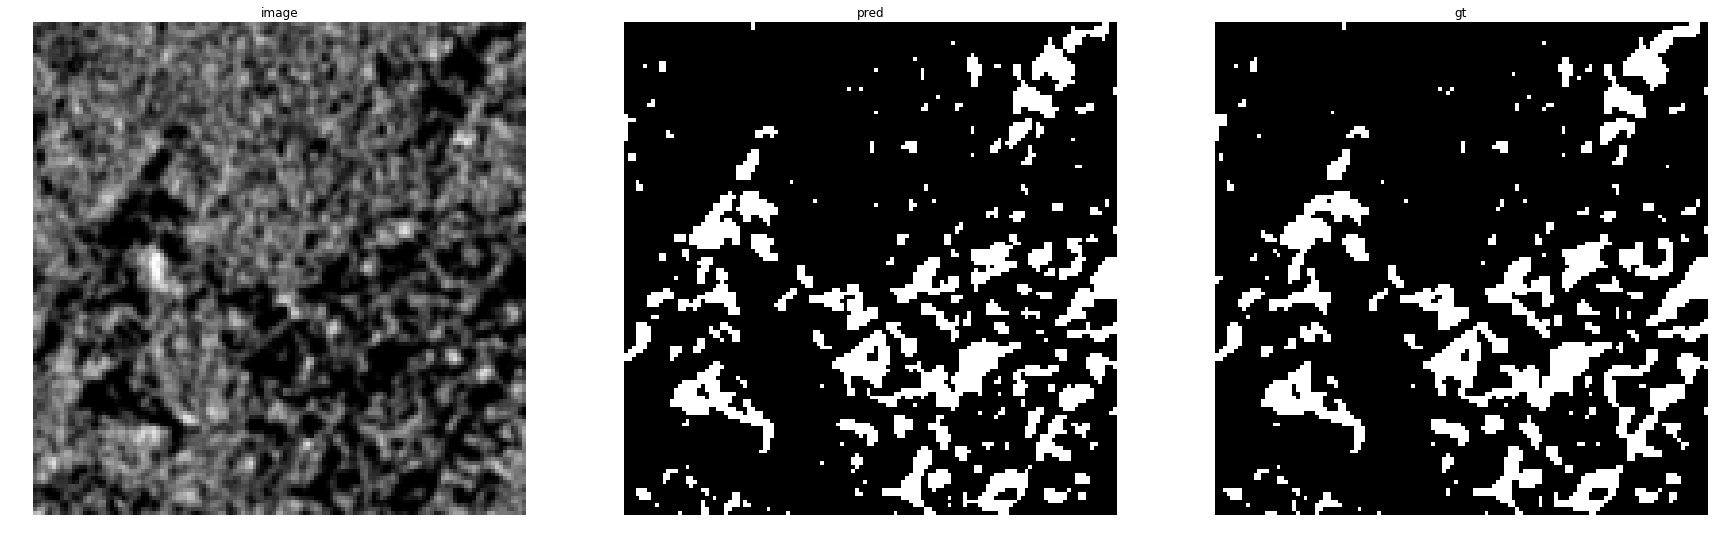

accuracy    : 0.9742431640625
precision   : 0.9409174311926606
recall      : 0.9076106194690265
f1          : 0.923963963963964
pr_auc      : 0.9847040349099541
iou         : 0.8586738111185532
SPE_carb10_58_box3


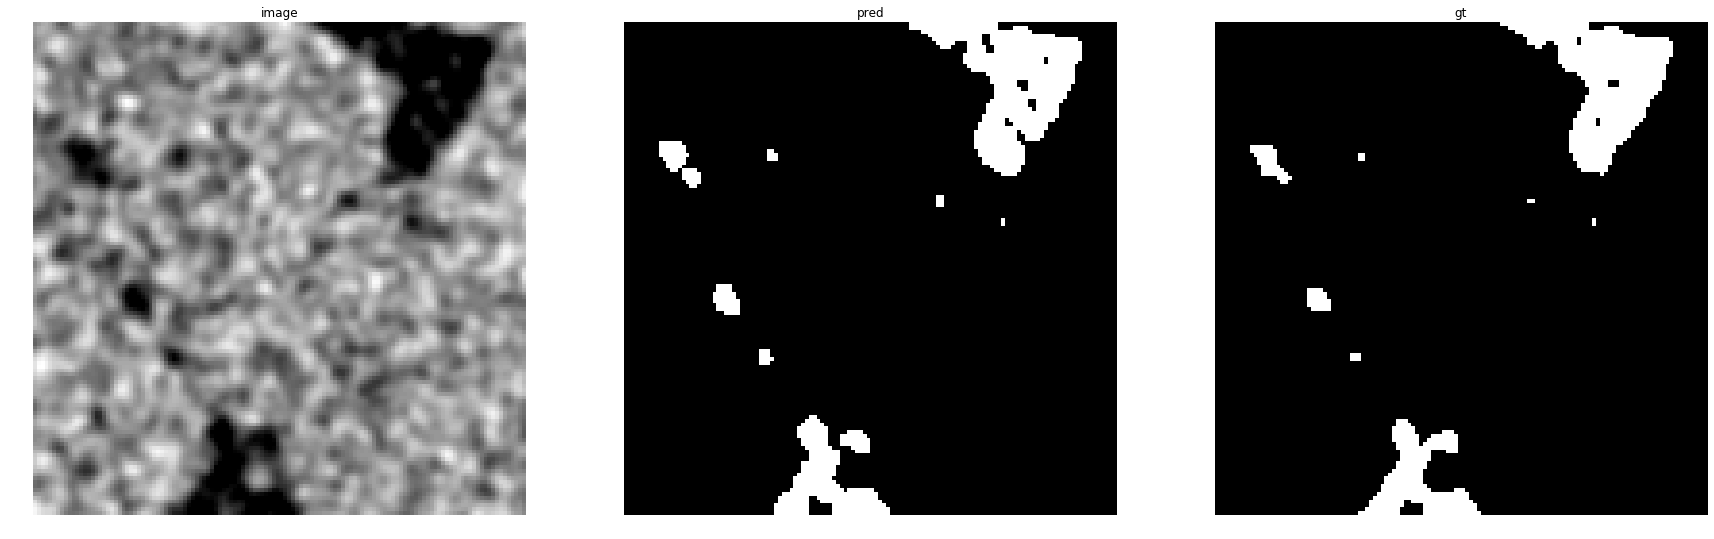

accuracy    : 0.98919677734375
precision   : 0.9016266460108443
recall      : 0.9588138385502472
f1          : 0.9293413173652696
pr_auc      : 0.990986170781875
iou         : 0.8680089485458613


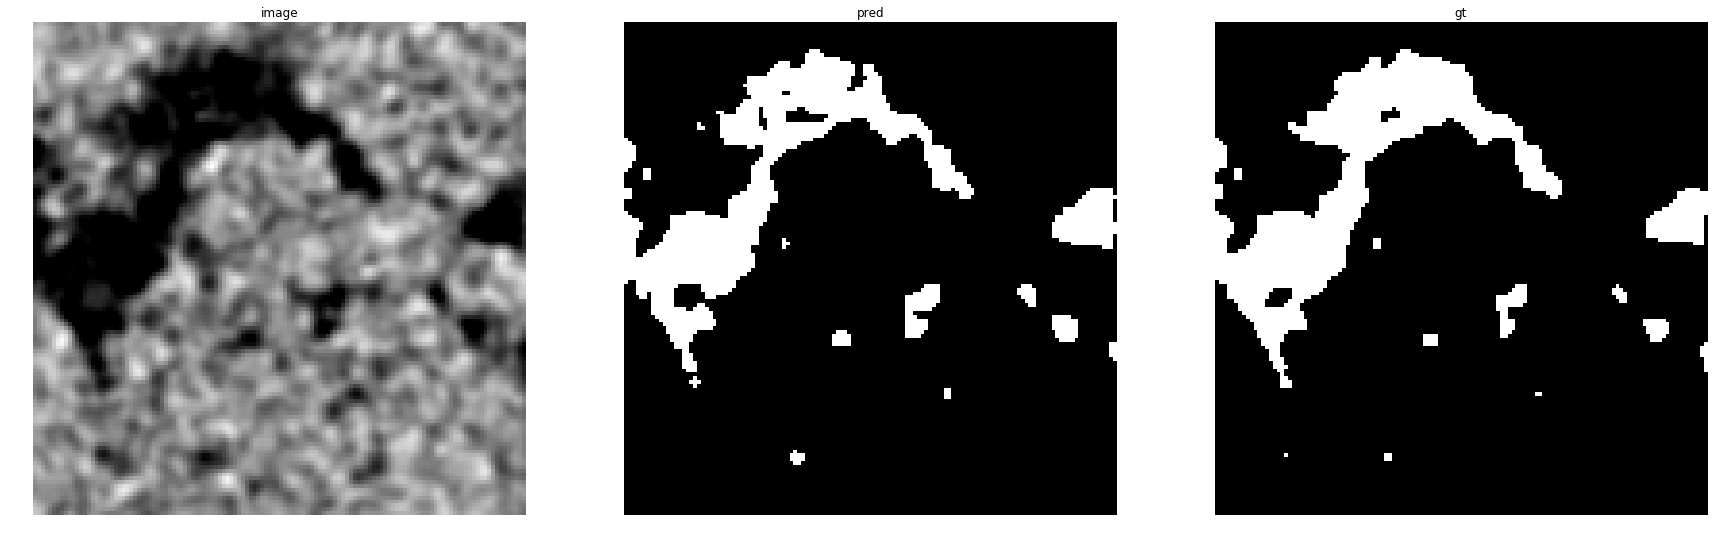

accuracy    : 0.9815673828125
precision   : 0.9551341350601296
recall      : 0.9096916299559471
f1          : 0.9318592057761733
pr_auc      : 0.9884950484789651
iou         : 0.8724123362906633


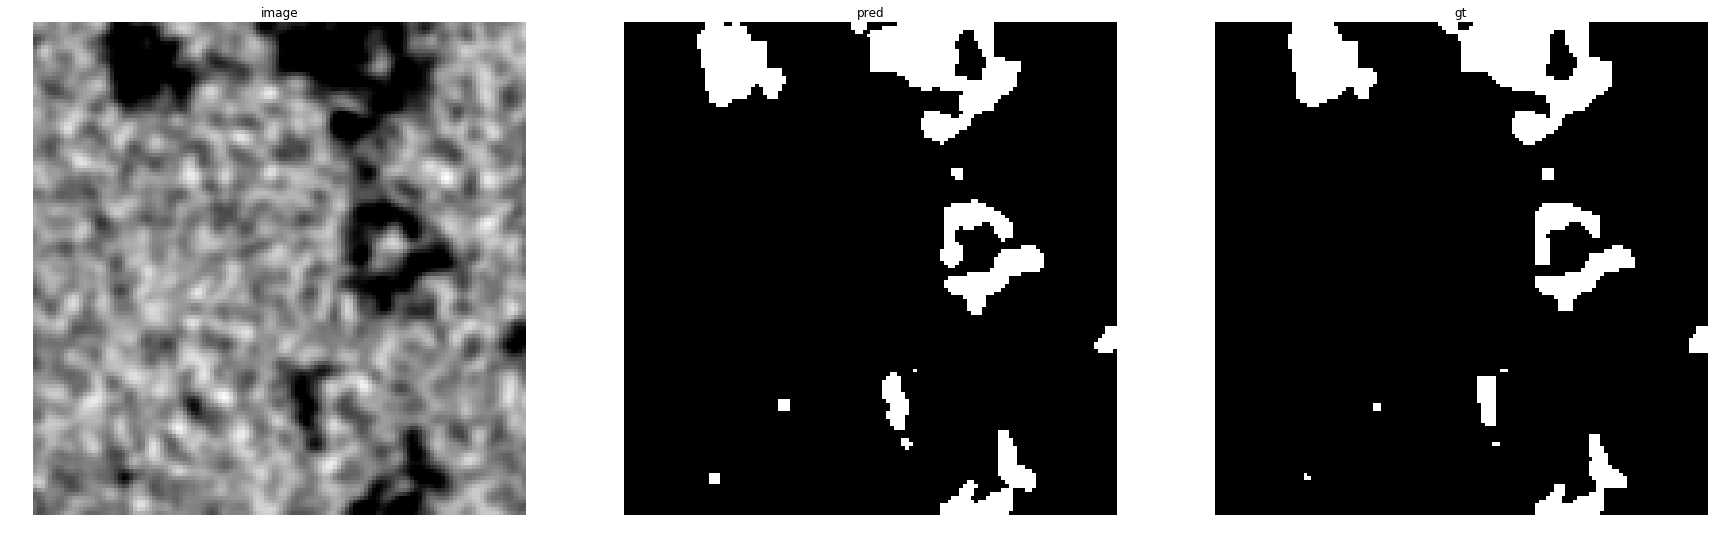

accuracy    : 0.9888916015625
precision   : 0.9367011564211808
recall      : 0.9517625231910947
f1          : 0.9441717791411043
pr_auc      : 0.9921087364165939
iou         : 0.8942475305055201


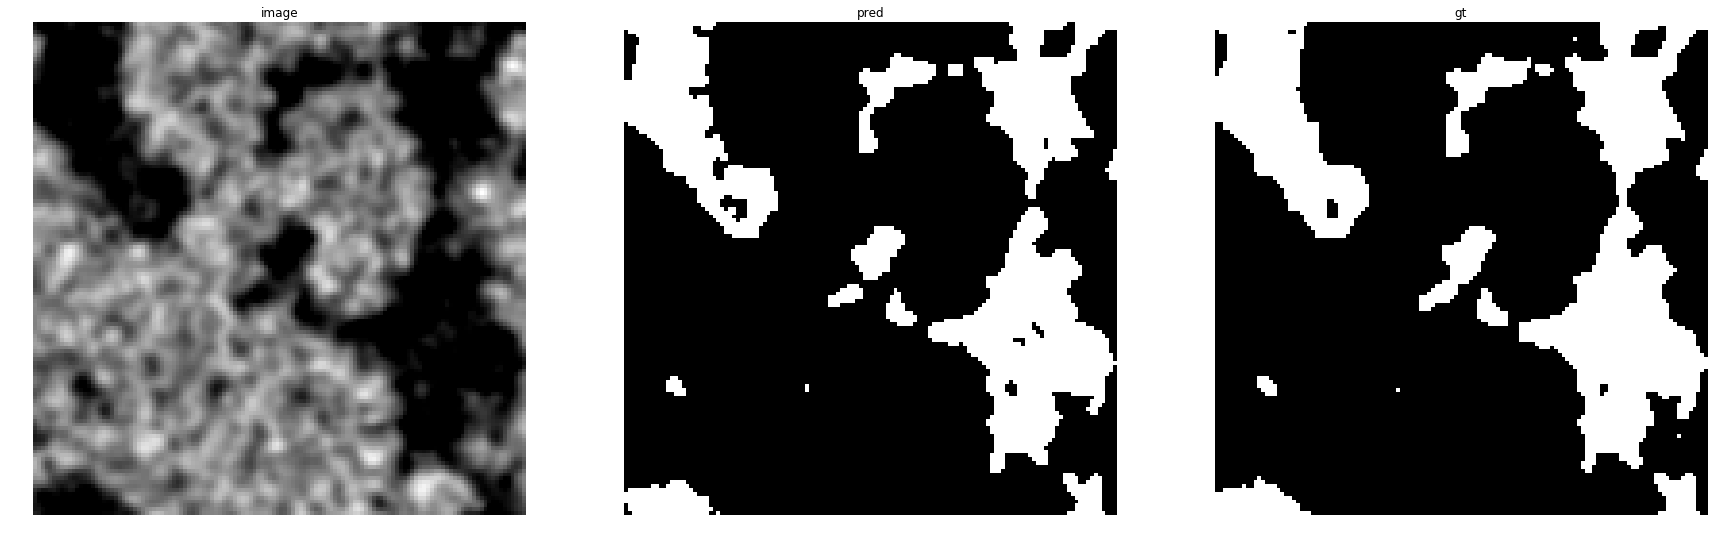

accuracy    : 0.97528076171875
precision   : 0.9918242207460398
recall      : 0.9123384253819037
f1          : 0.9504223283143591
pr_auc      : 0.9960942327643862
iou         : 0.9055283414975507


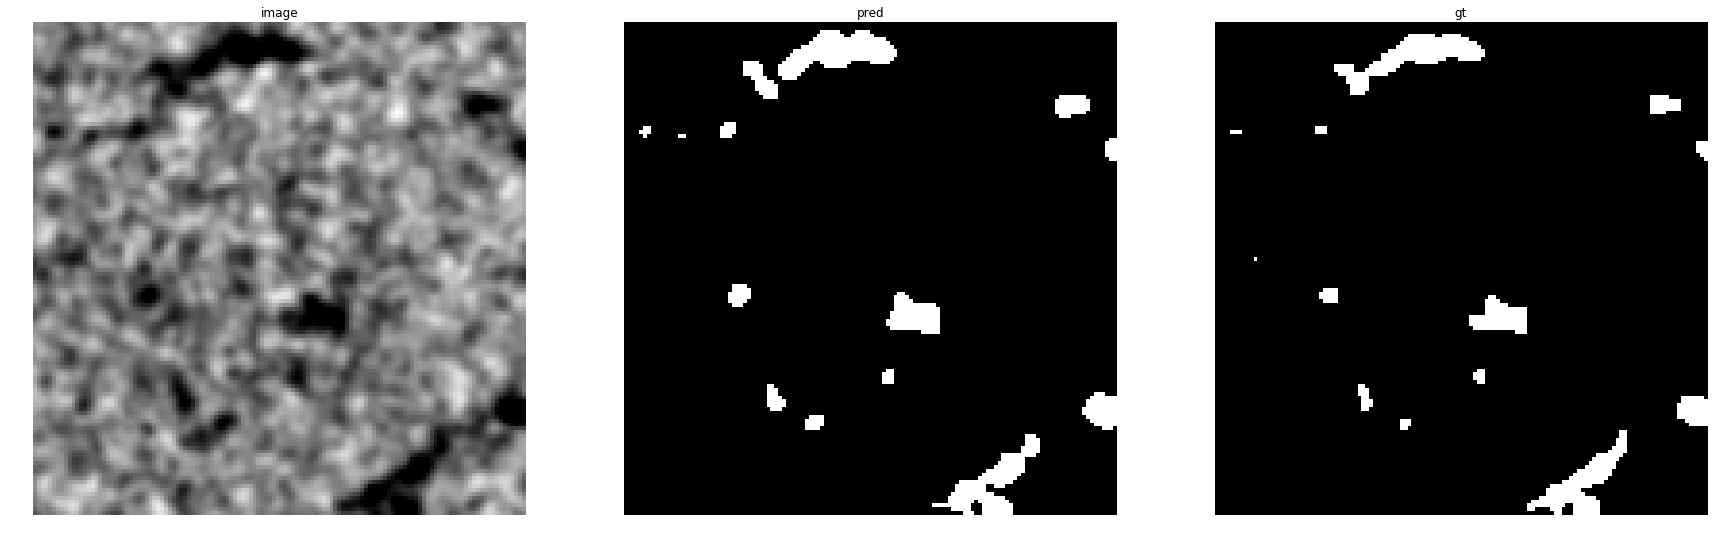

accuracy    : 0.988037109375
precision   : 0.7967781908302355
recall      : 0.9525925925925925
f1          : 0.8677462887989204
pr_auc      : 0.9757983305701258
iou         : 0.766388557806913


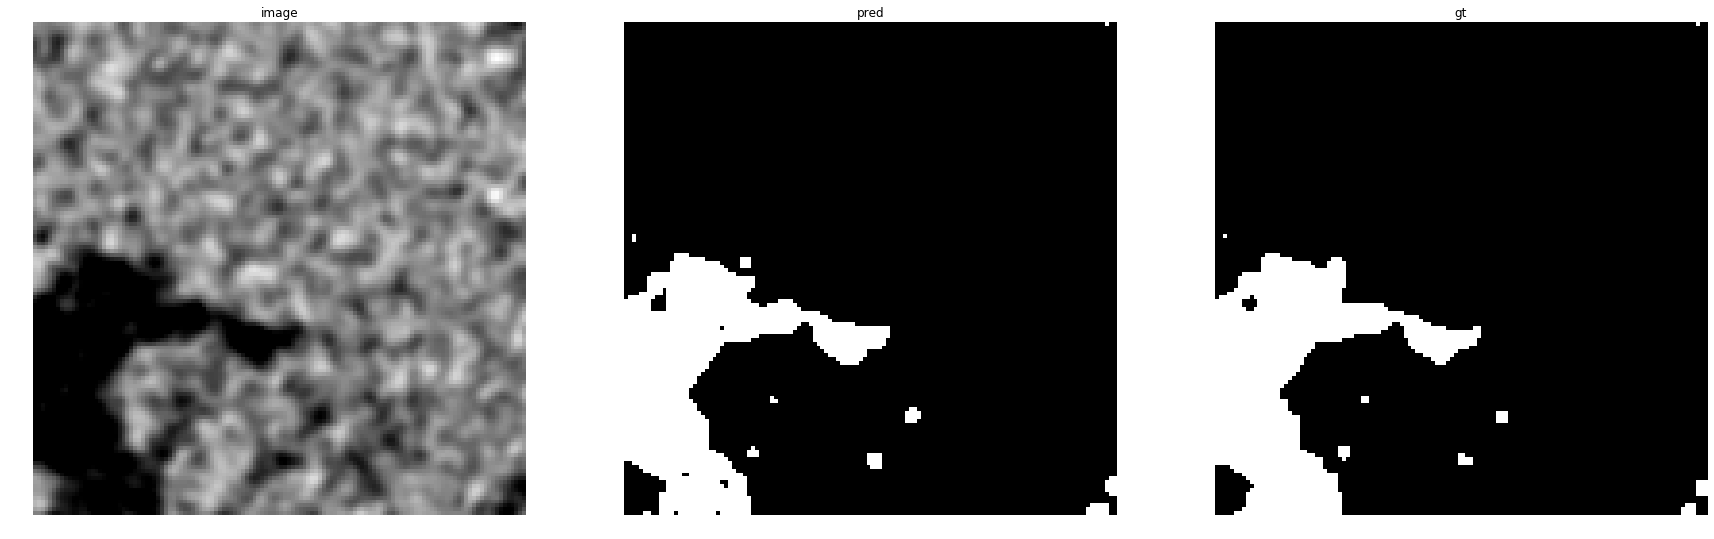

accuracy    : 0.992919921875
precision   : 0.9757731958762886
recall      : 0.9648318042813455
f1          : 0.9702716555612507
pr_auc      : 0.9971850864807419
iou         : 0.9422598307615729


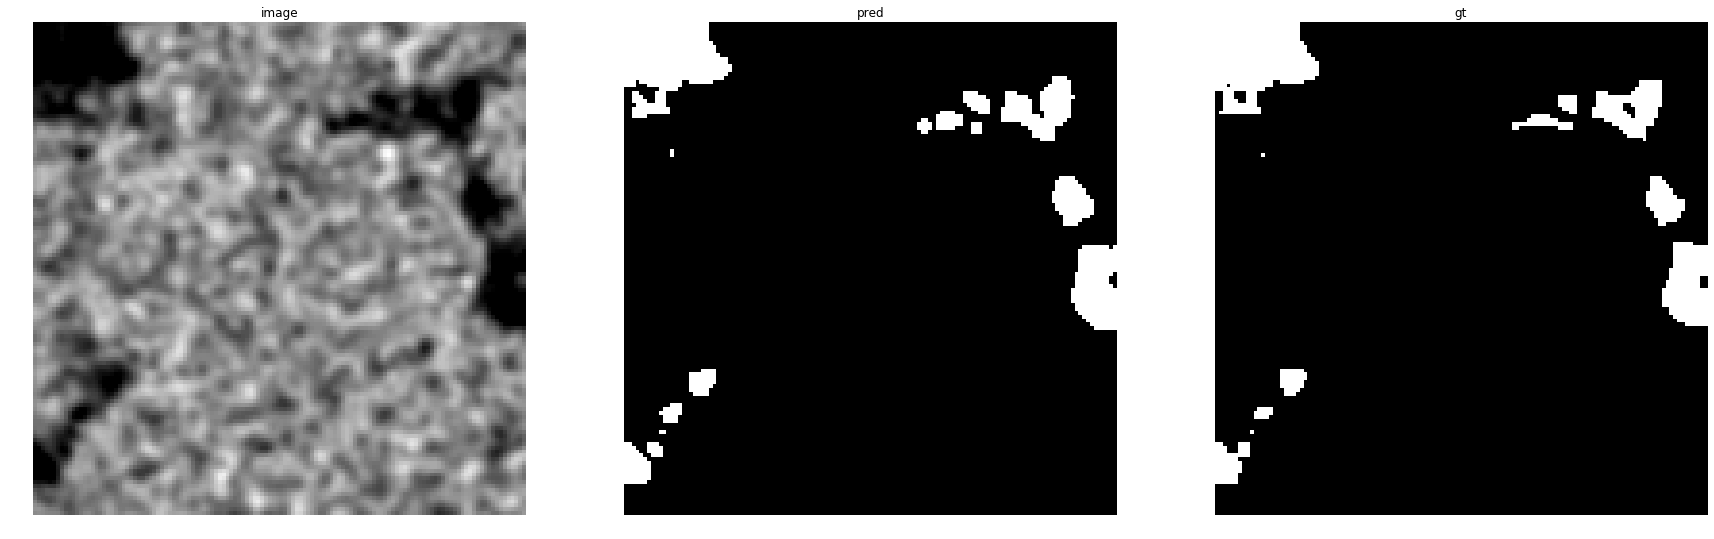

accuracy    : 0.99072265625
precision   : 0.9052901023890785
recall      : 0.9627949183303085
f1          : 0.9331574318381707
pr_auc      : 0.9891506851118932
iou         : 0.8746908491343776


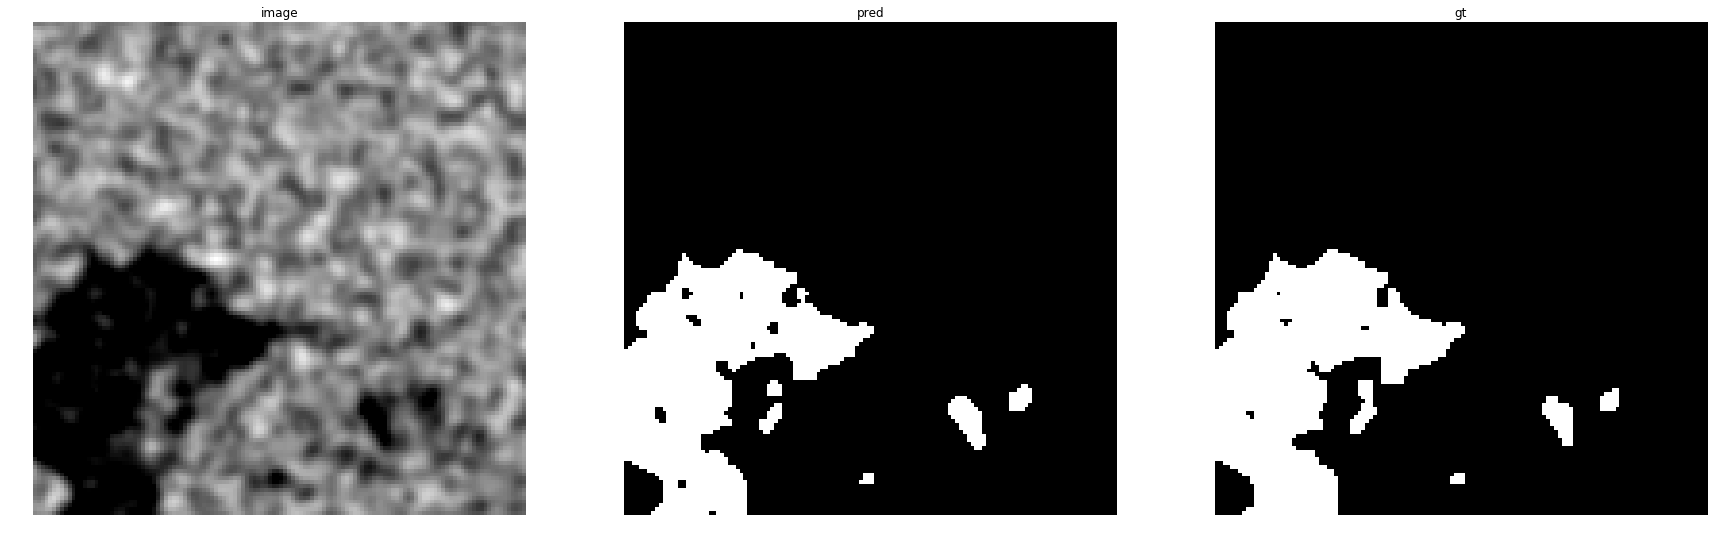

accuracy    : 0.9913330078125
precision   : 0.9884020618556701
recall      : 0.9524006622516556
f1          : 0.9700674536256324
pr_auc      : 0.9981218254363408
iou         : 0.9418747441670078


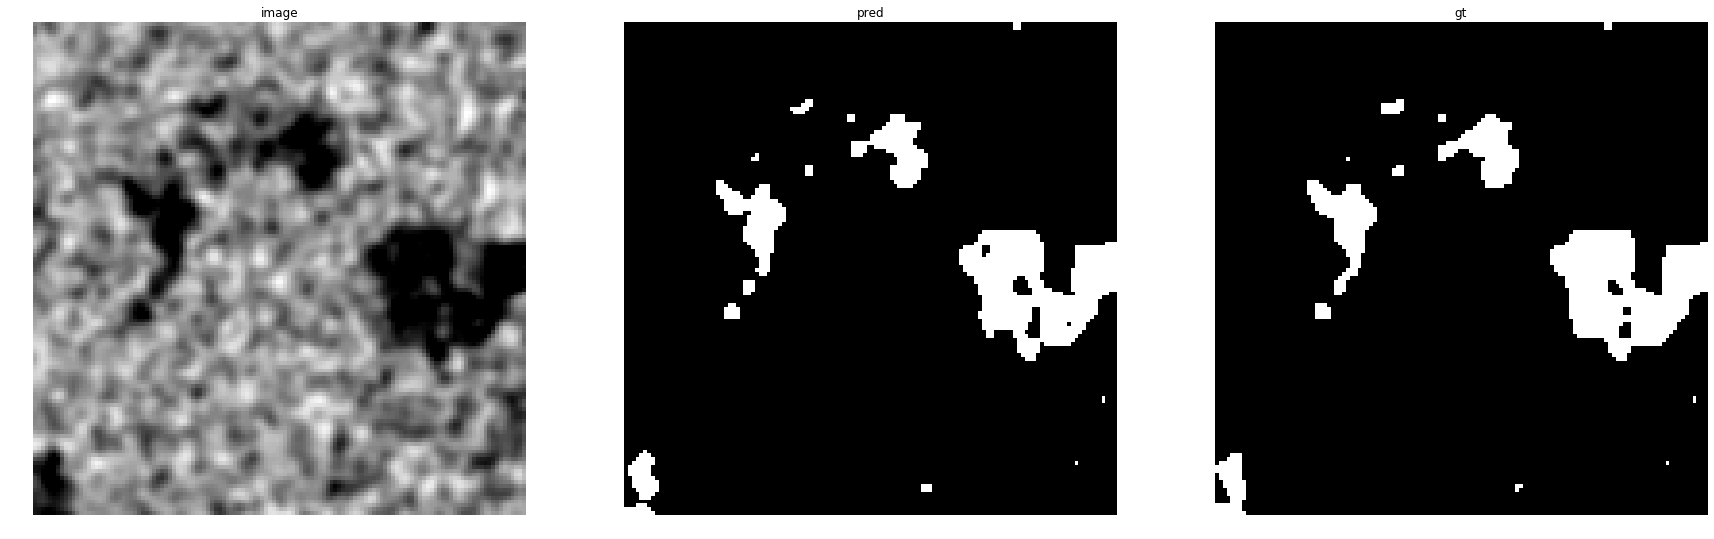

accuracy    : 0.99224853515625
precision   : 0.9877017678708686
recall      : 0.920487106017192
f1          : 0.9529106414534668
pr_auc      : 0.9935959657579612
iou         : 0.910056657223796


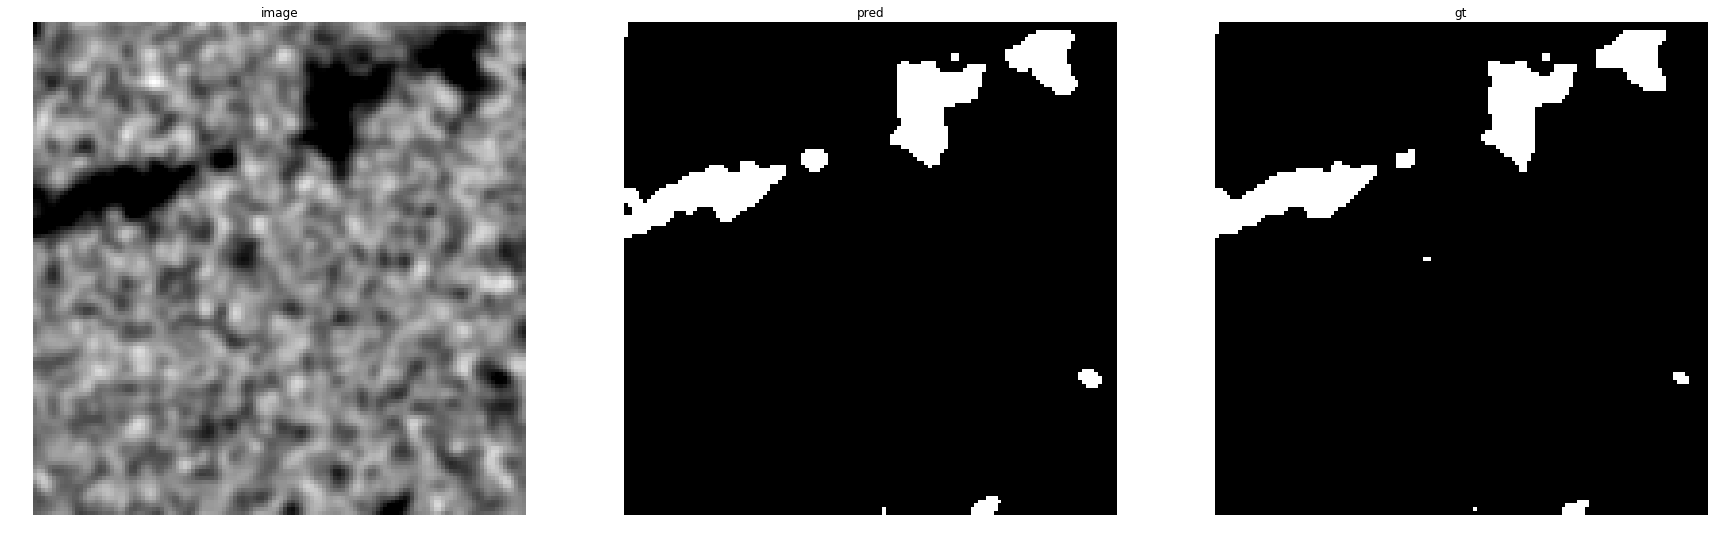

accuracy    : 0.993408203125
precision   : 0.92616226071103
recall      : 0.9741131351869607
f1          : 0.9495327102803738
pr_auc      : 0.9946400241752347
iou         : 0.9039145907473309
SoilAh-1


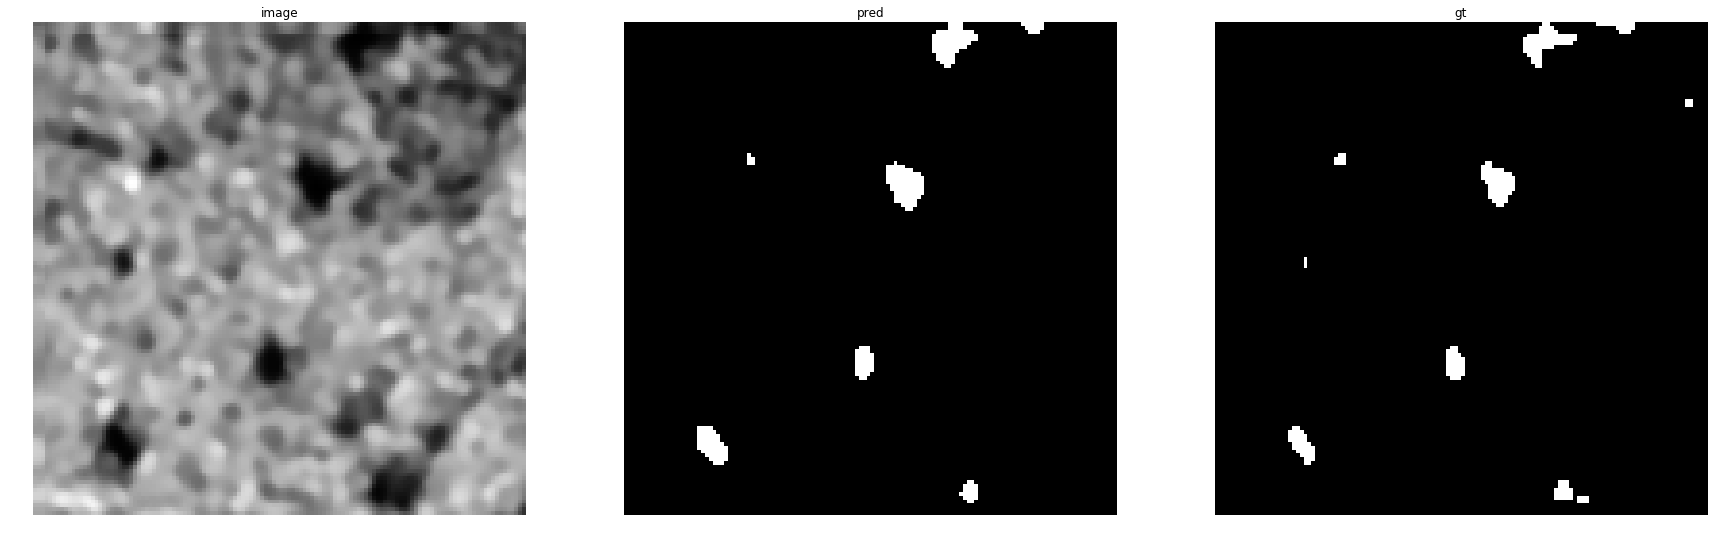

accuracy    : 0.99432373046875
precision   : 0.8071895424836601
recall      : 0.8790035587188612
f1          : 0.8415672913117547
pr_auc      : 0.9391713081041306
iou         : 0.7264705882352941


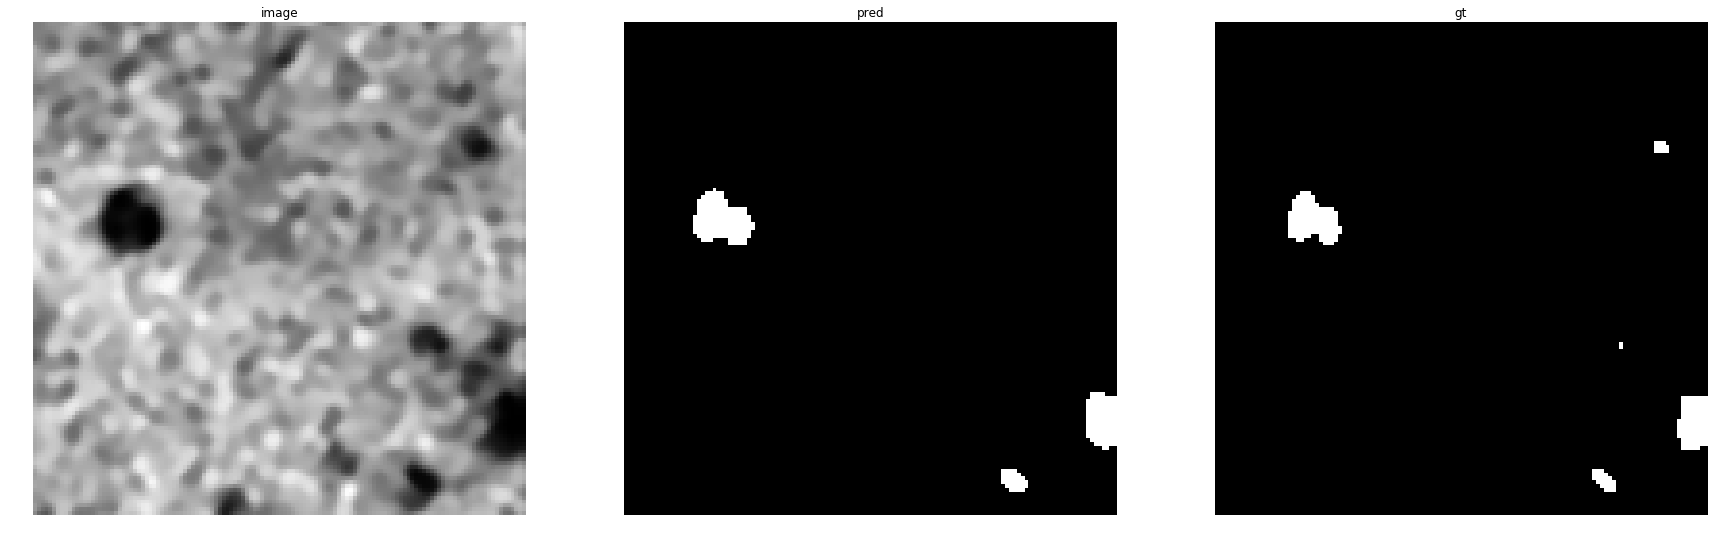

accuracy    : 0.99639892578125
precision   : 0.8581081081081081
recall      : 0.9372693726937269
f1          : 0.8959435626102292
pr_auc      : 0.979516608147905
iou         : 0.8115015974440895


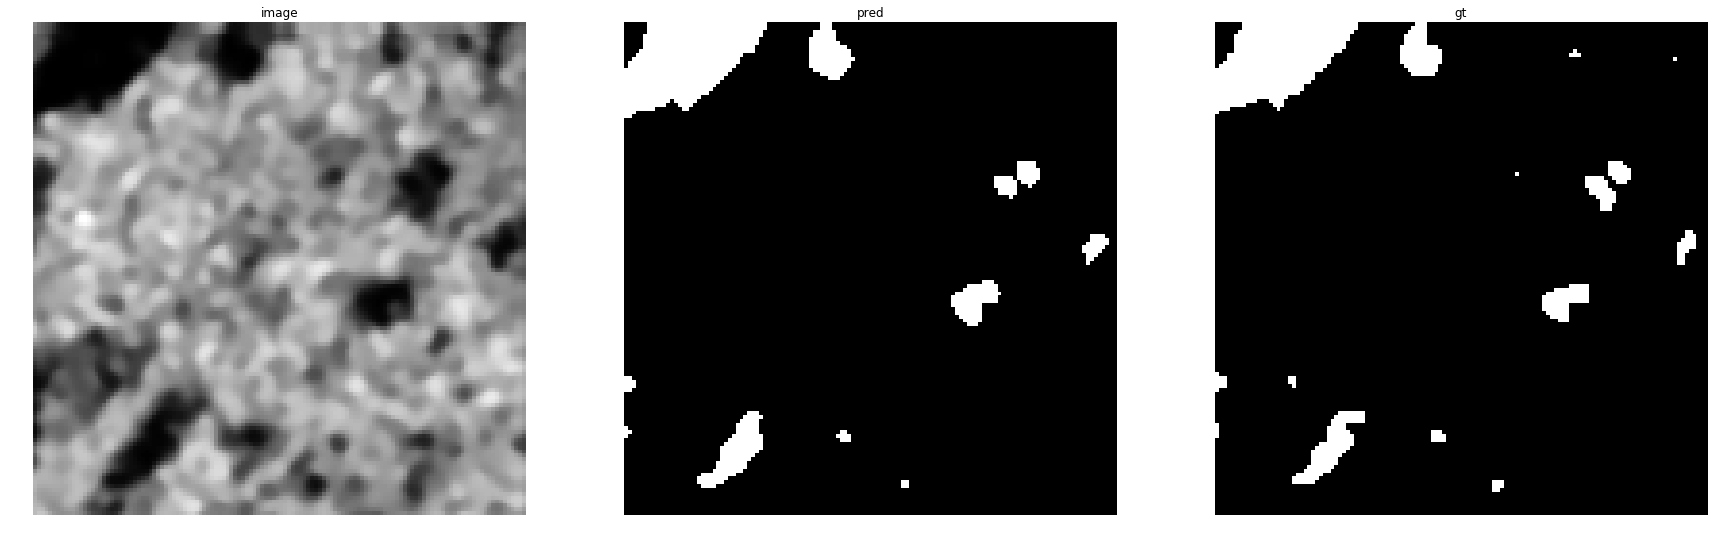

accuracy    : 0.99102783203125
precision   : 0.9144186046511628
recall      : 0.9470134874759152
f1          : 0.930430667297681
pr_auc      : 0.9859142805645856
iou         : 0.8699115044247787


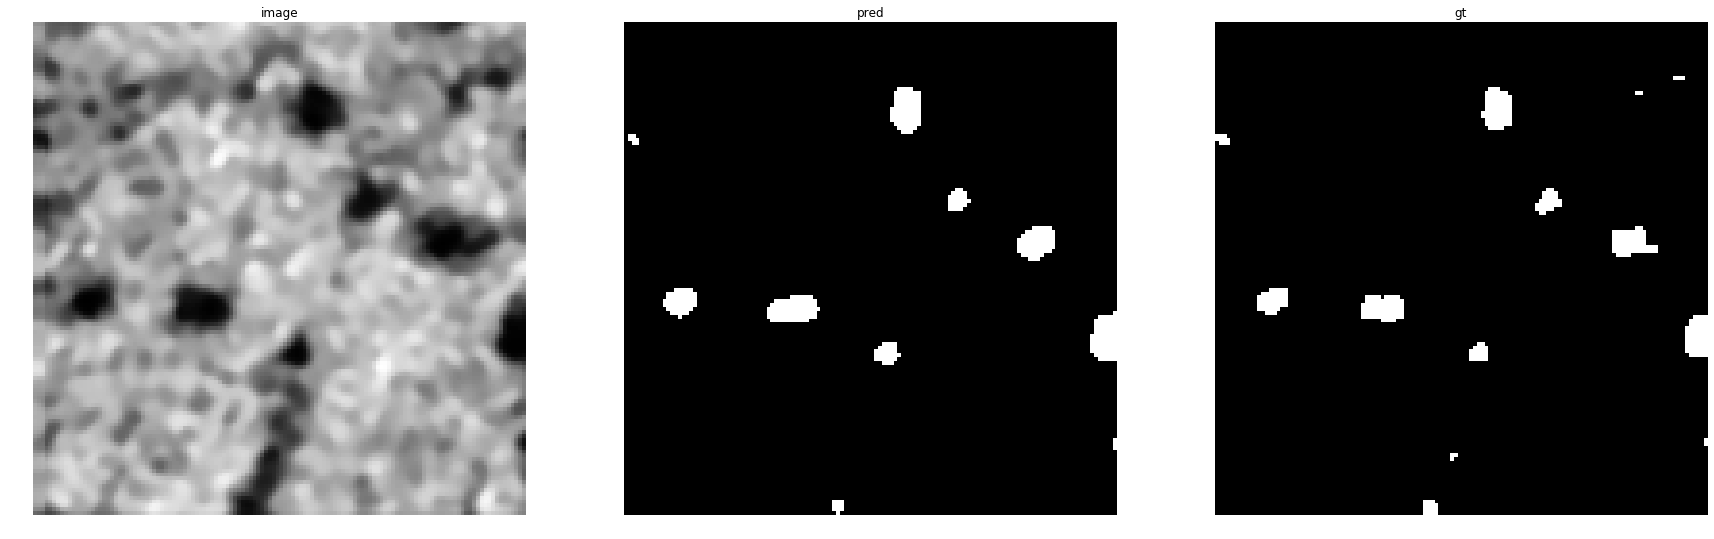

accuracy    : 0.9935302734375
precision   : 0.8337182448036952
recall      : 0.9139240506329114
f1          : 0.8719806763285024
pr_auc      : 0.9566025571034098
iou         : 0.7730192719486081


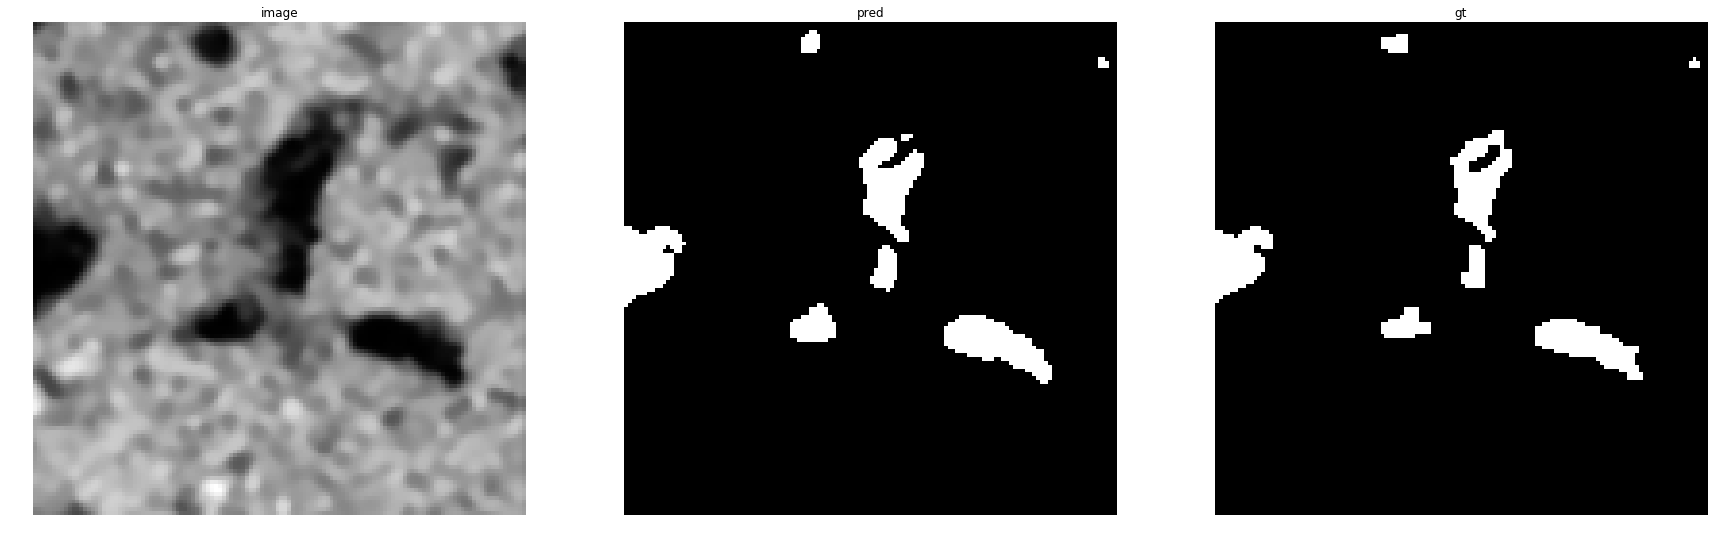

accuracy    : 0.98968505859375
precision   : 0.8543263964950711
recall      : 0.9558823529411765
f1          : 0.9022556390977443
pr_auc      : 0.9816301703413784
iou         : 0.821917808219178


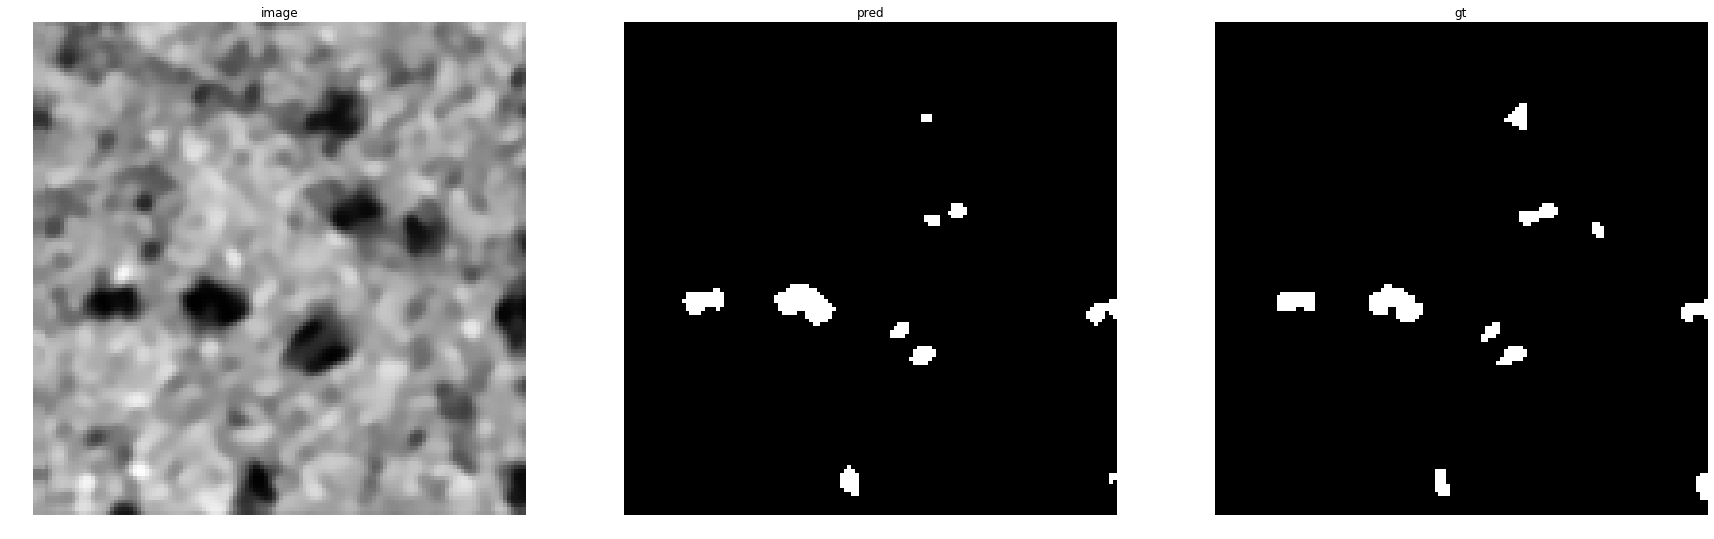

accuracy    : 0.99346923828125
precision   : 0.8489932885906041
recall      : 0.8031746031746032
f1          : 0.8254486133768353
pr_auc      : 0.927925989272444
iou         : 0.7027777777777777


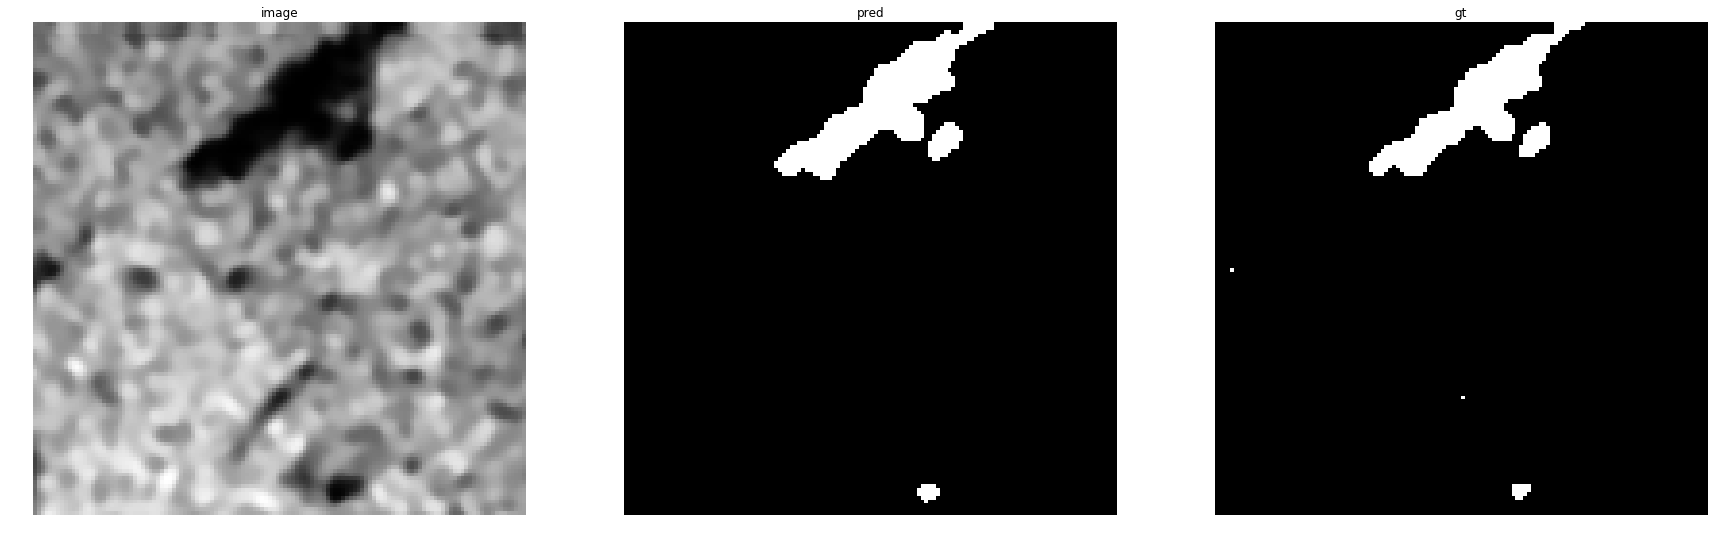

accuracy    : 0.9945068359375
precision   : 0.8904458598726115
recall      : 0.9943100995732574
f1          : 0.9395161290322581
pr_auc      : 0.9967580514697743
iou         : 0.8859315589353612


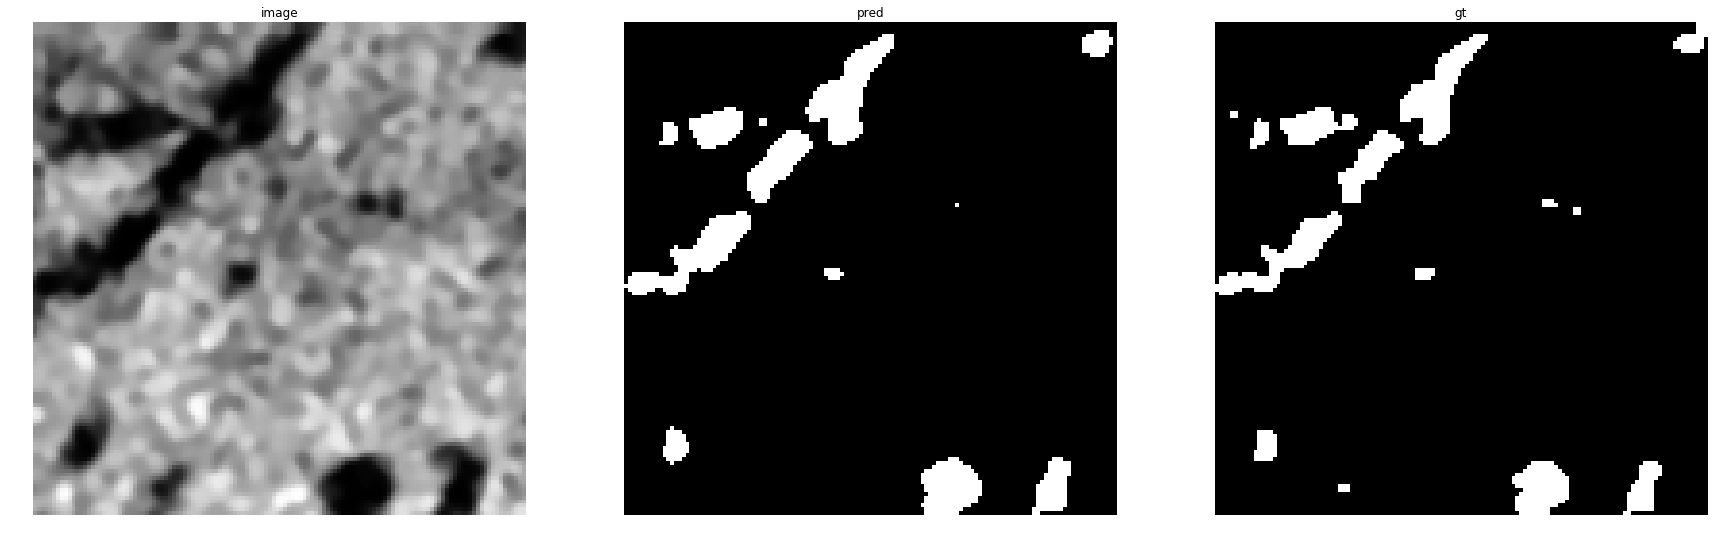

accuracy    : 0.9869384765625
precision   : 0.8751033912324235
recall      : 0.943800178412132
f1          : 0.9081545064377682
pr_auc      : 0.9828919380253356
iou         : 0.8317610062893082


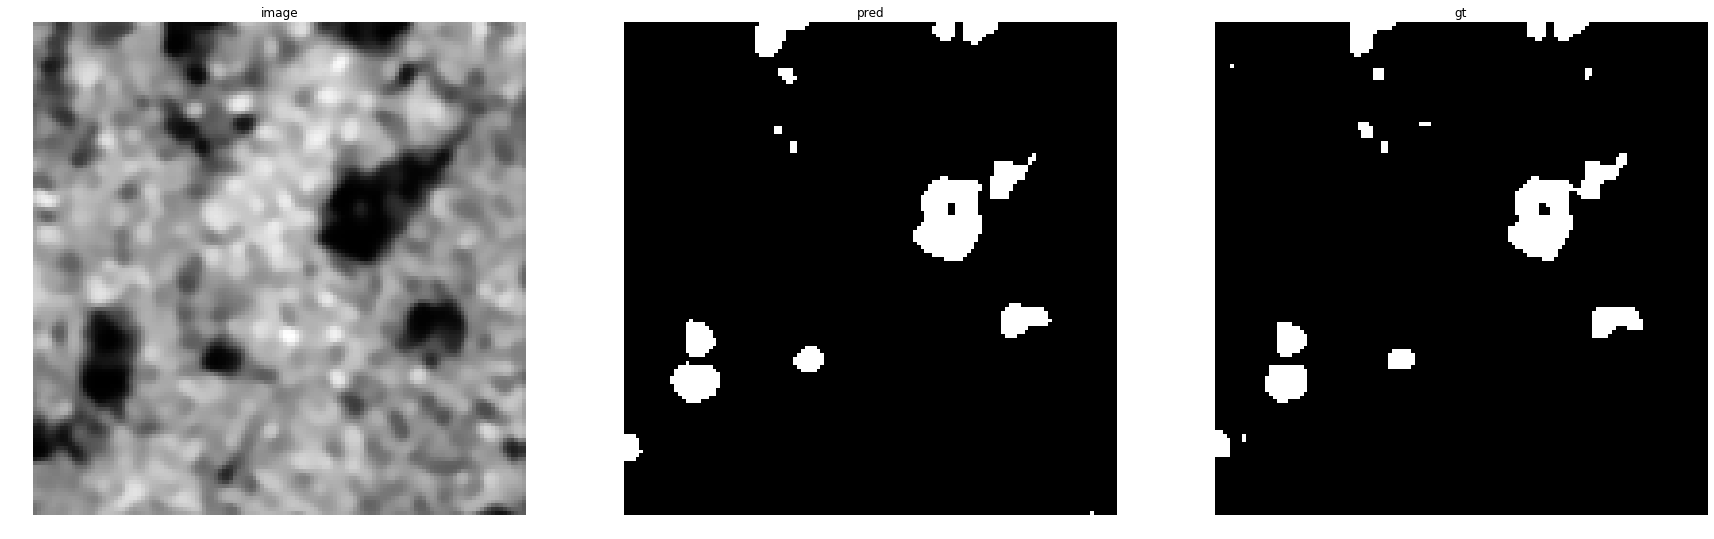

accuracy    : 0.99212646484375
precision   : 0.8914081145584726
recall      : 0.9515923566878981
f1          : 0.920517560073937
pr_auc      : 0.9843836268164325
iou         : 0.8527397260273972


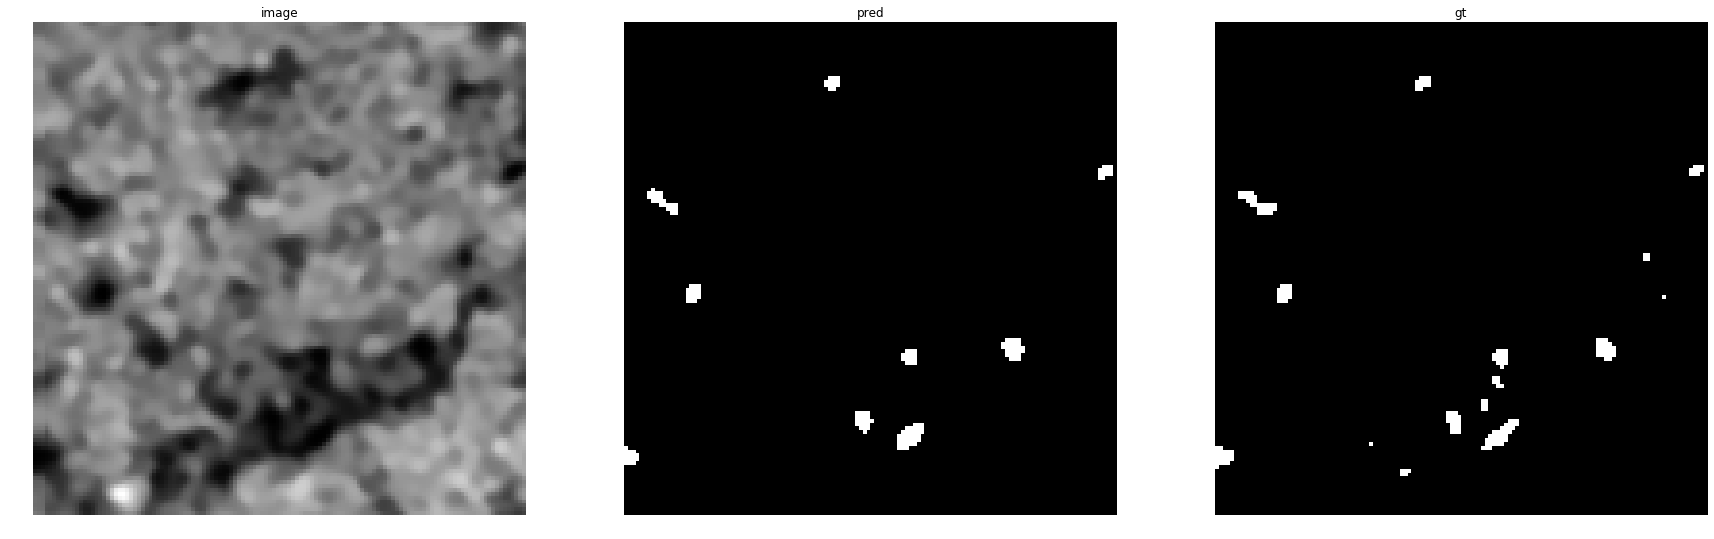

accuracy    : 0.9957275390625
precision   : 0.8876404494382022
recall      : 0.7596153846153846
f1          : 0.8186528497409327
pr_auc      : 0.909220932678034
iou         : 0.6929824561403509
SoilB-2


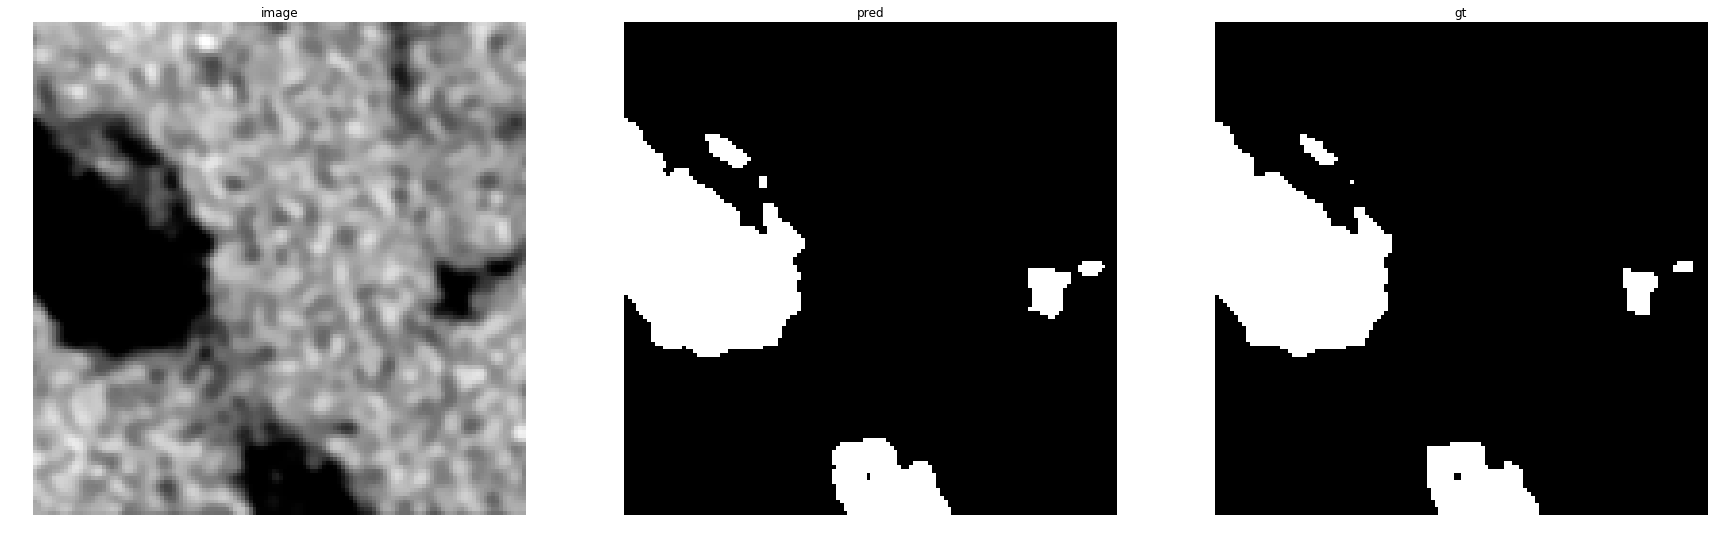

accuracy    : 0.9893798828125
precision   : 0.9293831168831169
recall      : 1.0
f1          : 0.9633992427429533
pr_auc      : 0.9996424821851978
iou         : 0.9293831168831169


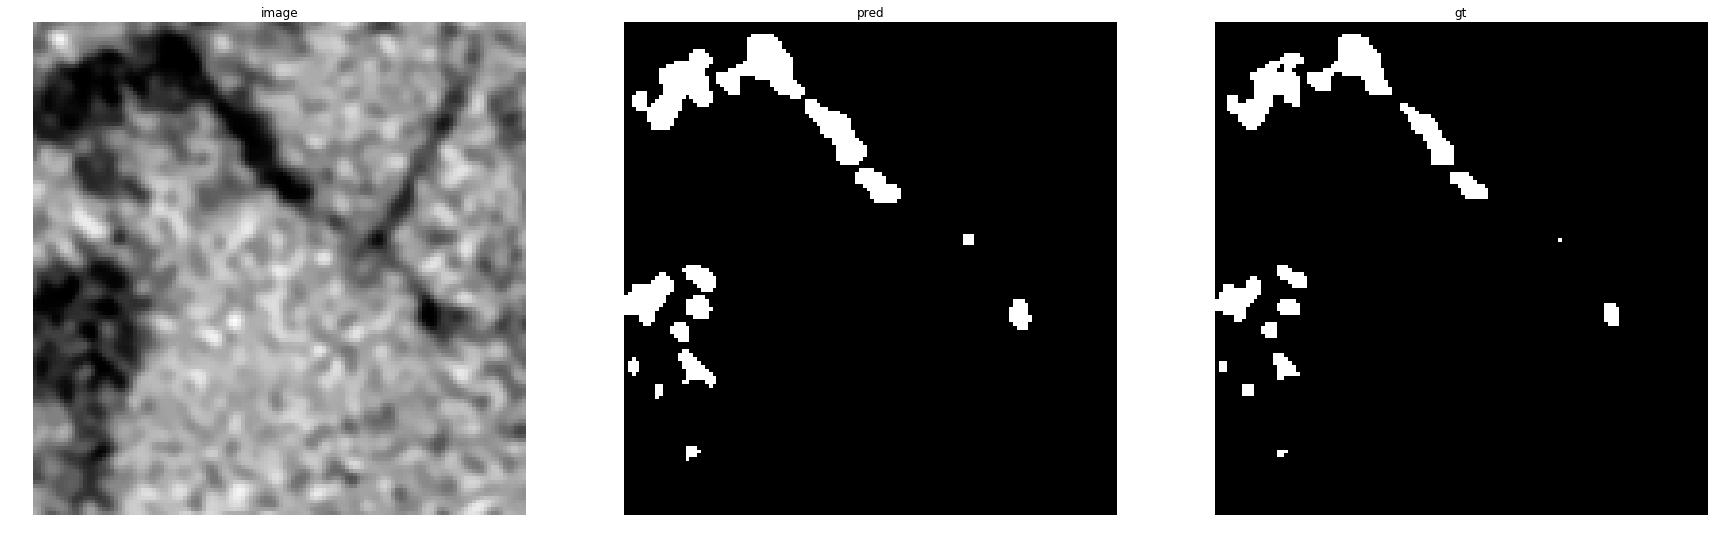

accuracy    : 0.986328125
precision   : 0.7664155005382132
recall      : 0.9902642559109874
f1          : 0.8640776699029126
pr_auc      : 0.9832208847801628
iou         : 0.7606837606837606


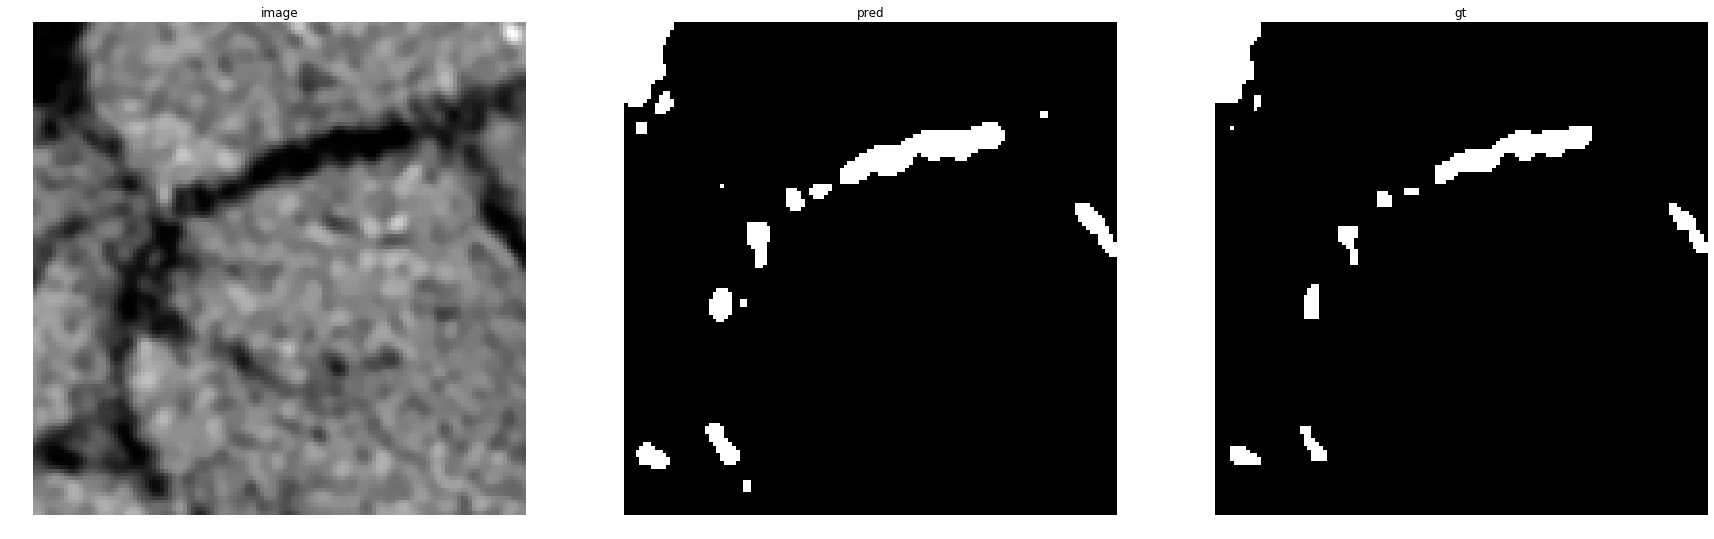

accuracy    : 0.98748779296875
precision   : 0.7608951707891637
recall      : 0.9969135802469136
f1          : 0.863059452237809
pr_auc      : 0.9931584425659175
iou         : 0.7591069330199764


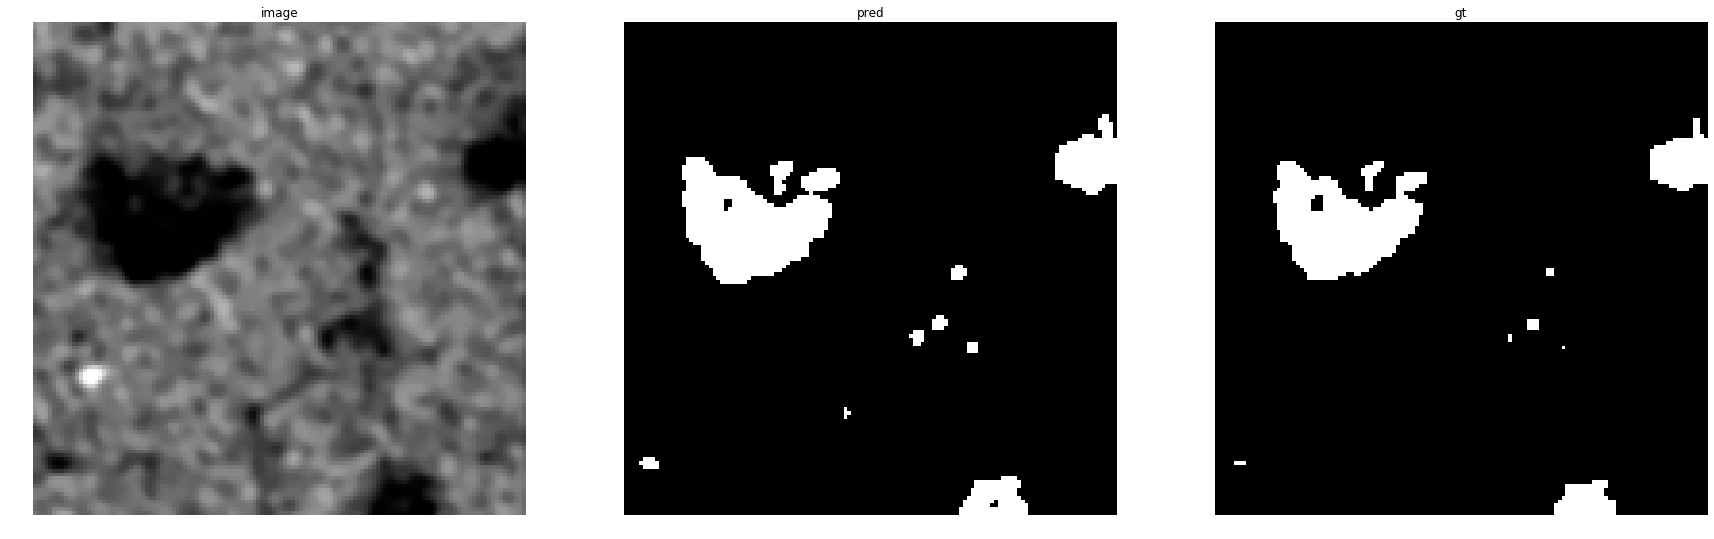

accuracy    : 0.98822021484375
precision   : 0.8513833992094861
recall      : 0.9953789279112755
f1          : 0.917767362590541
pr_auc      : 0.9951193729634057
iou         : 0.8480314960629921


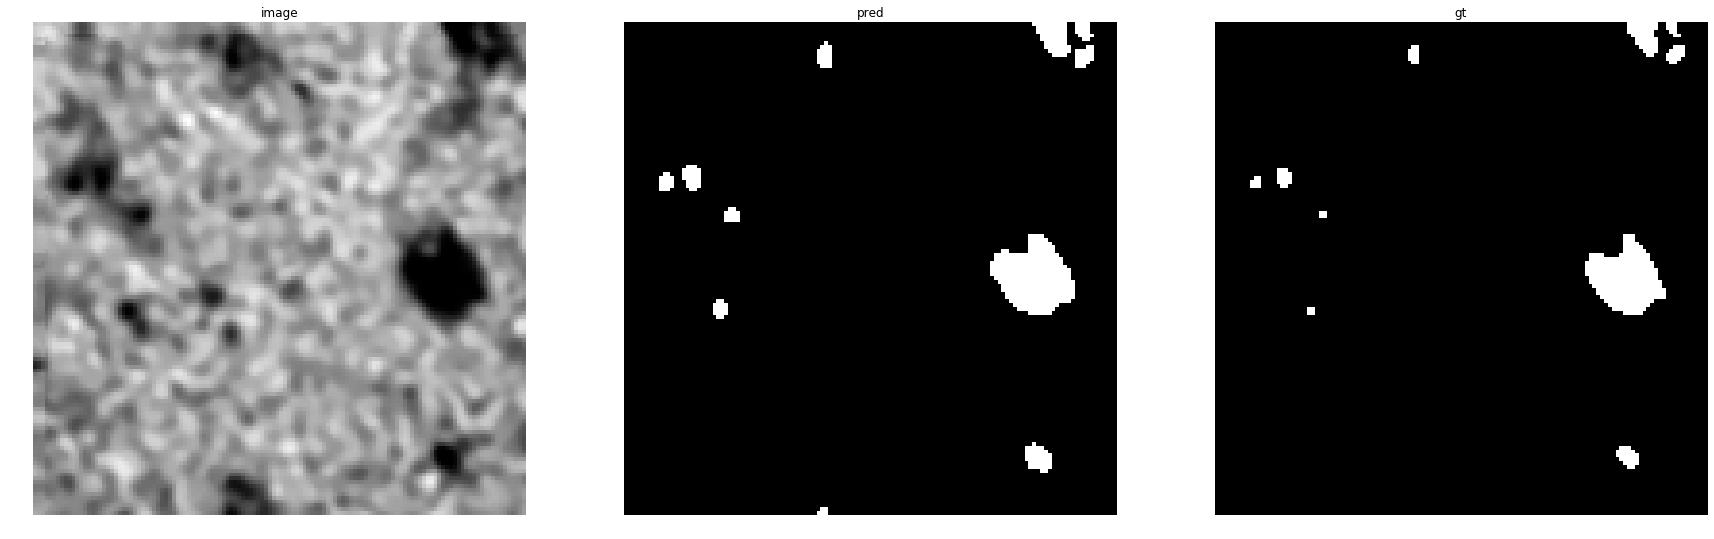

accuracy    : 0.9918212890625
precision   : 0.7590579710144928
recall      : 0.9976190476190476
f1          : 0.8621399176954734
pr_auc      : 0.9897720380395927
iou         : 0.7576853526220615


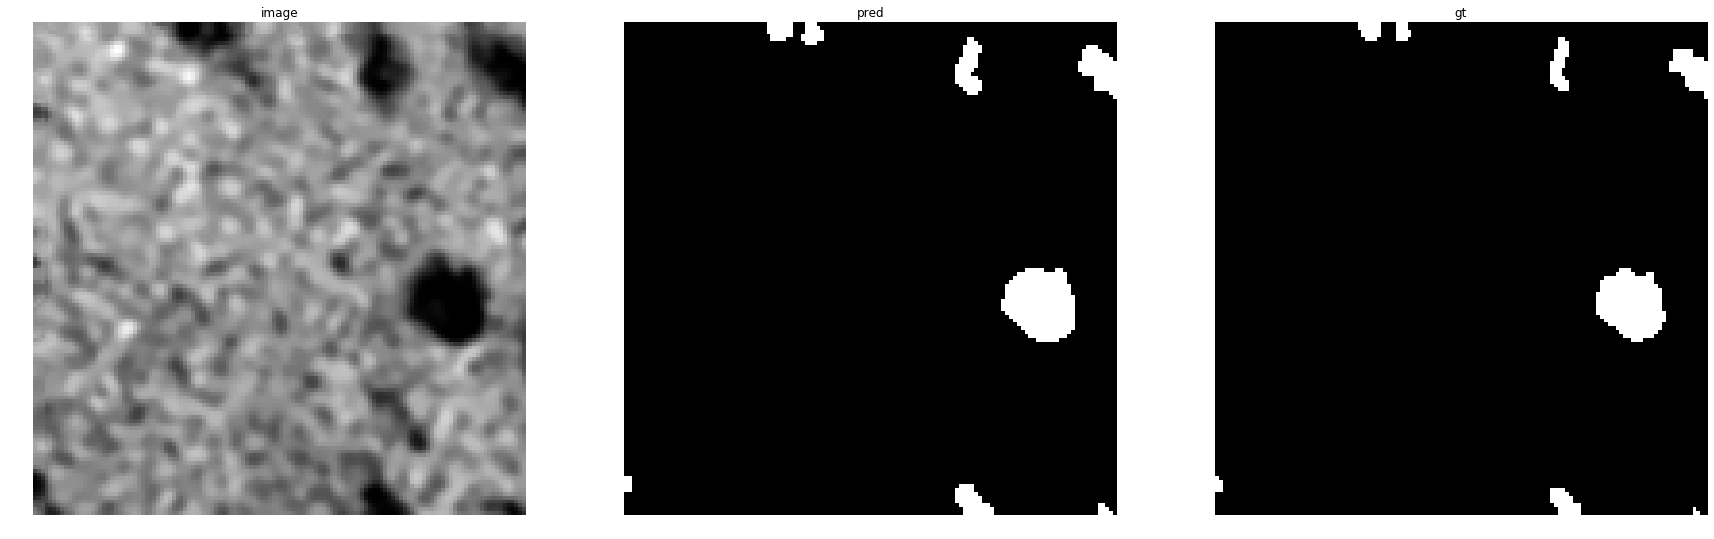

accuracy    : 0.99395751953125
precision   : 0.8266199649737302
recall      : 1.0
f1          : 0.9050814956855225
pr_auc      : 0.9945117184239964
iou         : 0.8266199649737302


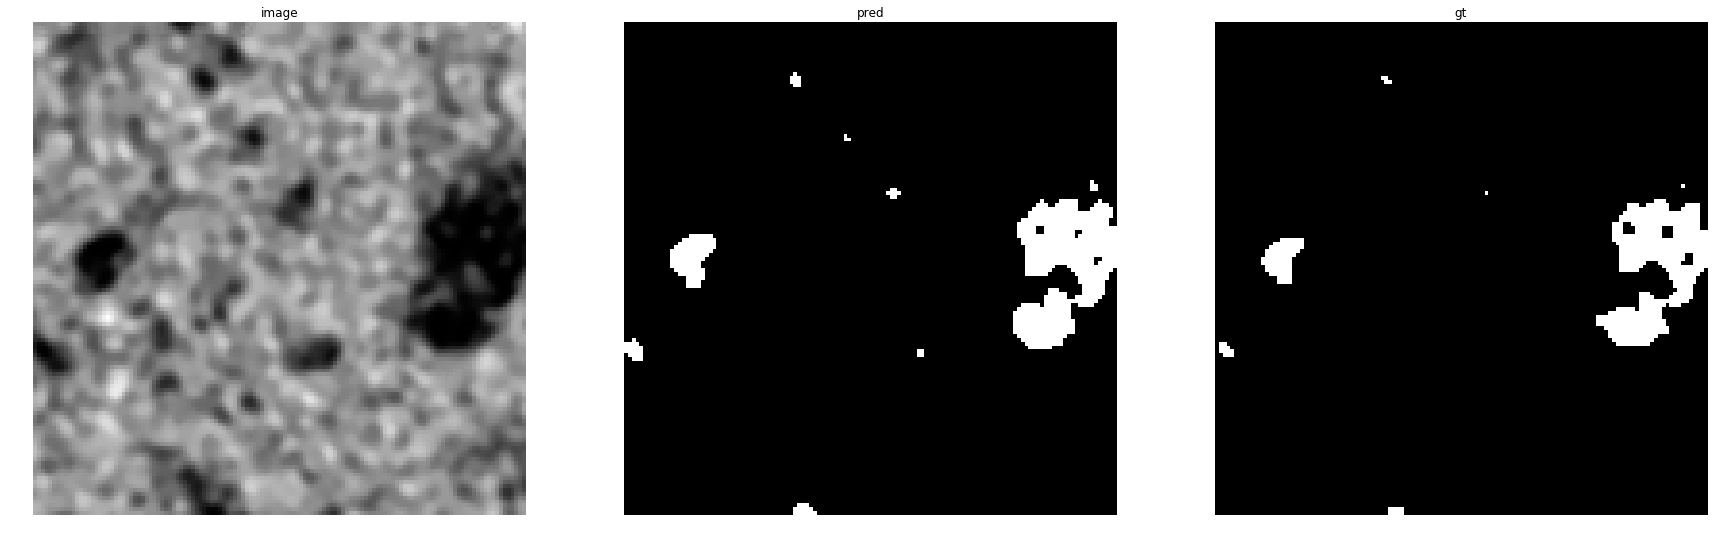

accuracy    : 0.99017333984375
precision   : 0.8164251207729468
recall      : 0.9868613138686131
f1          : 0.8935888962326503
pr_auc      : 0.9918303559146042
iou         : 0.8076463560334528


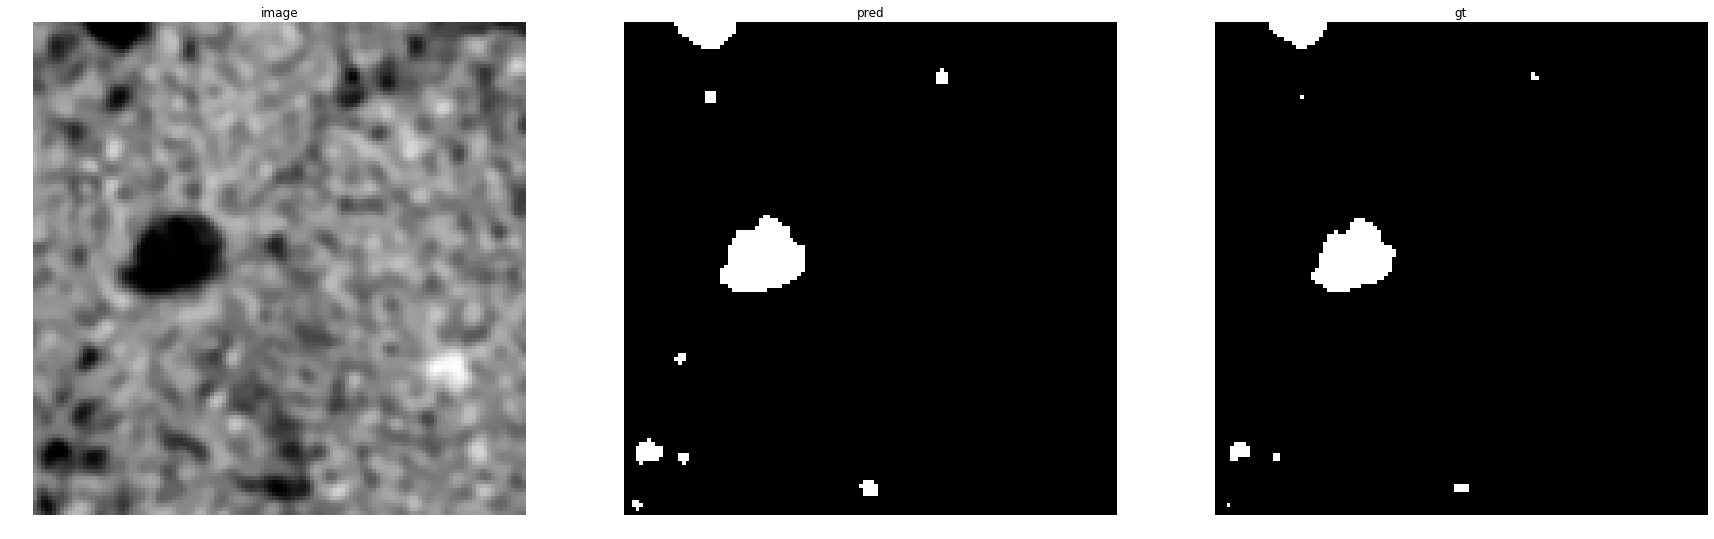

accuracy    : 0.994384765625
precision   : 0.8071278825995807
recall      : 1.0
f1          : 0.8932714617169374
pr_auc      : 0.9974861916088367
iou         : 0.8071278825995807


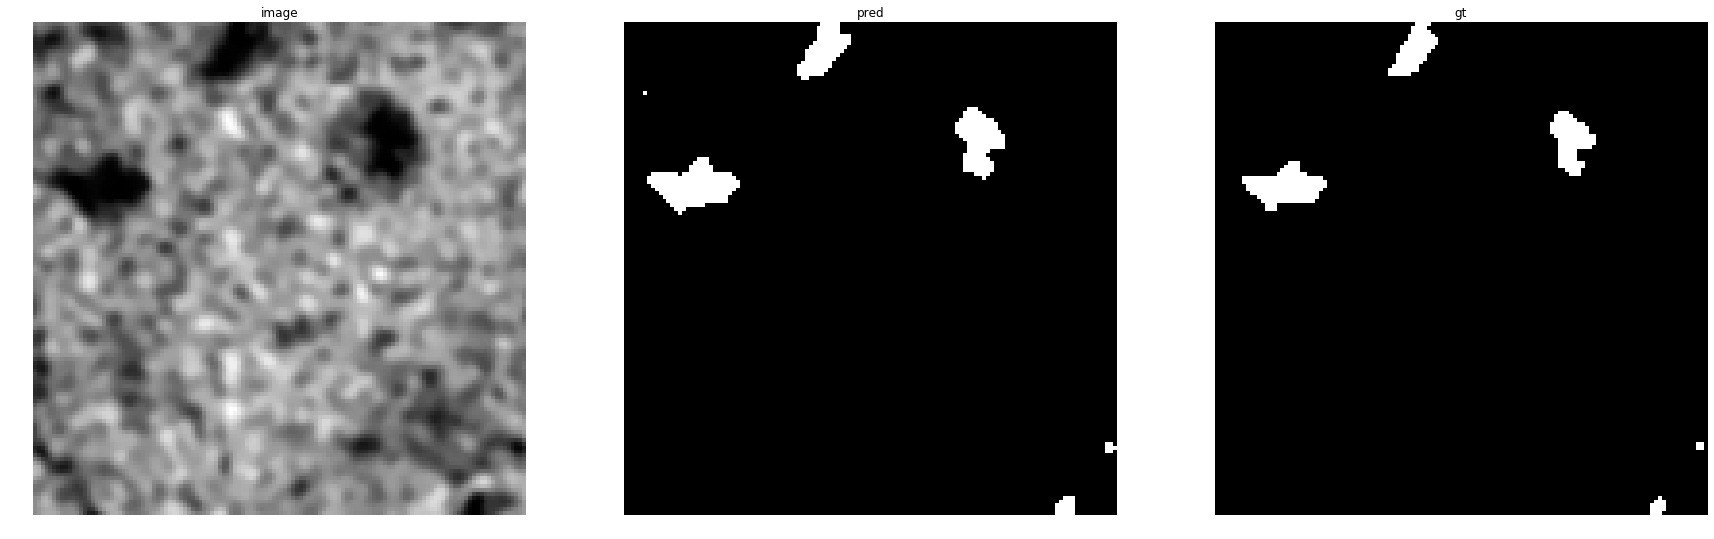

accuracy    : 0.99420166015625
precision   : 0.8057259713701431
recall      : 1.0
f1          : 0.8924122310305775
pr_auc      : 0.9970894899349474
iou         : 0.8057259713701431


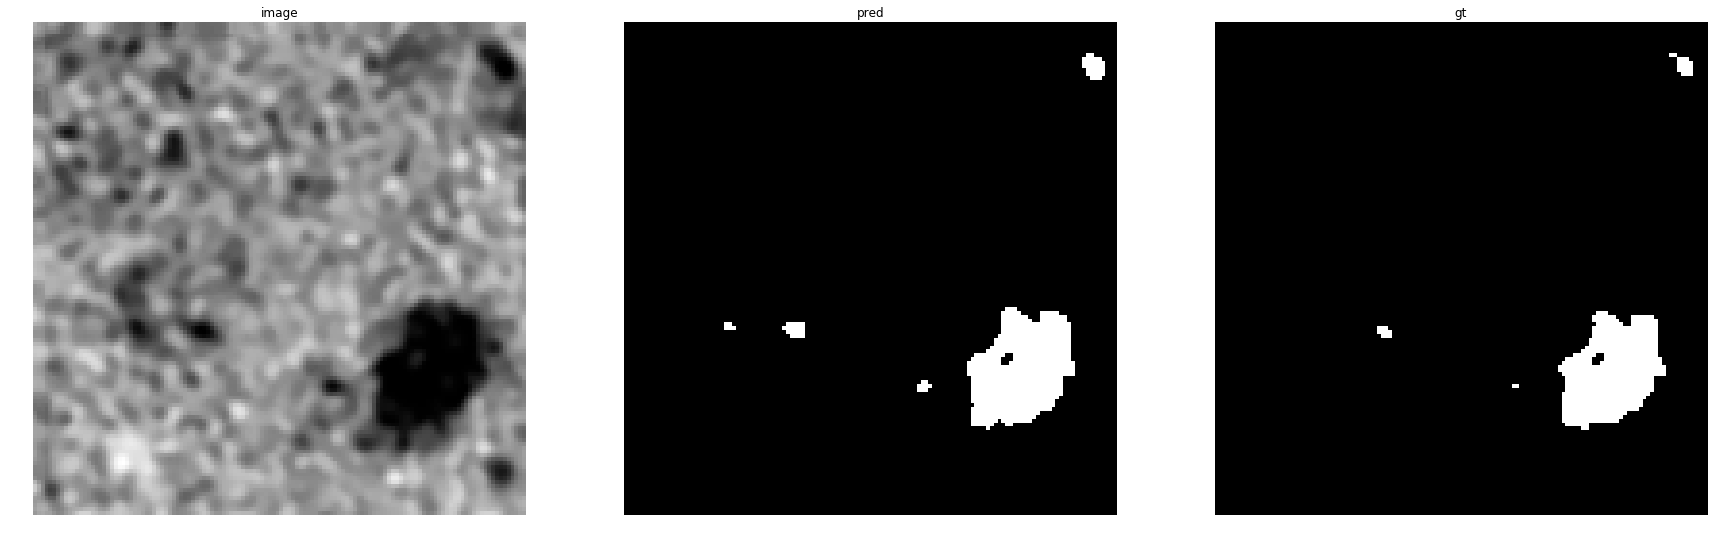

accuracy    : 0.99420166015625
precision   : 0.8717201166180758
recall      : 0.9884297520661157
f1          : 0.9264136328427576
pr_auc      : 0.9943349140548291
iou         : 0.862914862914863
TeTree_subset1


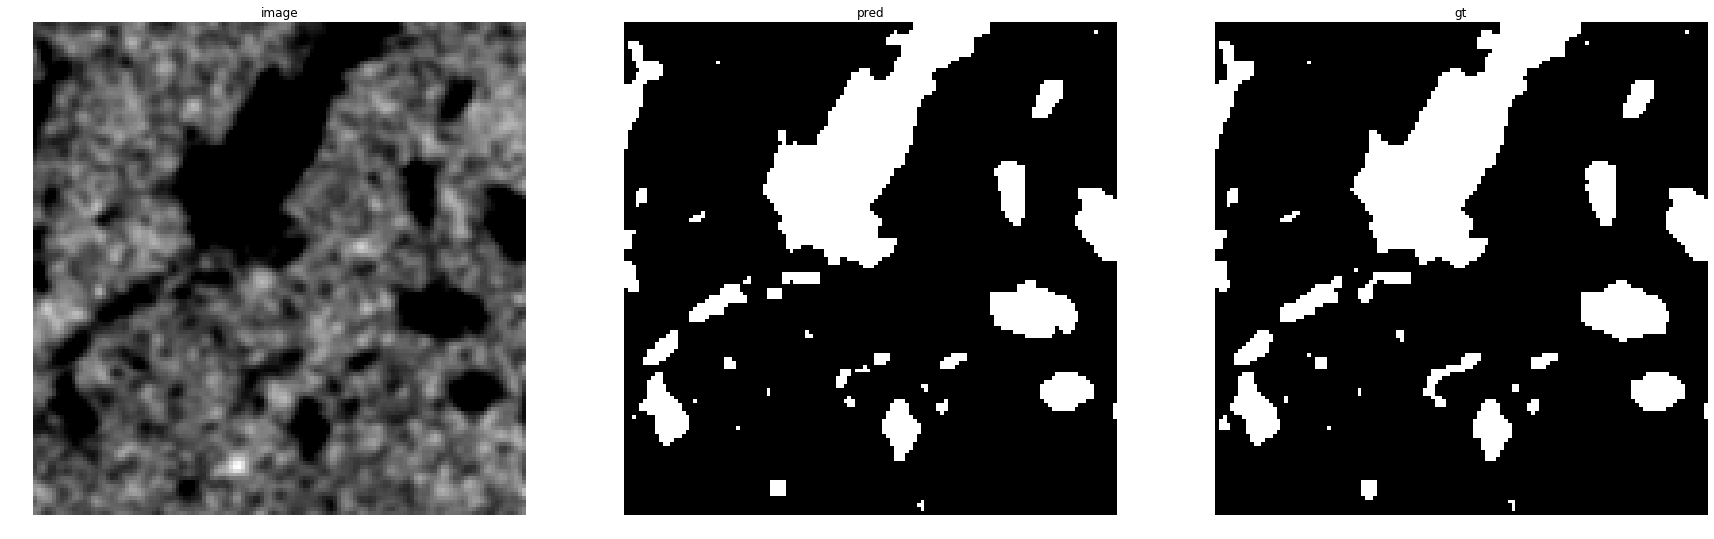

accuracy    : 0.989990234375
precision   : 0.9978998949947497
recall      : 0.9474908607510801
f1          : 0.9720422775315376
pr_auc      : 0.9982278714245486
iou         : 0.9456053067993366


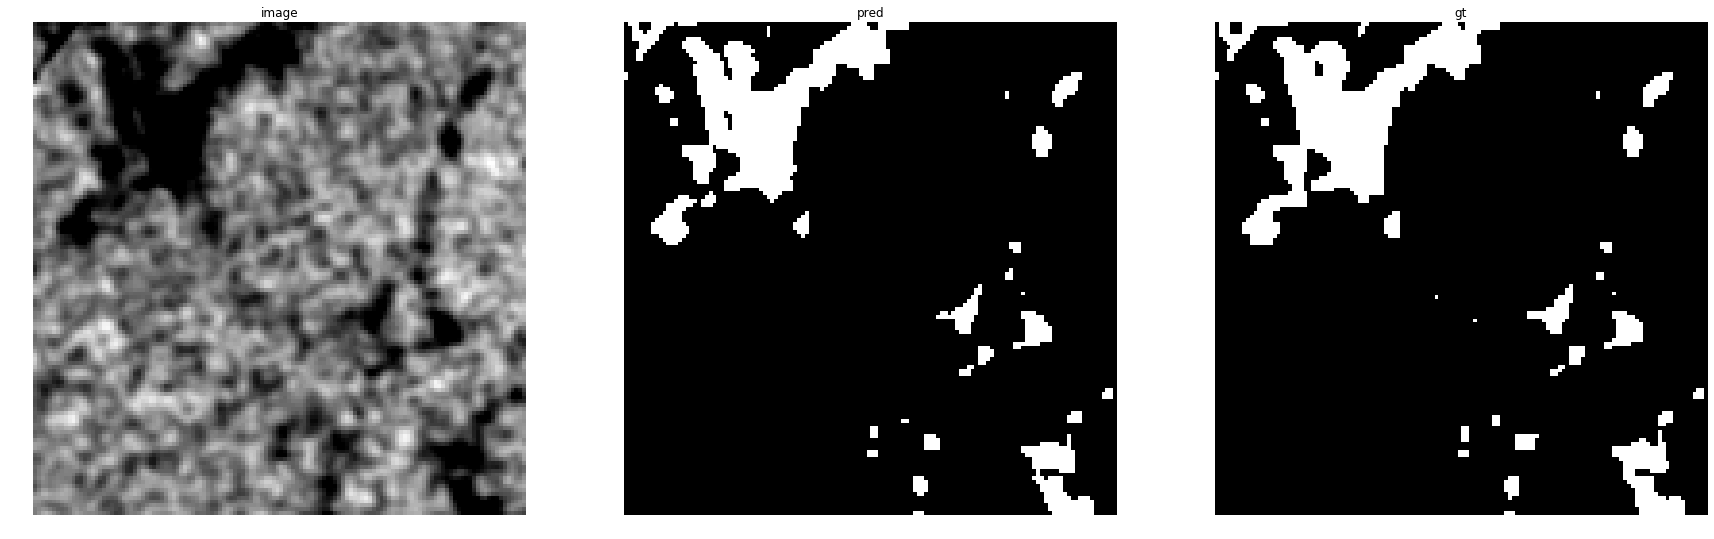

accuracy    : 0.9903564453125
precision   : 0.9936342592592593
recall      : 0.921137339055794
f1          : 0.9560133630289532
pr_auc      : 0.9958938941537531
iou         : 0.9157333333333333


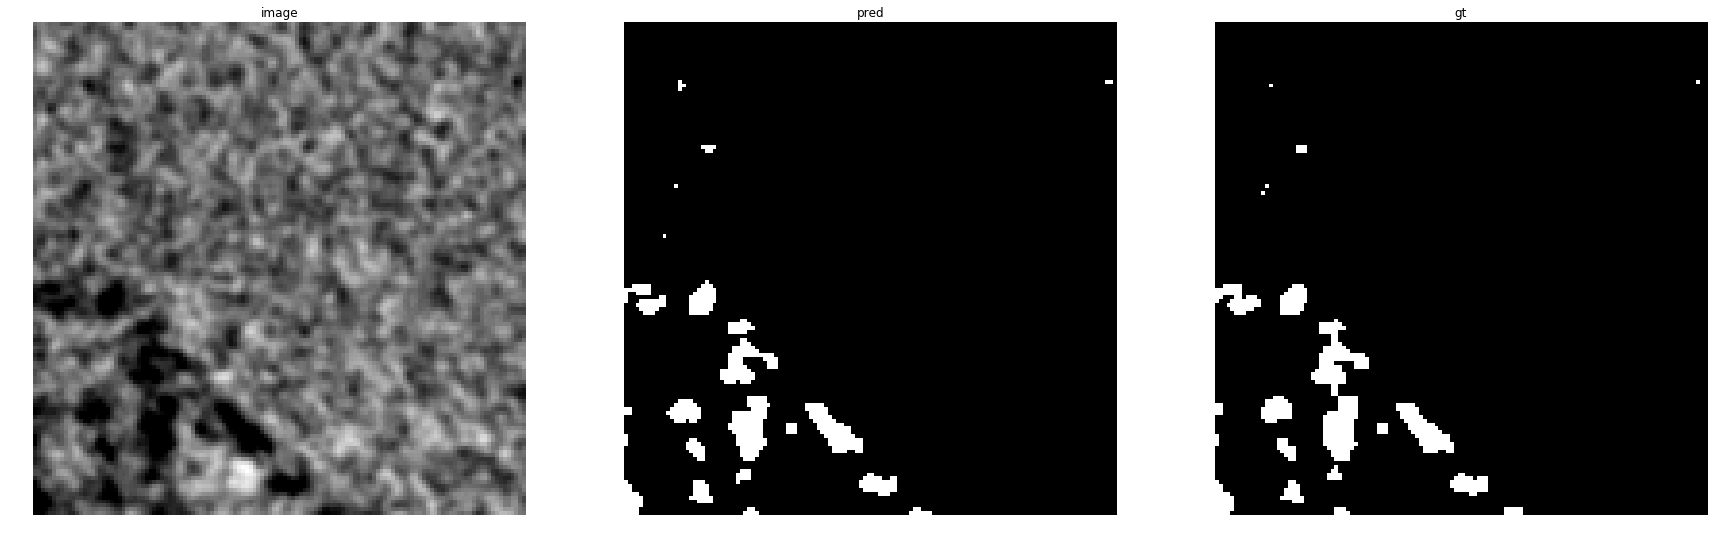

accuracy    : 0.99517822265625
precision   : 0.9560975609756097
recall      : 0.91875
f1          : 0.9370517928286852
pr_auc      : 0.9851446774858164
iou         : 0.881559220389805


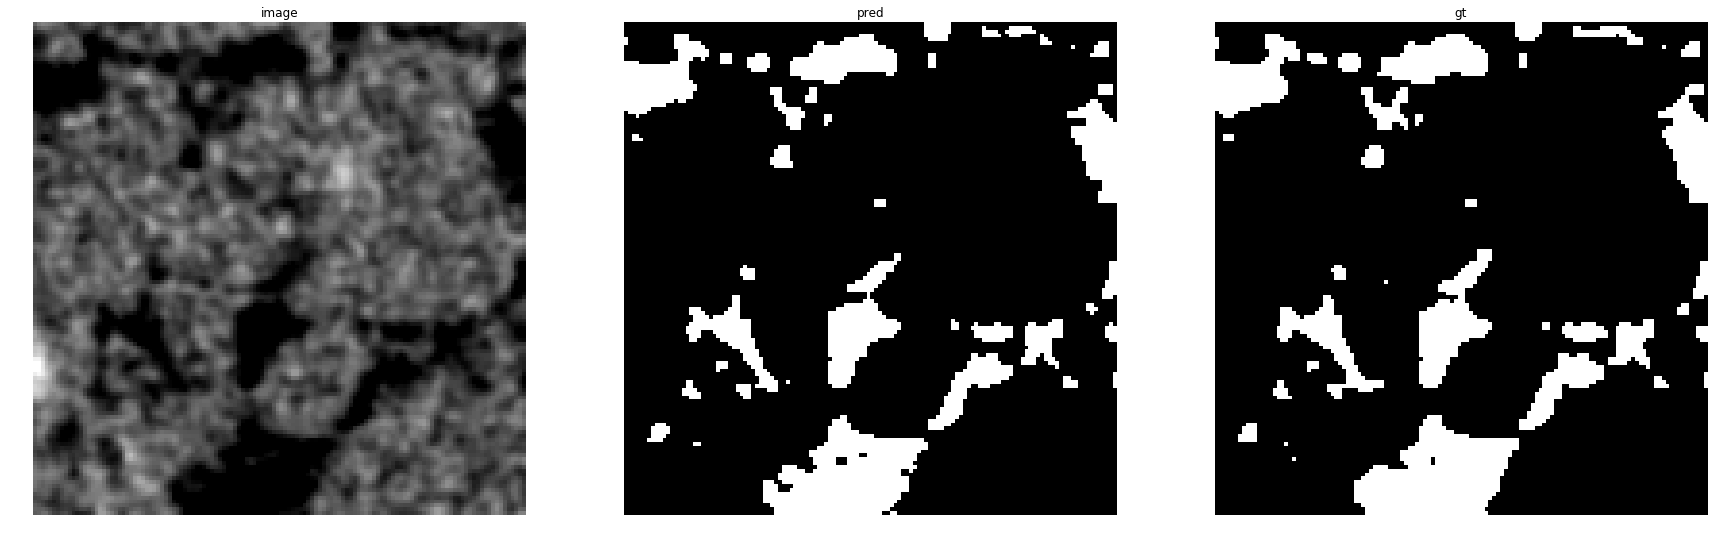

accuracy    : 0.98565673828125
precision   : 0.9947347104090725
recall      : 0.9171023151605676
f1          : 0.9543423353409755
pr_auc      : 0.9943914307615029
iou         : 0.9126718691936083


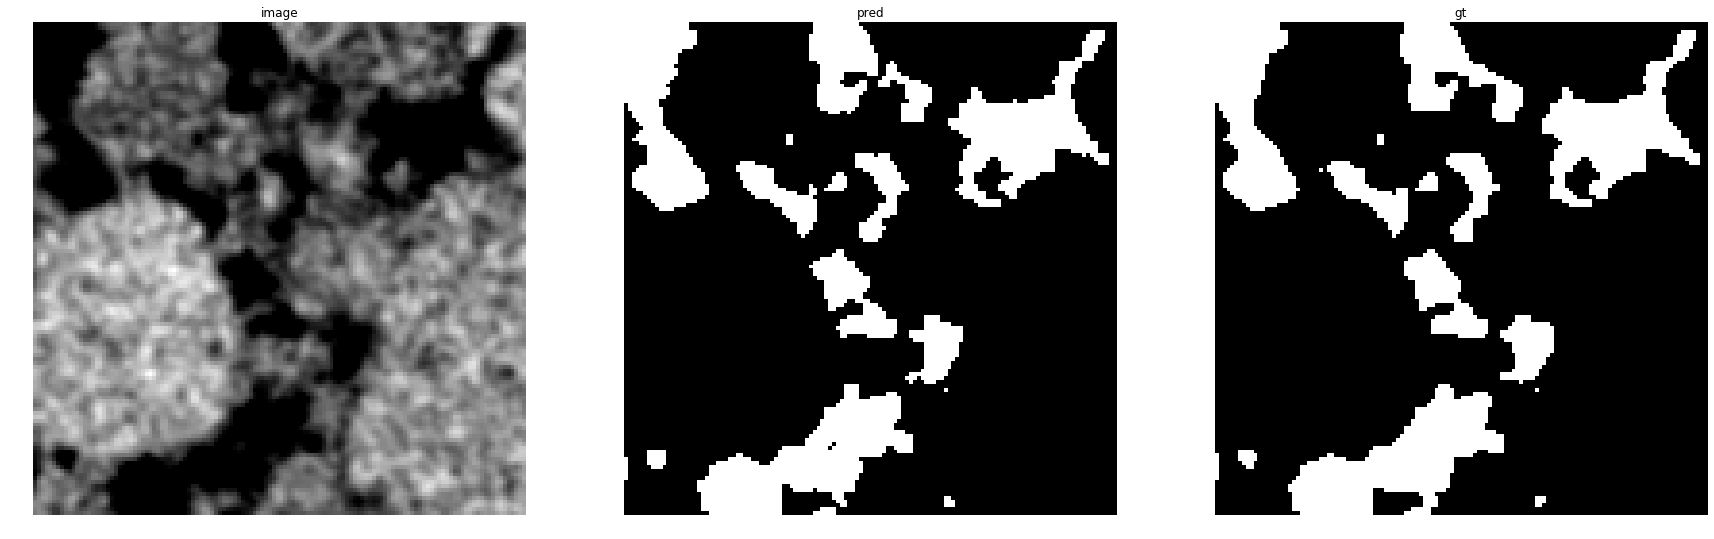

accuracy    : 0.98876953125
precision   : 0.9826979472140762
recall      : 0.9640391254315305
f1          : 0.9732791170490851
pr_auc      : 0.9980368786119326
iou         : 0.947949080622348


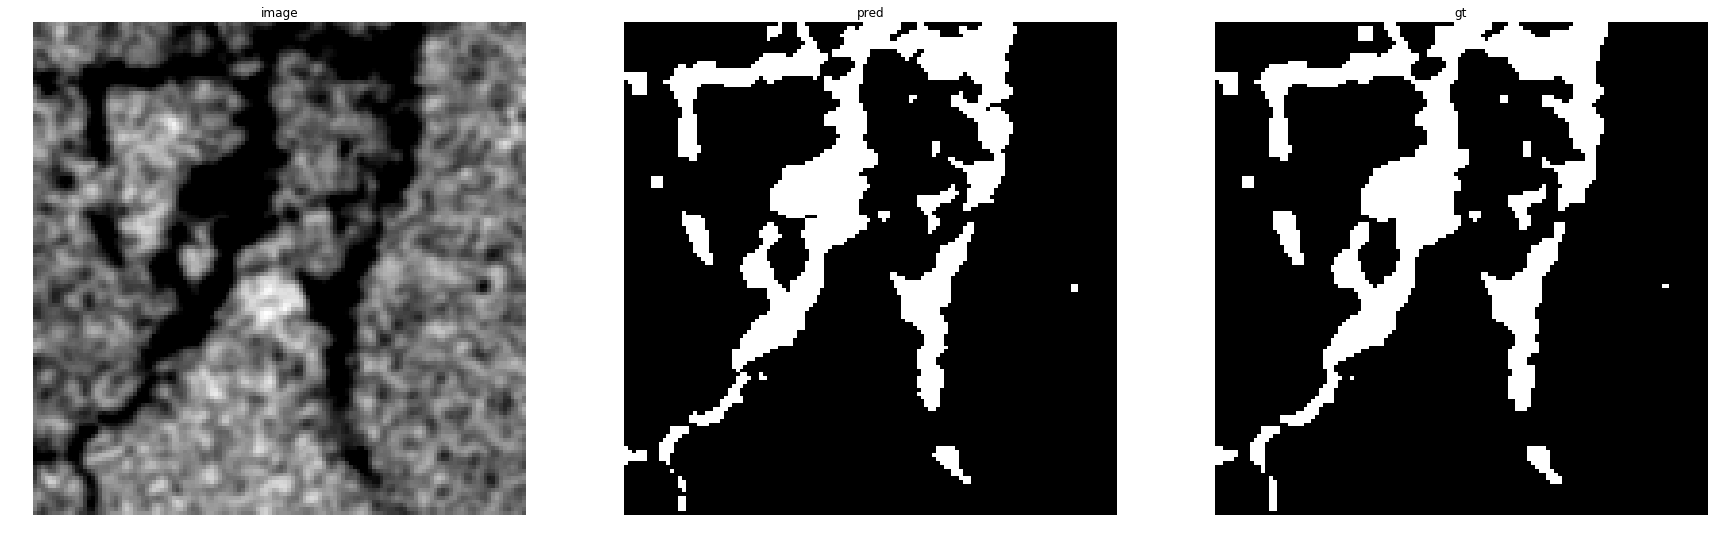

accuracy    : 0.9881591796875
precision   : 0.9852372583479789
recall      : 0.9485617597292724
f1          : 0.9665517241379311
pr_auc      : 0.9972288341184918
iou         : 0.9352686019352686


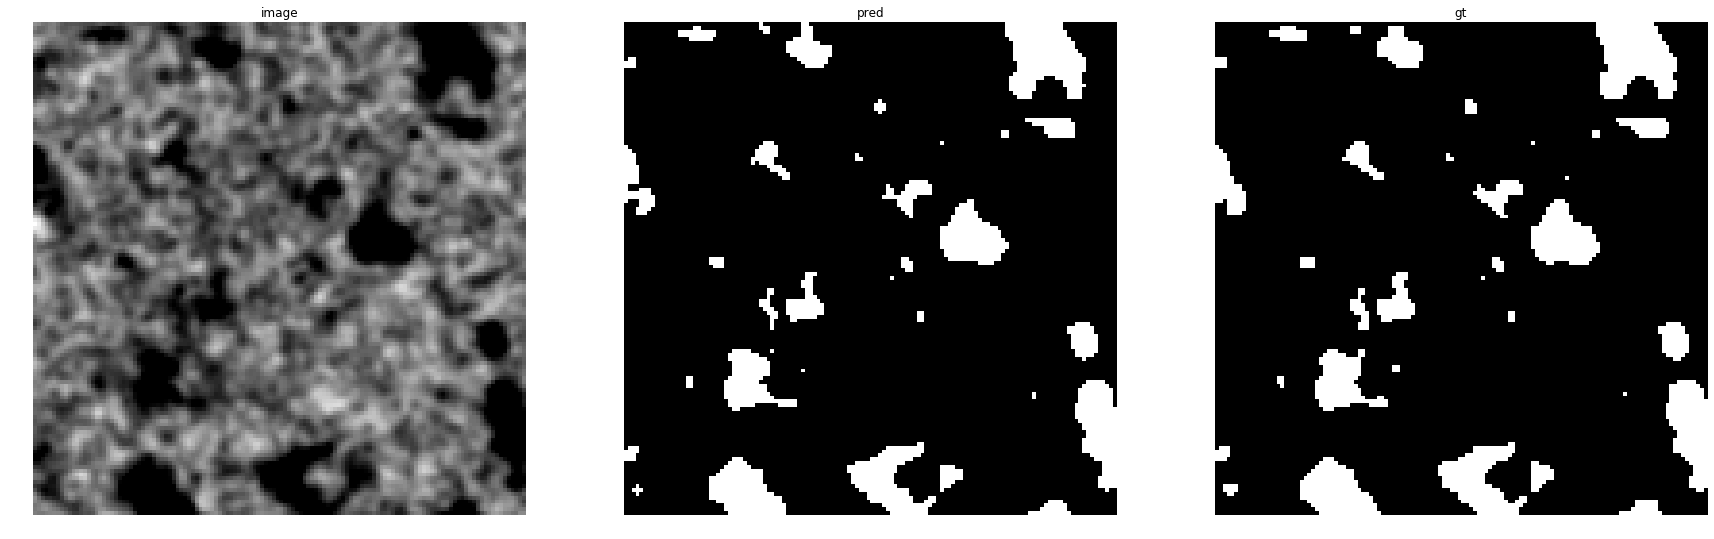

accuracy    : 0.990234375
precision   : 0.9936642027455121
recall      : 0.9270935960591133
f1          : 0.9592252803261977
pr_auc      : 0.9966333793649487
iou         : 0.921645445641528


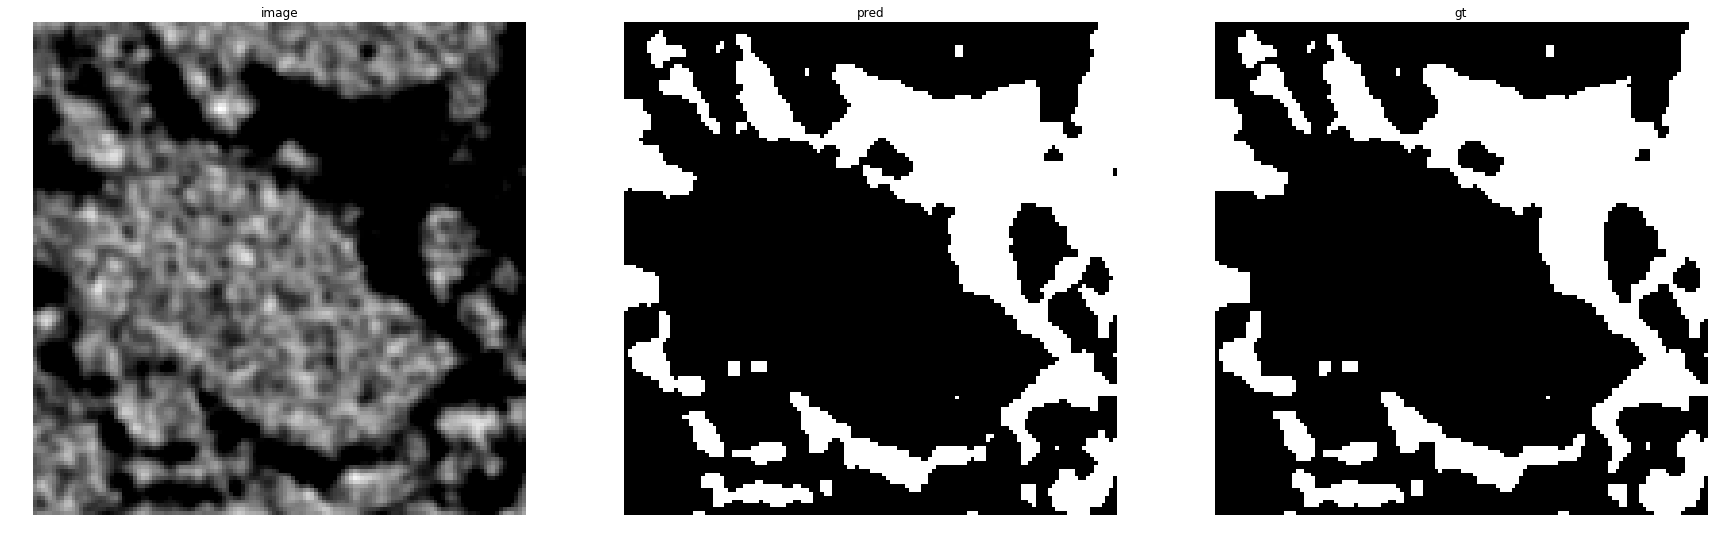

accuracy    : 0.98211669921875
precision   : 0.9974170474865885
recall      : 0.9471698113207547
f1          : 0.9716442465885997
pr_auc      : 0.9987782333409567
iou         : 0.9448522492000753


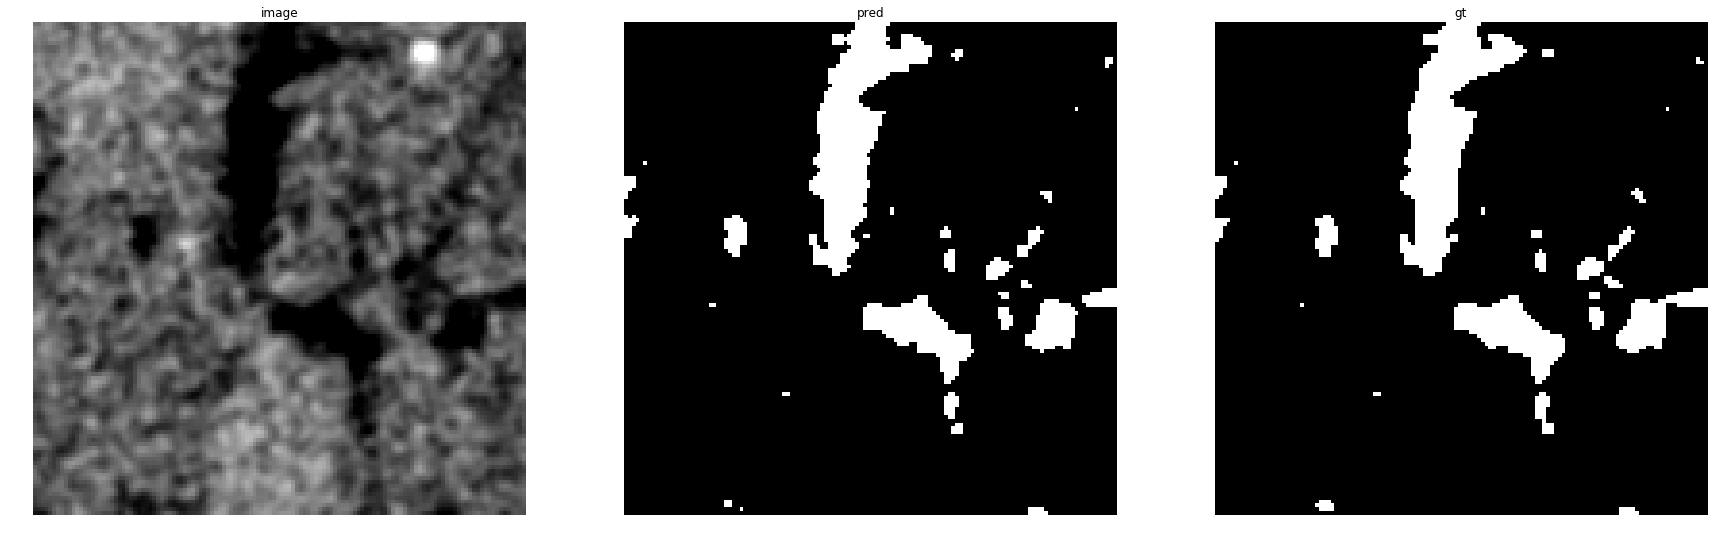

accuracy    : 0.99249267578125
precision   : 0.9878903760356915
recall      : 0.9371221281741233
f1          : 0.9618367980142724
pr_auc      : 0.9959115446790421
iou         : 0.9264793783622236


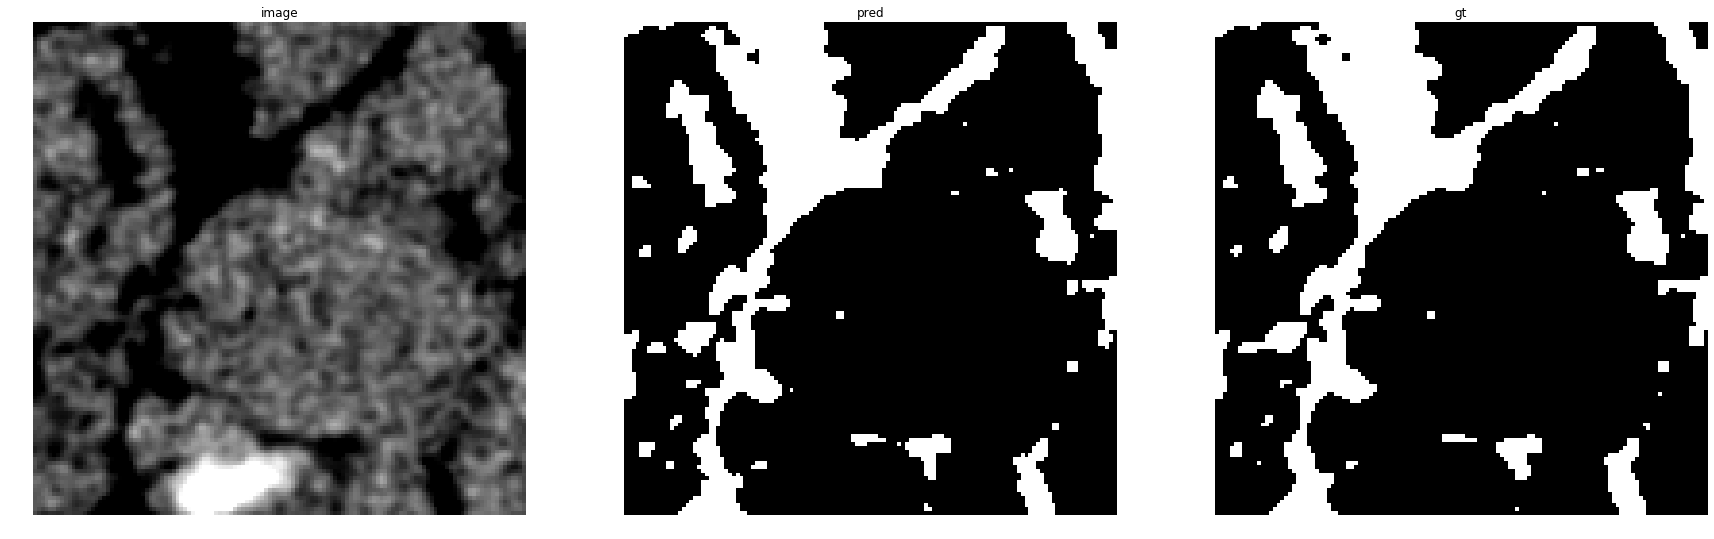

accuracy    : 0.9869384765625
precision   : 0.9838709677419355
recall      : 0.9577693557119653
f1          : 0.970644718792867
pr_auc      : 0.997656211541205
iou         : 0.9429637526652452
TiTree_subset2


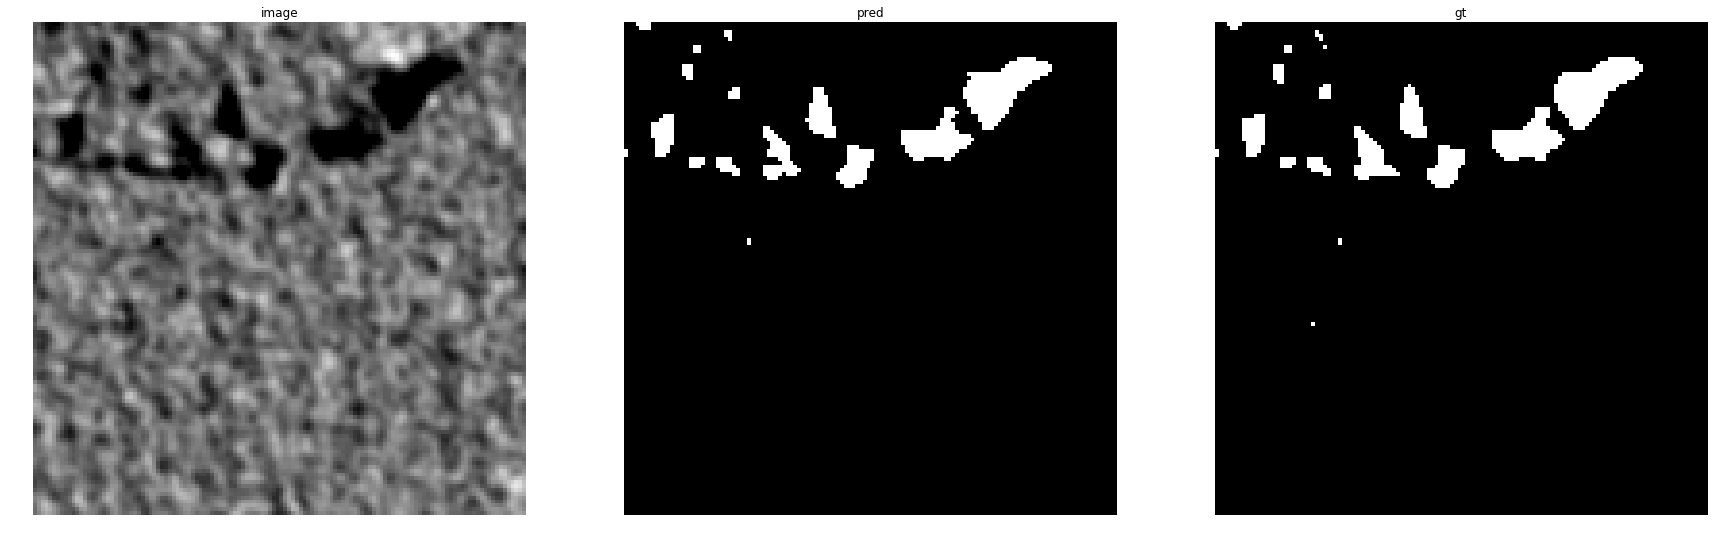

accuracy    : 0.99652099609375
precision   : 0.9941690962099126
recall      : 0.927891156462585
f1          : 0.9598874032371568
pr_auc      : 0.9943634201211569
iou         : 0.9228687415426252


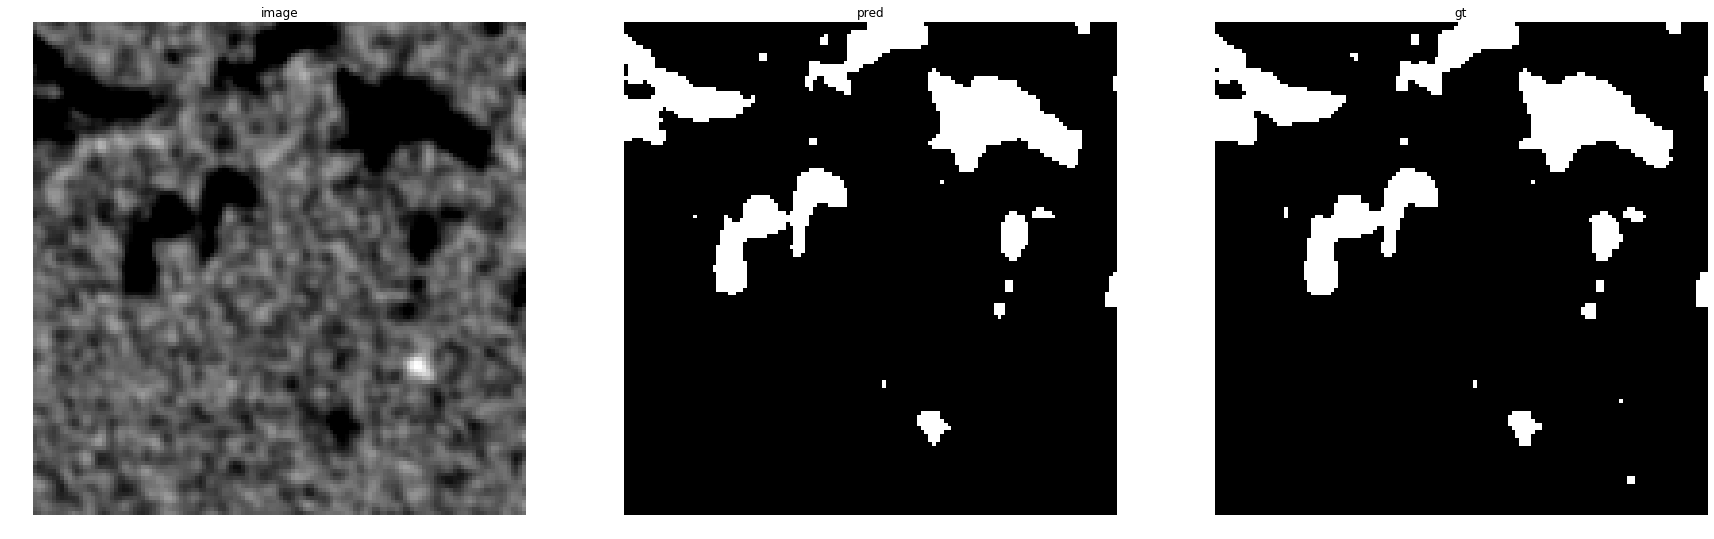

accuracy    : 0.99151611328125
precision   : 0.996195652173913
recall      : 0.932824427480916
f1          : 0.9634691195795007
pr_auc      : 0.9971743232326855
iou         : 0.9295131845841785


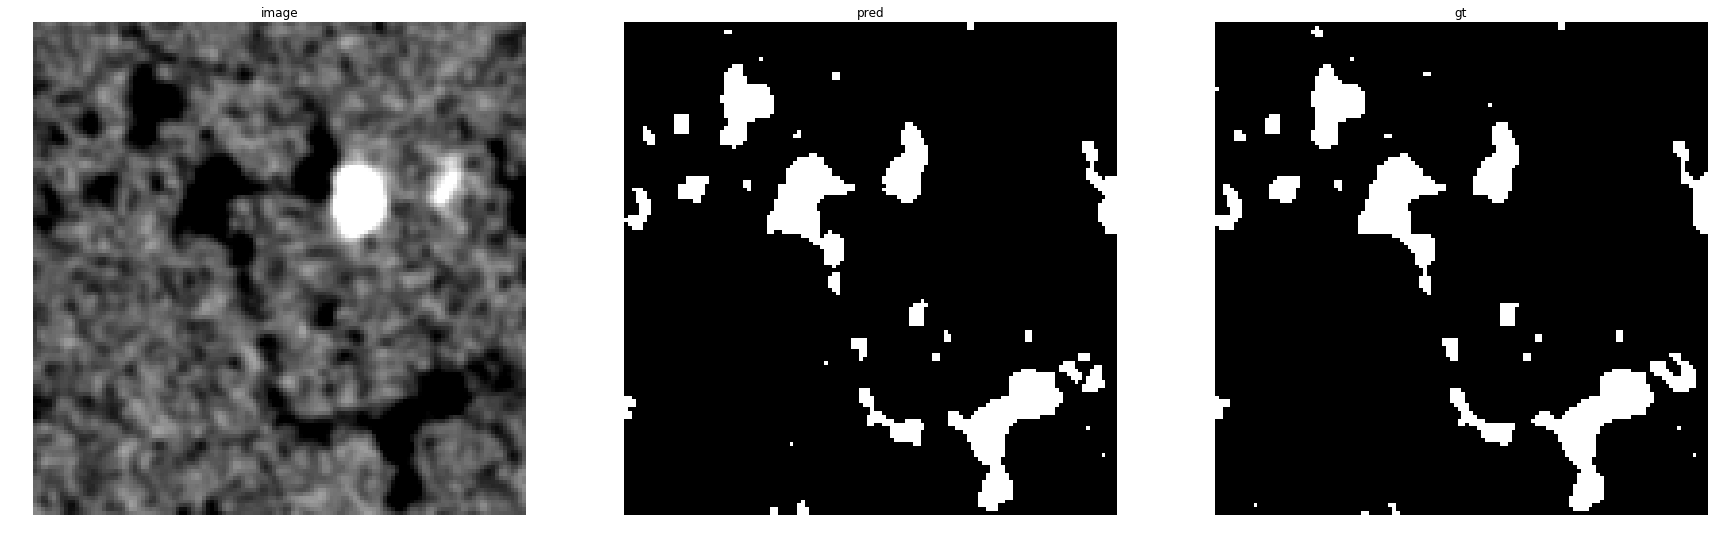

accuracy    : 0.99188232421875
precision   : 0.9676567656765677
recall      : 0.9458064516129032
f1          : 0.9566068515497552
pr_auc      : 0.9945730340775105
iou         : 0.9168230143839899


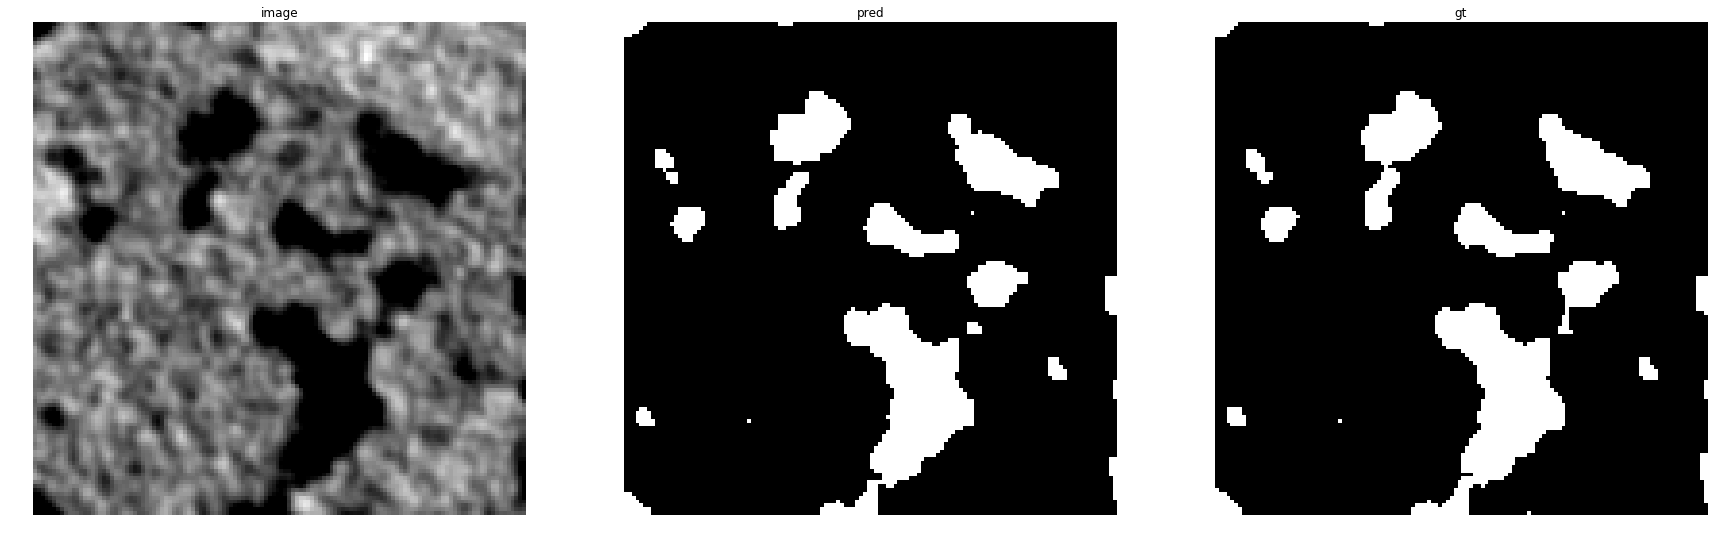

accuracy    : 0.9921875
precision   : 0.995274102079395
recall      : 0.9469424460431655
f1          : 0.9705069124423963
pr_auc      : 0.9981856797355928
iou         : 0.9427036705461056


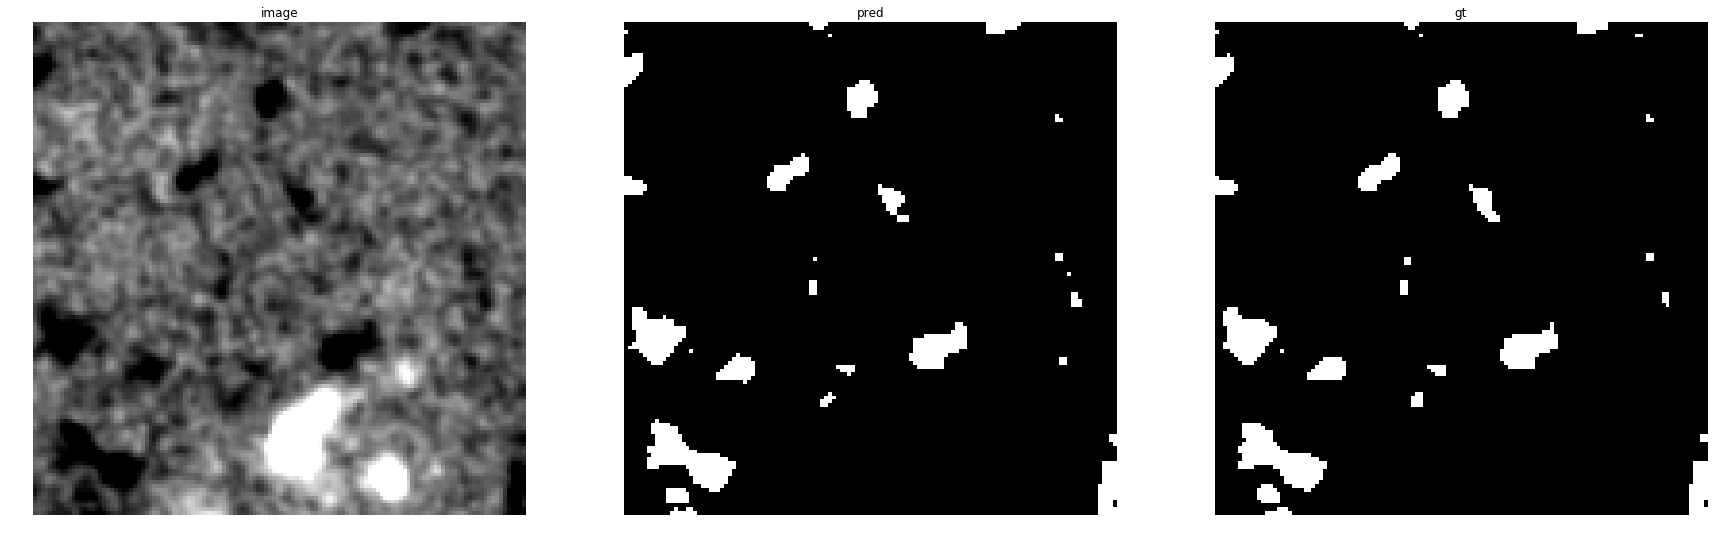

accuracy    : 0.99554443359375
precision   : 0.9580022701475596
recall      : 0.9590909090909091
f1          : 0.9585462805224304
pr_auc      : 0.9943252557248784
iou         : 0.920392584514722


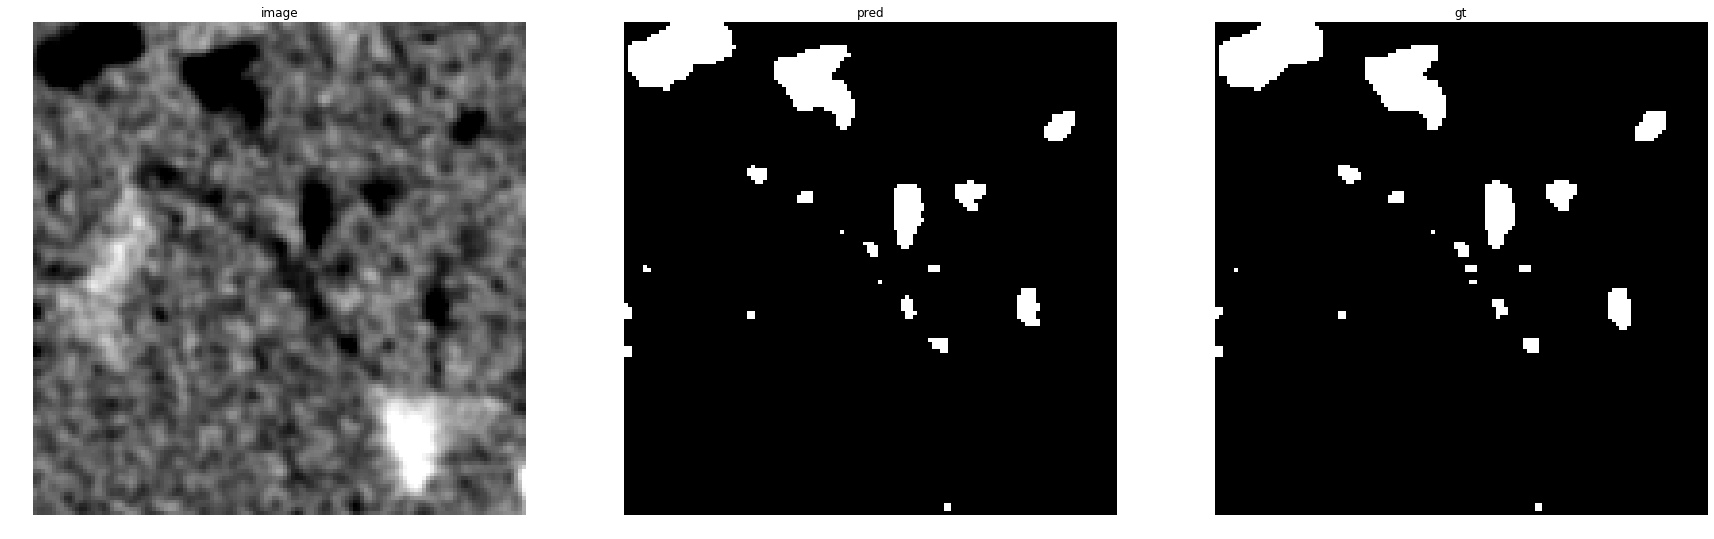

accuracy    : 0.99591064453125
precision   : 0.9894625922023182
recall      : 0.9427710843373494
f1          : 0.9655526992287918
pr_auc      : 0.9961291158542533
iou         : 0.9333996023856859


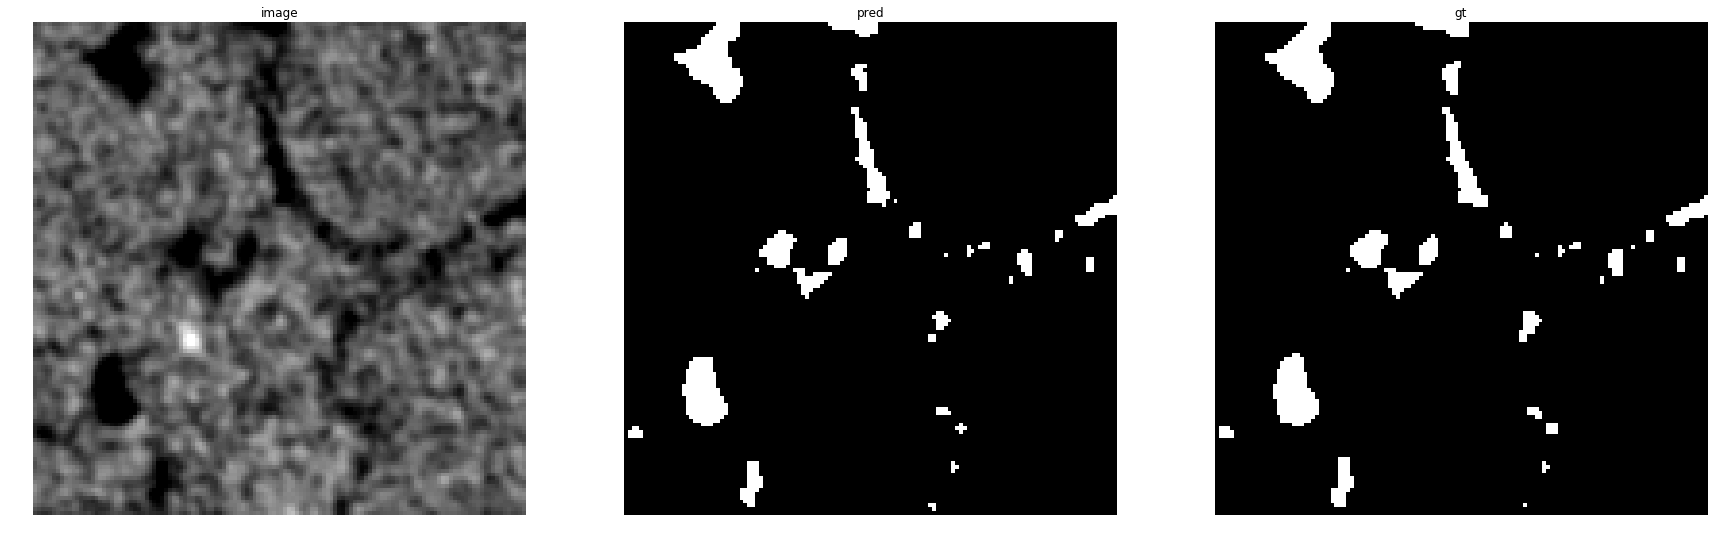

accuracy    : 0.99481201171875
precision   : 0.9938423645320197
recall      : 0.9098083427282976
f1          : 0.949970570924073
pr_auc      : 0.9943044141742227
iou         : 0.9047085201793722


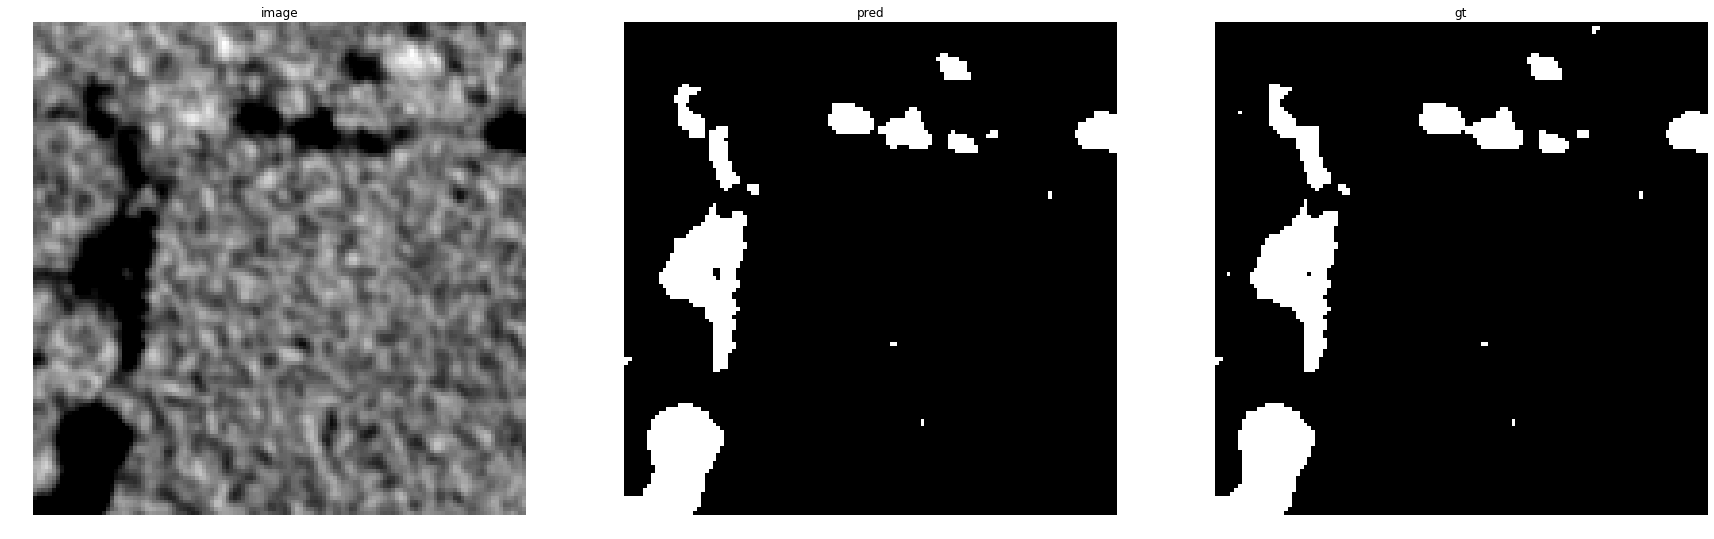

accuracy    : 0.9951171875
precision   : 0.9972789115646259
recall      : 0.9507133592736705
f1          : 0.9734395750332006
pr_auc      : 0.9978269395996403
iou         : 0.9482535575679172


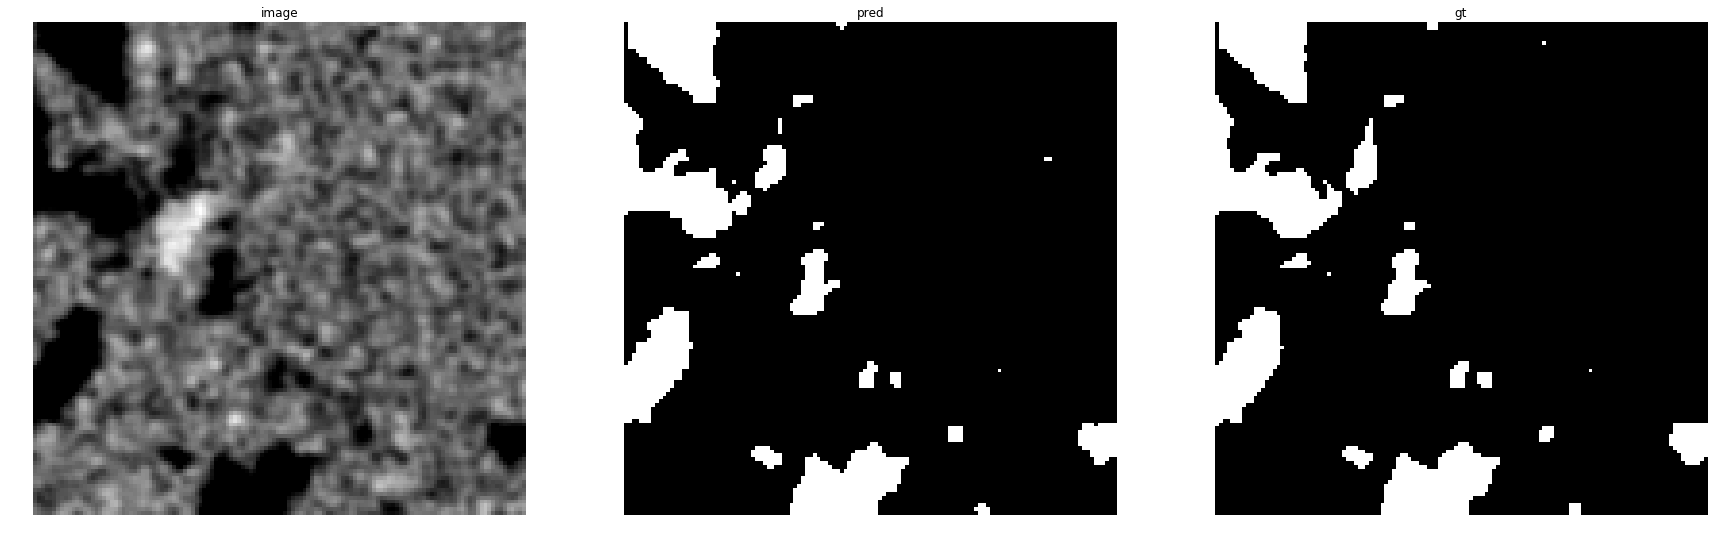

accuracy    : 0.9927978515625
precision   : 0.9875324675324675
recall      : 0.9528822055137844
f1          : 0.9698979591836734
pr_auc      : 0.9979350494797139
iou         : 0.9415552253590886


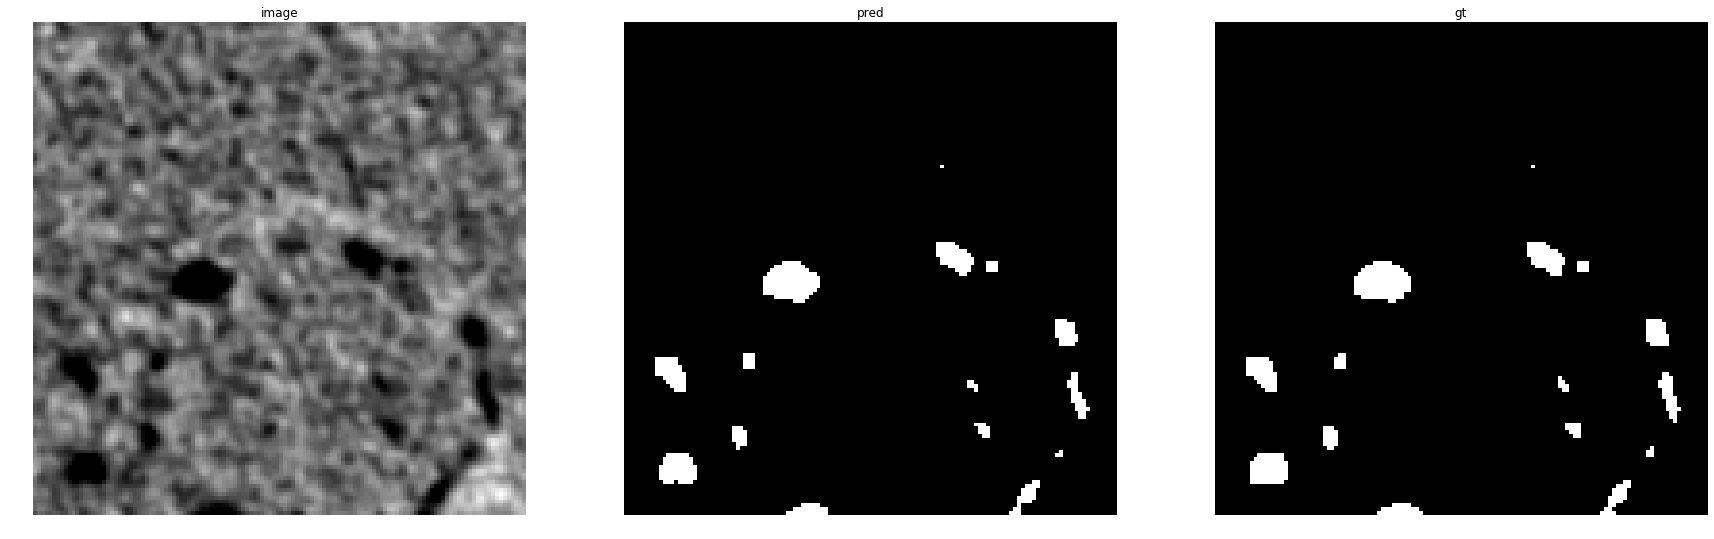

accuracy    : 0.99774169921875
precision   : 0.99375
recall      : 0.9334637964774951
f1          : 0.9626639757820383
pr_auc      : 0.9970527235103472
iou         : 0.9280155642023347
Urna_22


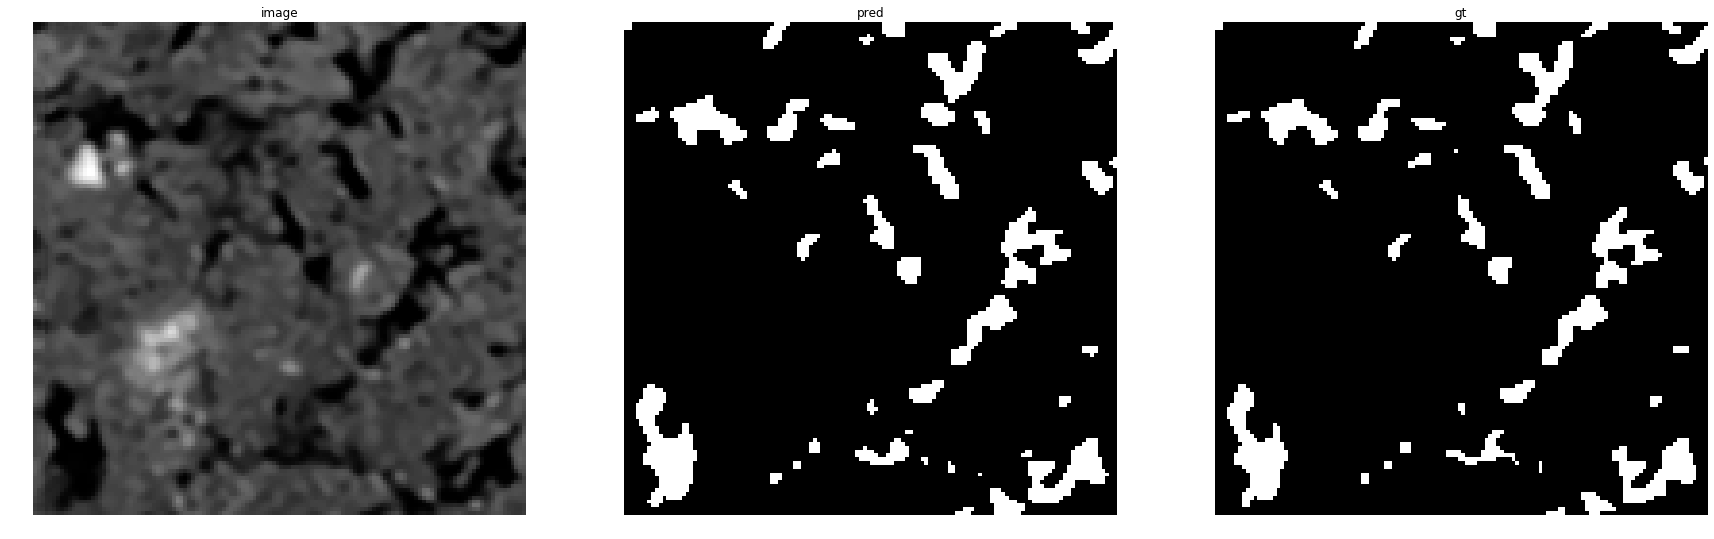

accuracy    : 0.98931884765625
precision   : 0.9187134502923977
recall      : 0.9775980087118855
f1          : 0.9472414832680133
pr_auc      : 0.9936110788978072
iou         : 0.8997709049255441


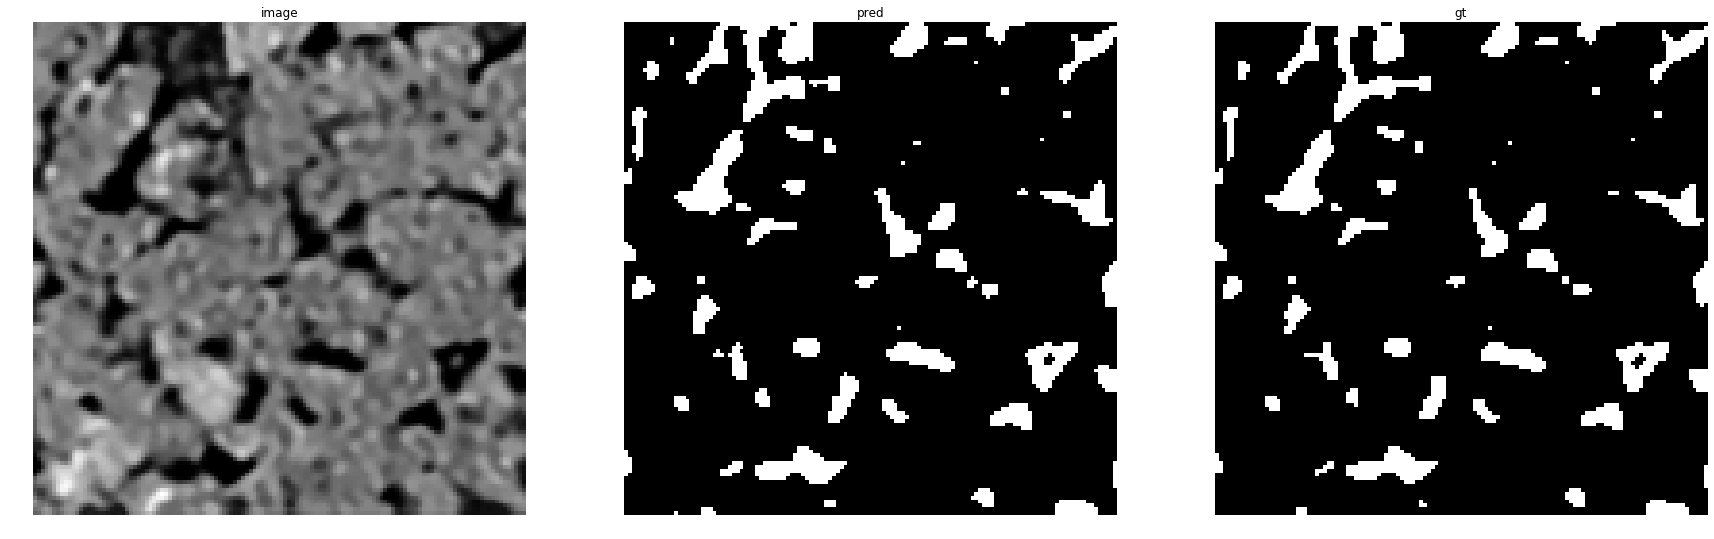

accuracy    : 0.98931884765625
precision   : 0.9206266318537859
recall      : 0.9871220604703248
f1          : 0.9527154823020805
pr_auc      : 0.995626870628854
iou         : 0.9097007223942208


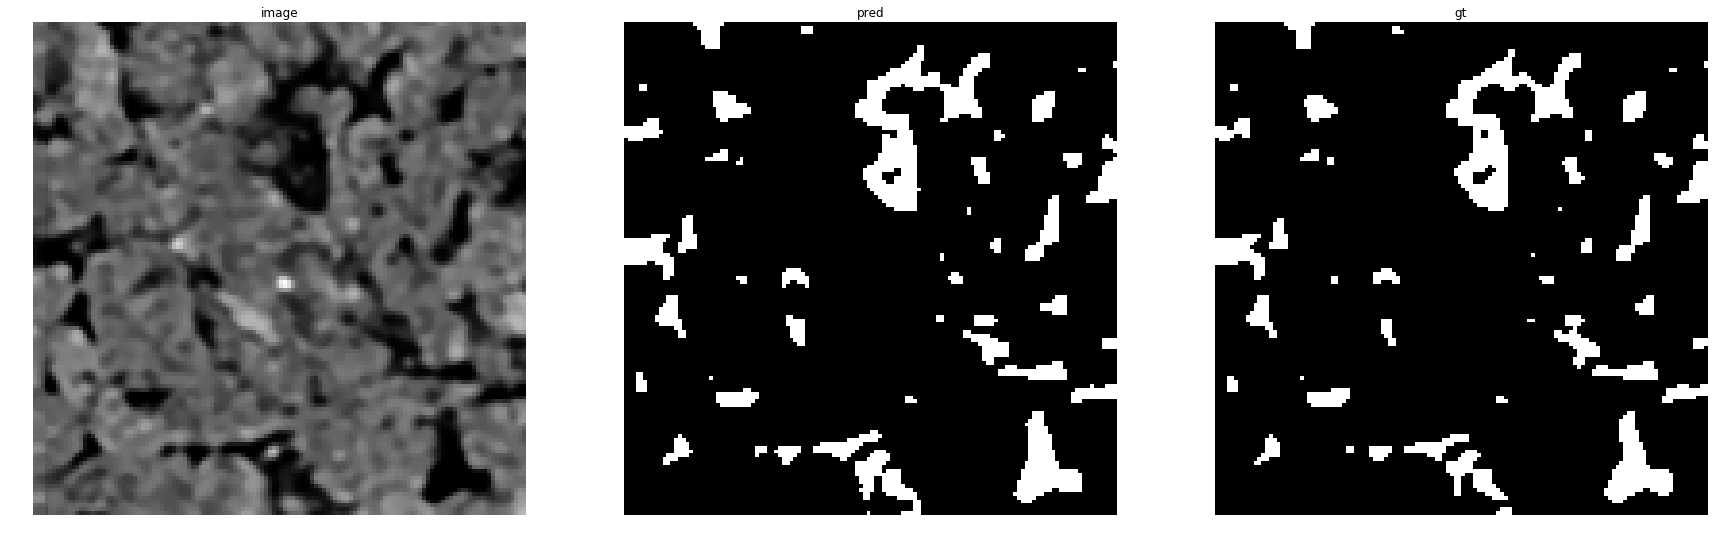

accuracy    : 0.987548828125
precision   : 0.9053833605220228
recall      : 0.9823008849557522
f1          : 0.9422750424448216
pr_auc      : 0.9942960223375568
iou         : 0.8908507223113965


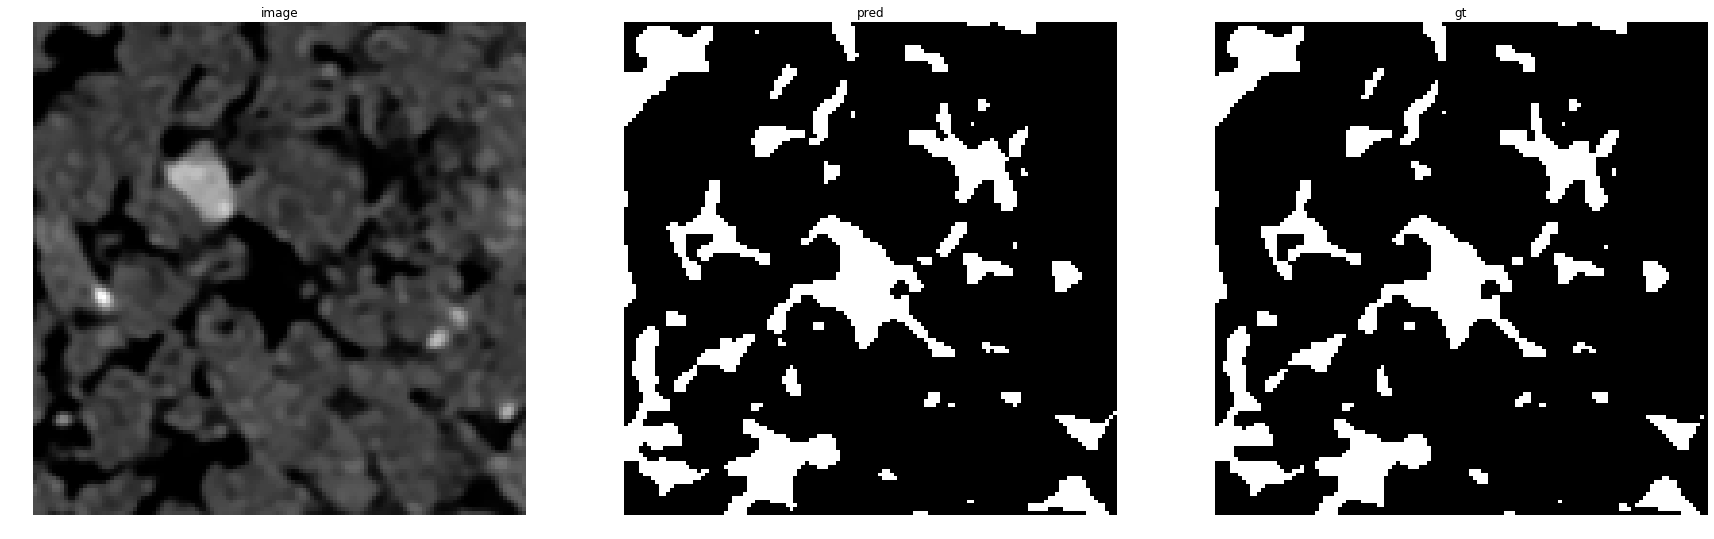

accuracy    : 0.98736572265625
precision   : 0.938719616569668
recall      : 0.9898916967509025
f1          : 0.9636267791249341
pr_auc      : 0.997857018379307
iou         : 0.9298067141403866


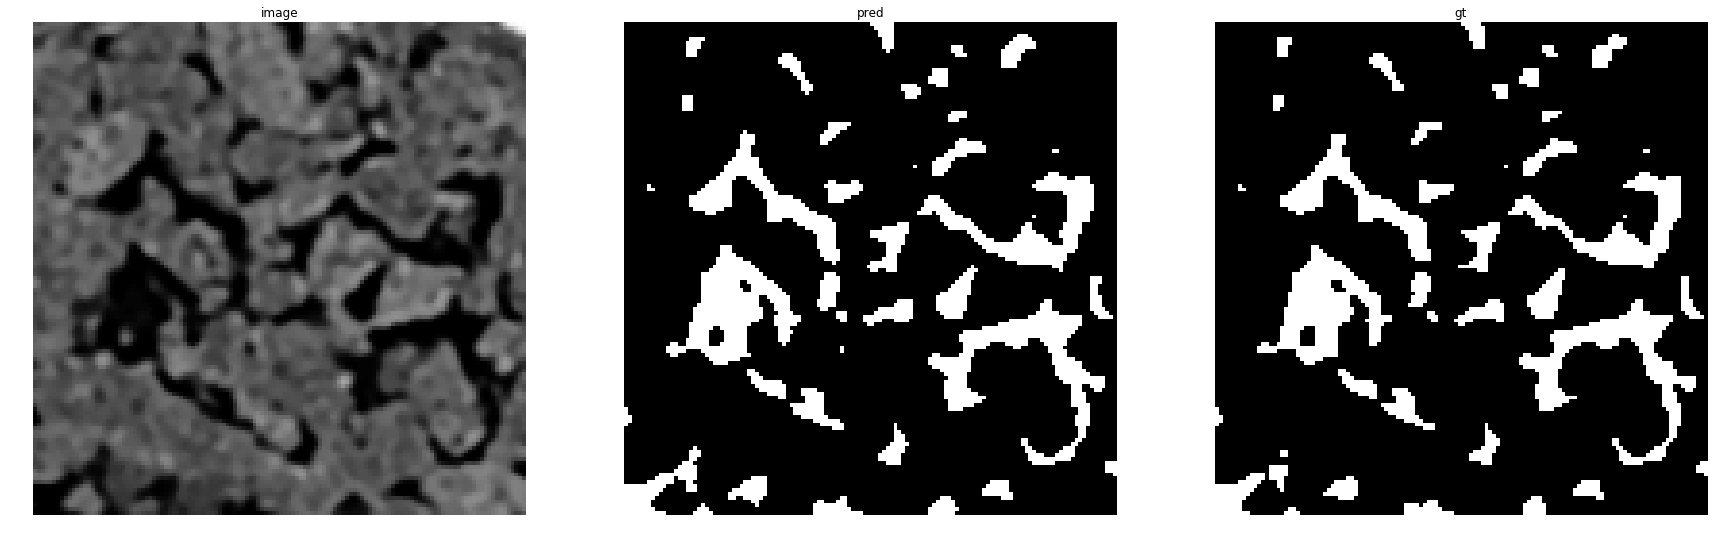

accuracy    : 0.988037109375
precision   : 0.9333580155497964
recall      : 0.9936933385888845
f1          : 0.9625811378388698
pr_auc      : 0.9978350610286094
iou         : 0.9278616120721384


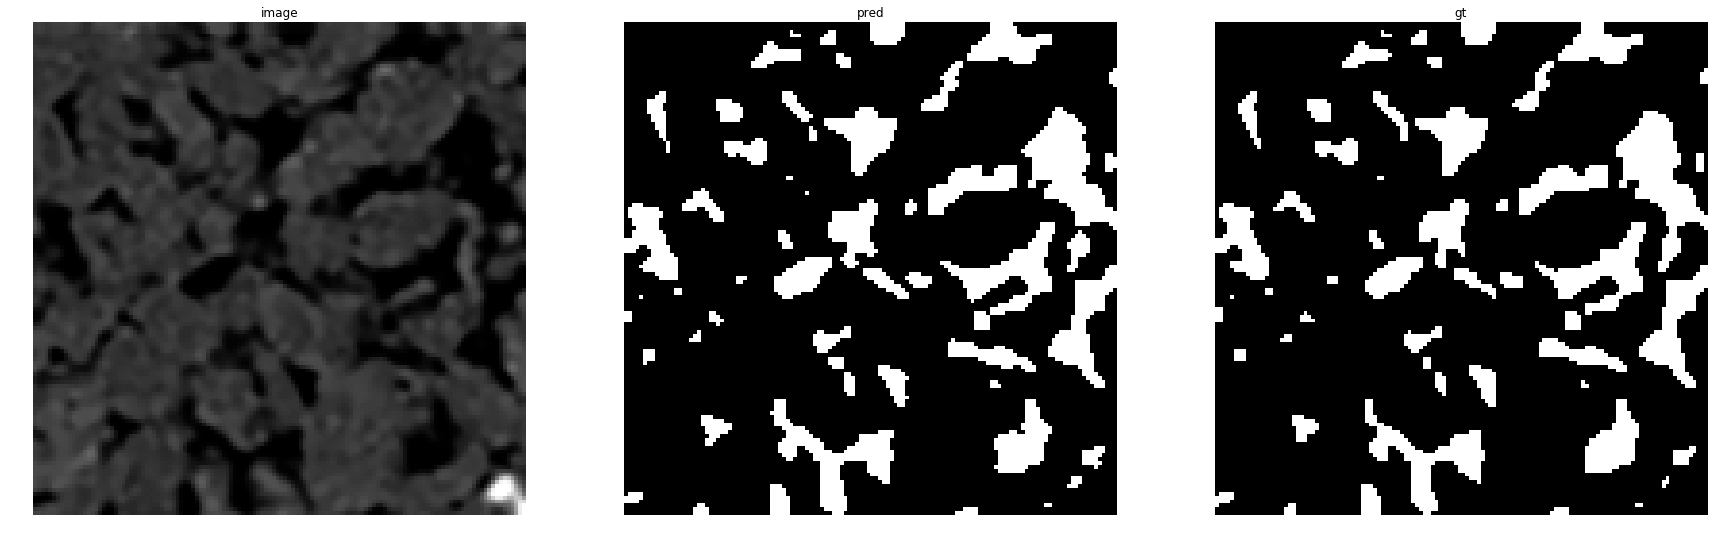

accuracy    : 0.9864501953125
precision   : 0.9441053646000642
recall      : 0.98393036491463
f1          : 0.9636065573770491
pr_auc      : 0.9966761007634305
iou         : 0.9297690604239165


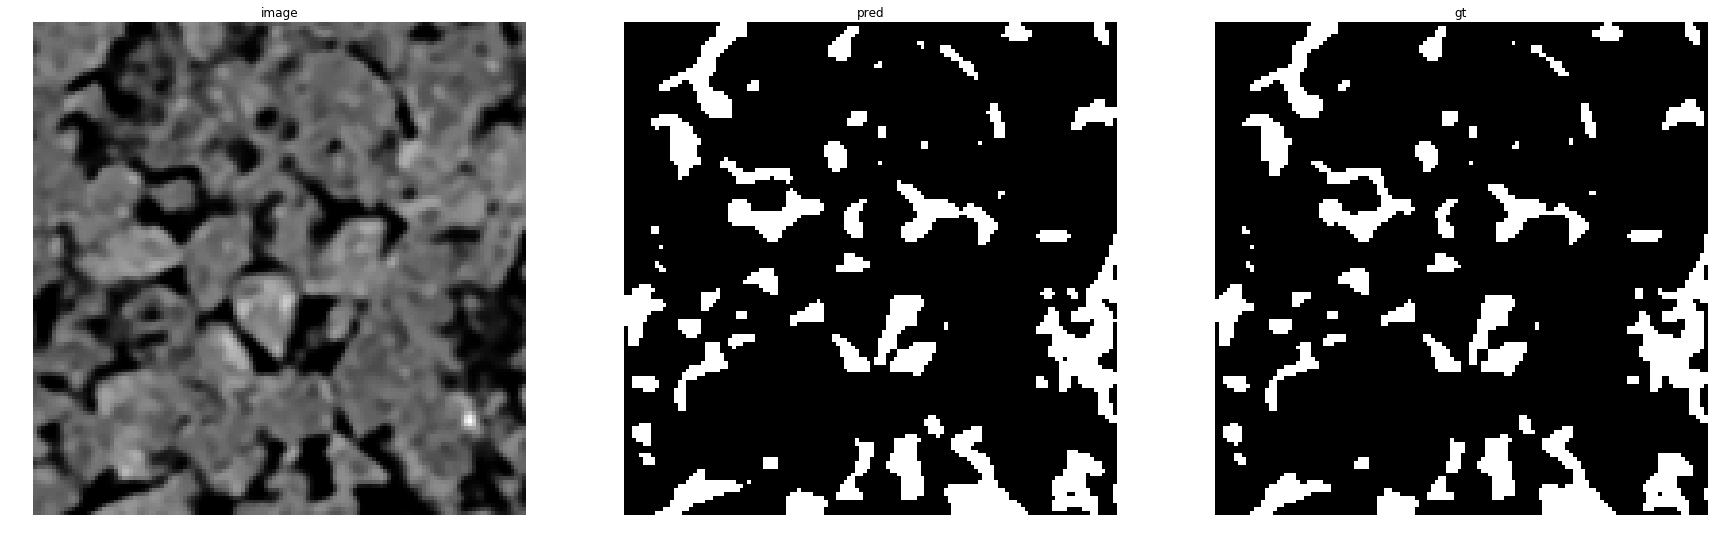

accuracy    : 0.98394775390625
precision   : 0.9154727793696275
recall      : 0.9895470383275261
f1          : 0.9510697674418604
pr_auc      : 0.995311783082267
iou         : 0.906704505143668


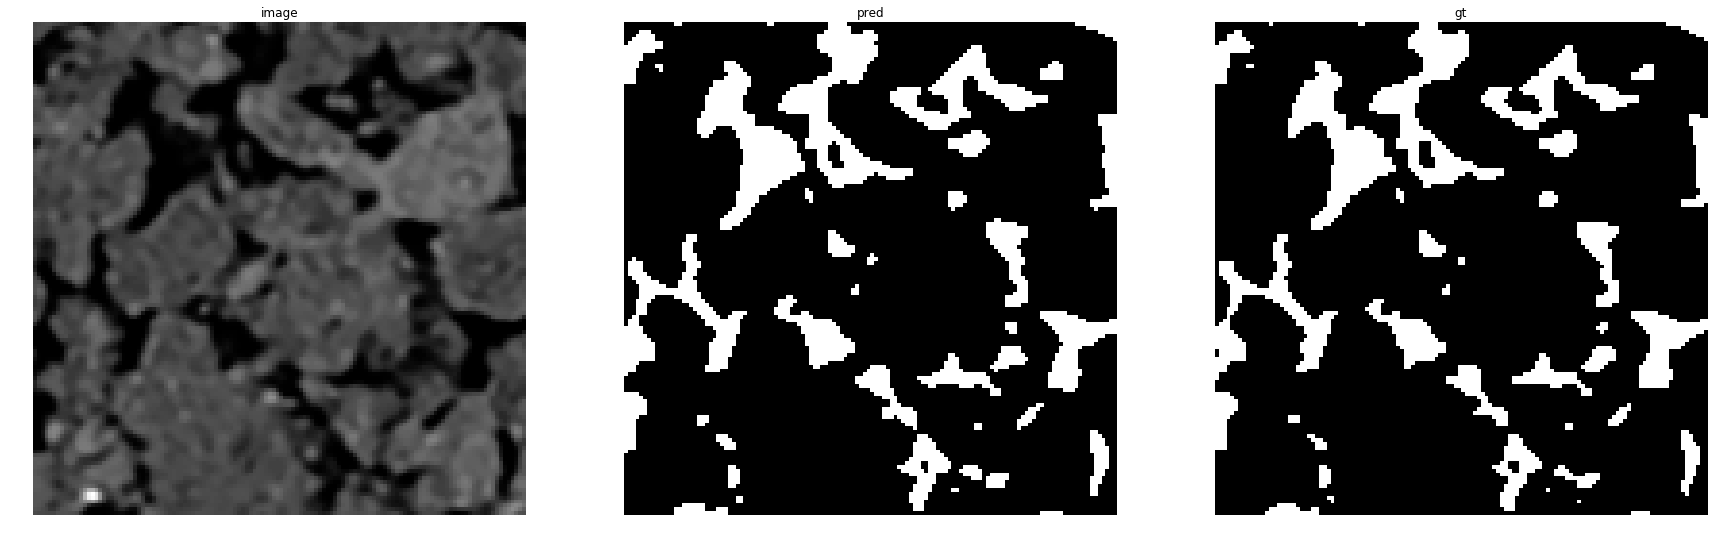

accuracy    : 0.9862060546875
precision   : 0.9325805380272335
recall      : 0.9918756623101378
f1          : 0.9613146182814105
pr_auc      : 0.9972614584371784
iou         : 0.9255108767303889


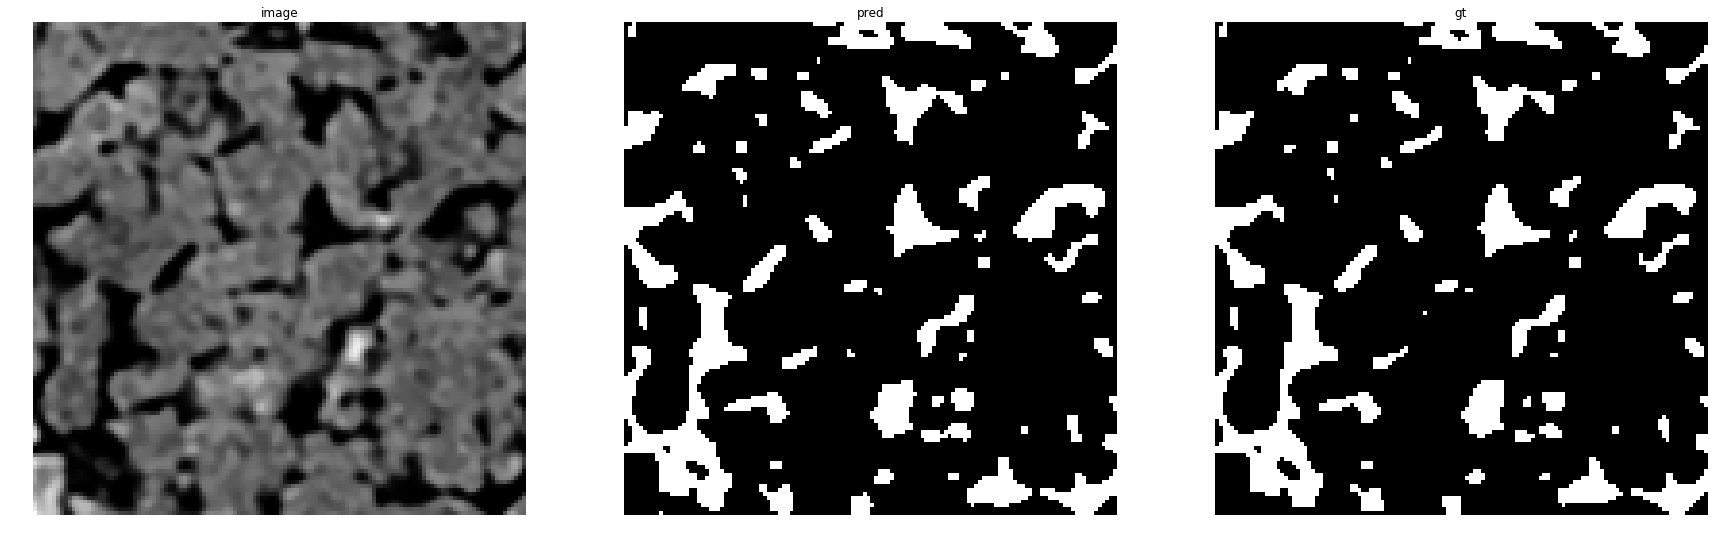

accuracy    : 0.987548828125
precision   : 0.936008301625735
recall      : 0.9930275229357798
f1          : 0.9636752136752136
pr_auc      : 0.9980541366469702
iou         : 0.9298969072164949


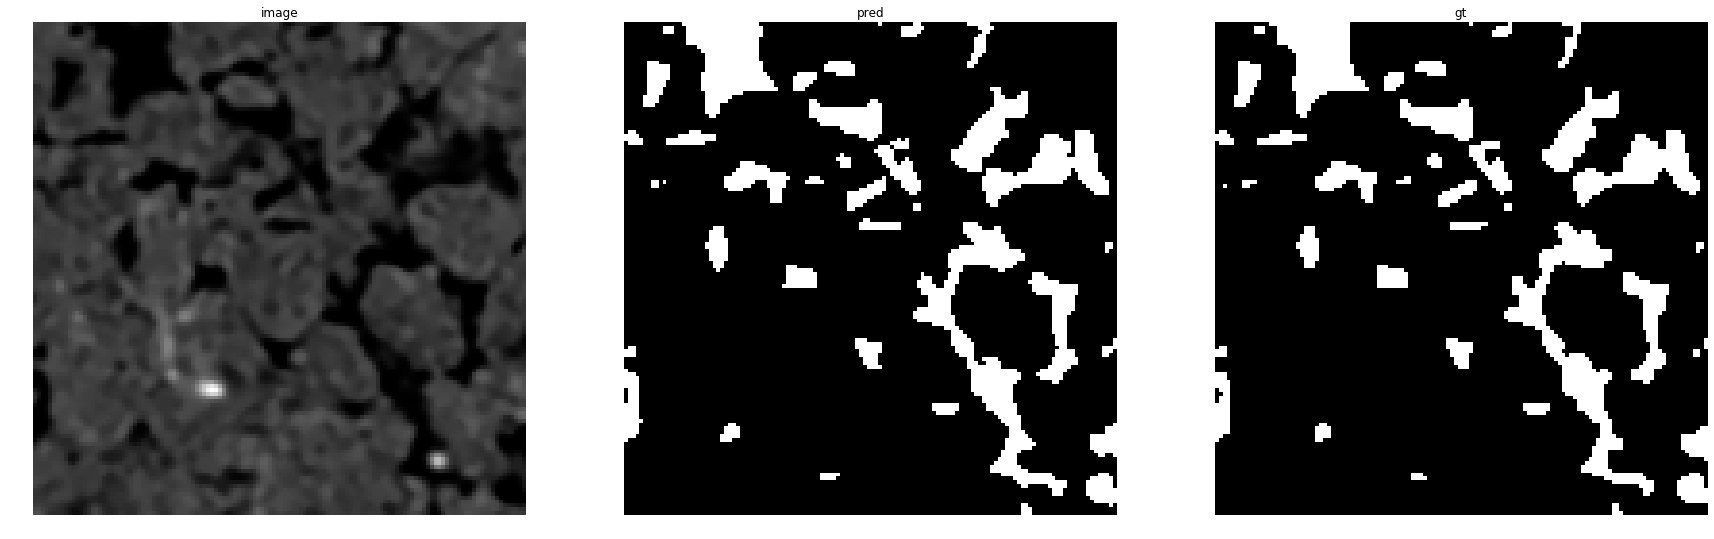

accuracy    : 0.9896240234375
precision   : 0.944006309148265
recall      : 0.9884393063583815
f1          : 0.9657119806373538
pr_auc      : 0.9973244894764707
iou         : 0.9336973478939158
Urna_30


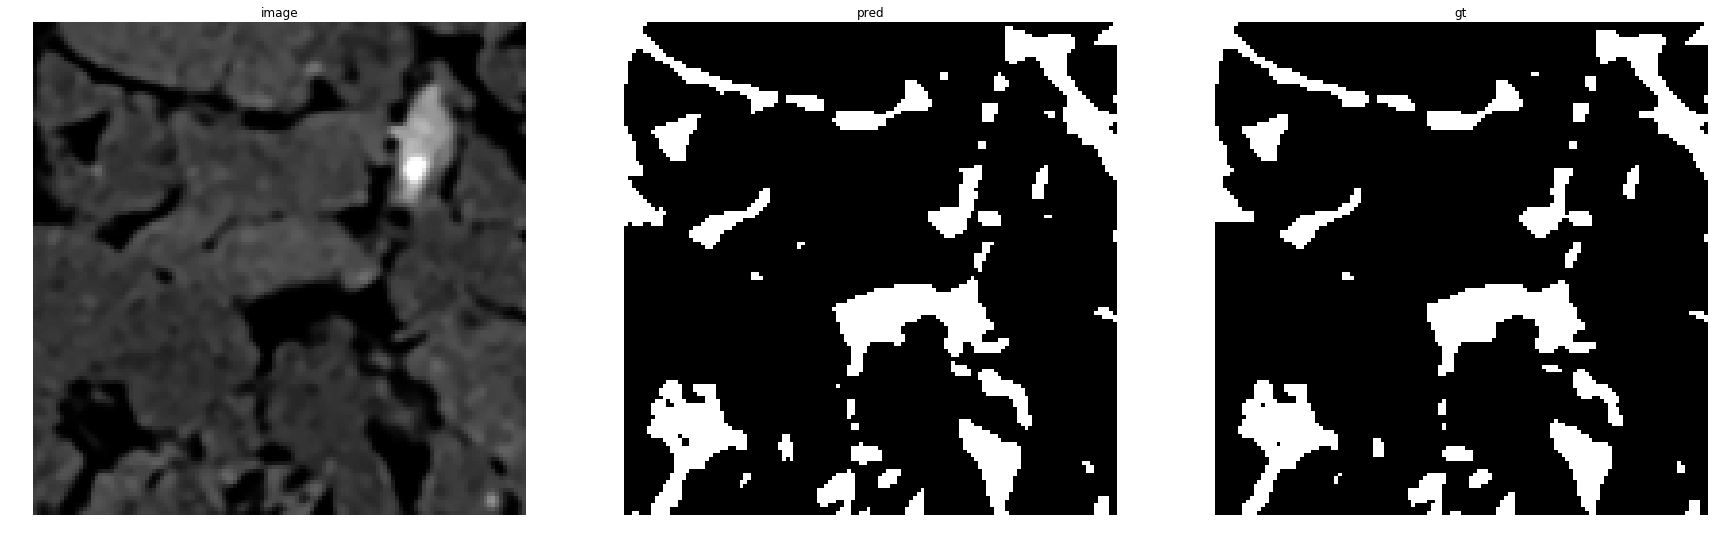

accuracy    : 0.98699951171875
precision   : 0.933603836222796
recall      : 0.9871294851794071
f1          : 0.9596208530805687
pr_auc      : 0.9971197670780405
iou         : 0.9223760932944607


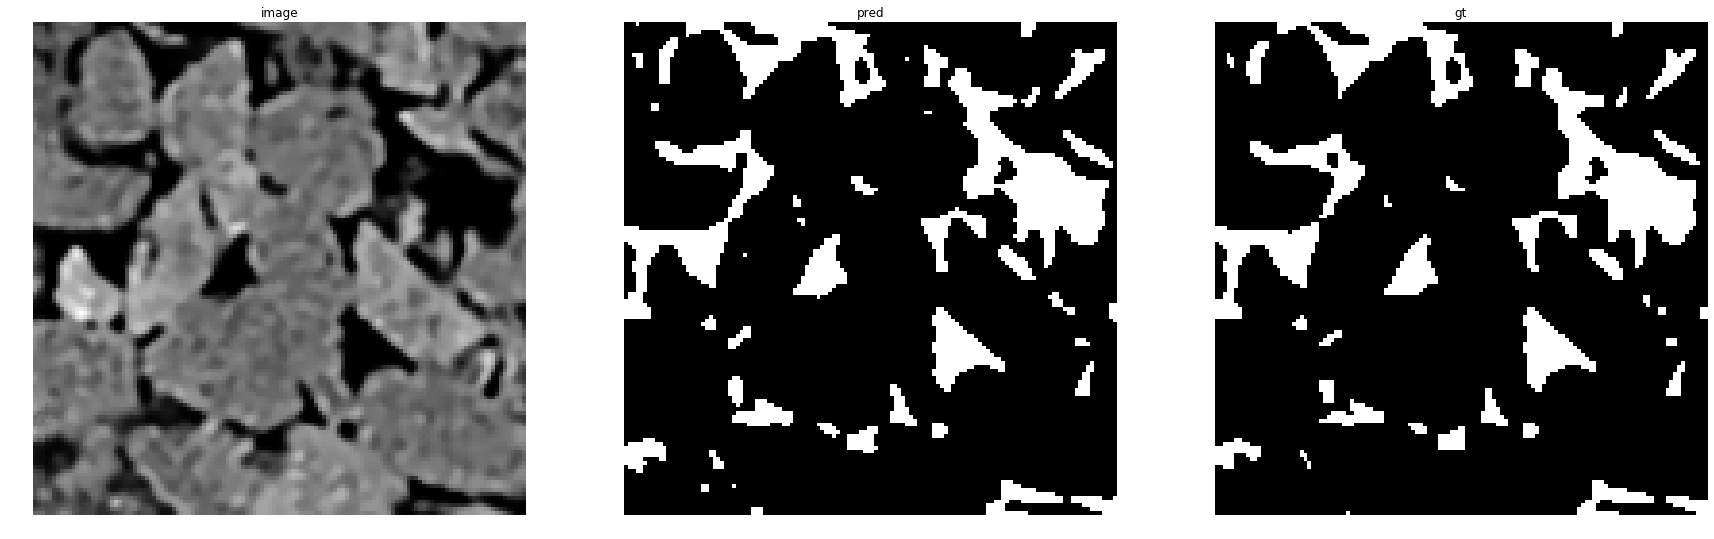

accuracy    : 0.98516845703125
precision   : 0.9234234234234234
recall      : 0.9918124302195758
f1          : 0.9563969136910103
pr_auc      : 0.9970233451066628
iou         : 0.9164374140302614


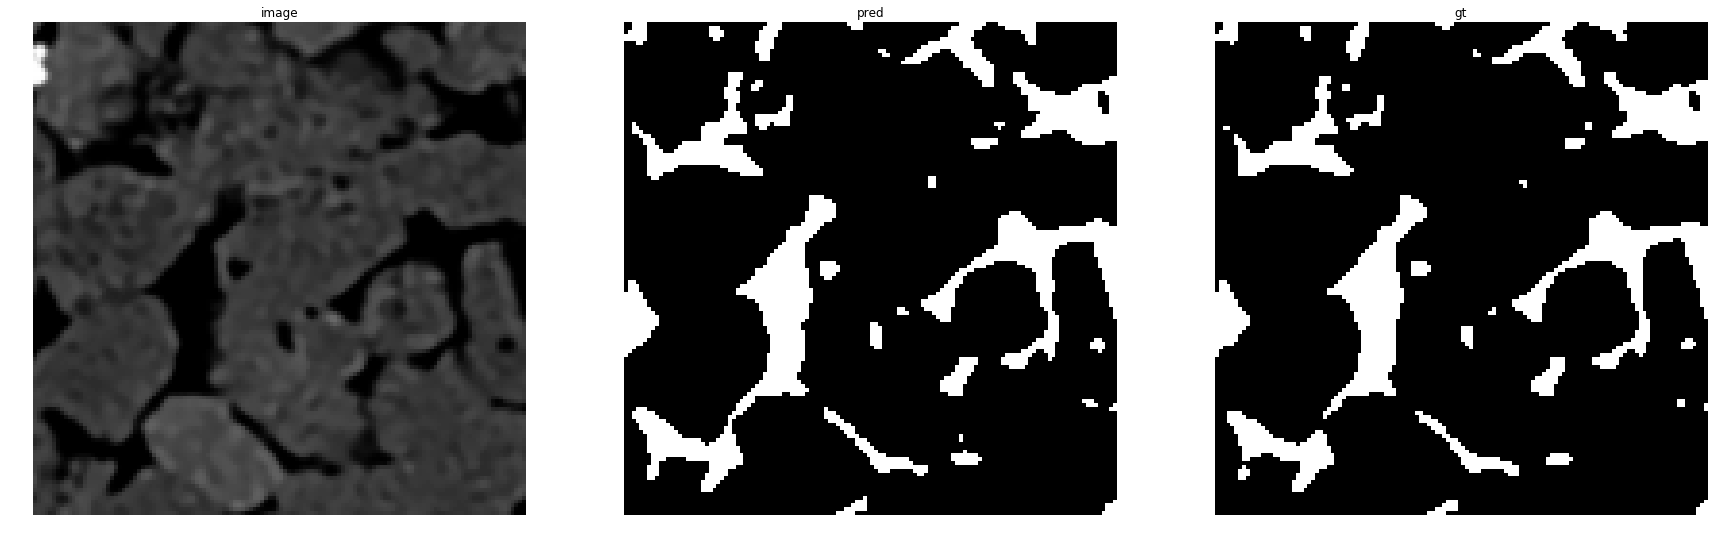

accuracy    : 0.988525390625
precision   : 0.9376408715251691
recall      : 0.9912629070691025
f1          : 0.9637065637065637
pr_auc      : 0.9973585698027699
iou         : 0.9299552906110283


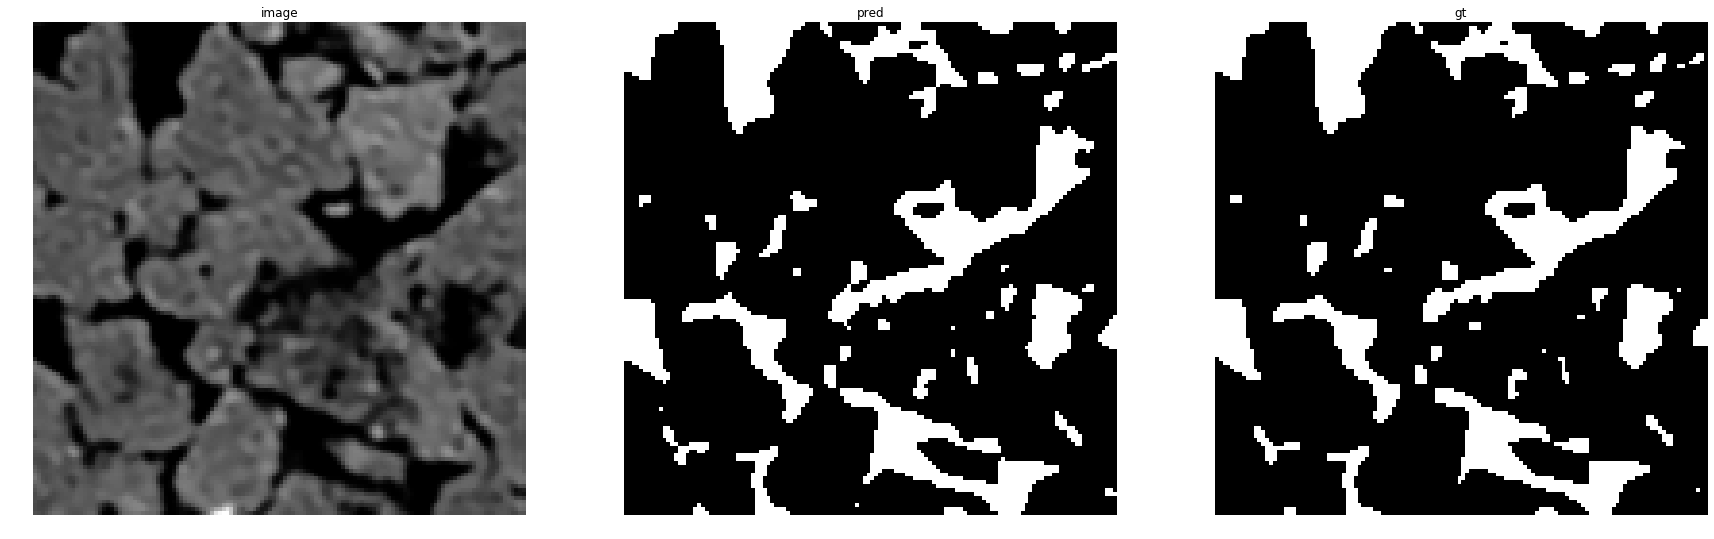

accuracy    : 0.98486328125
precision   : 0.9367695534911598
recall      : 0.9883022447043945
f1          : 0.9618461538461538
pr_auc      : 0.9971861332008247
iou         : 0.9264967397747481


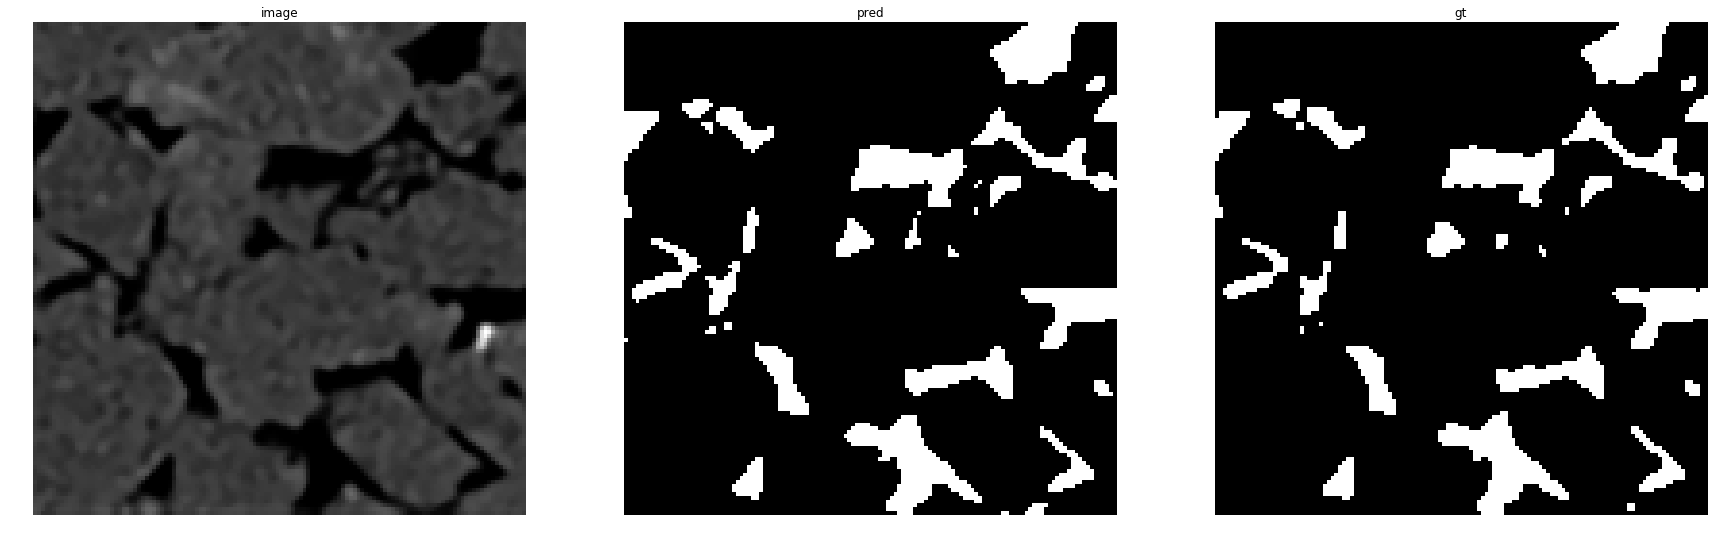

accuracy    : 0.98992919921875
precision   : 0.9396551724137931
recall      : 0.9886621315192744
f1          : 0.9635359116022101
pr_auc      : 0.9975032925198014
iou         : 0.929637526652452


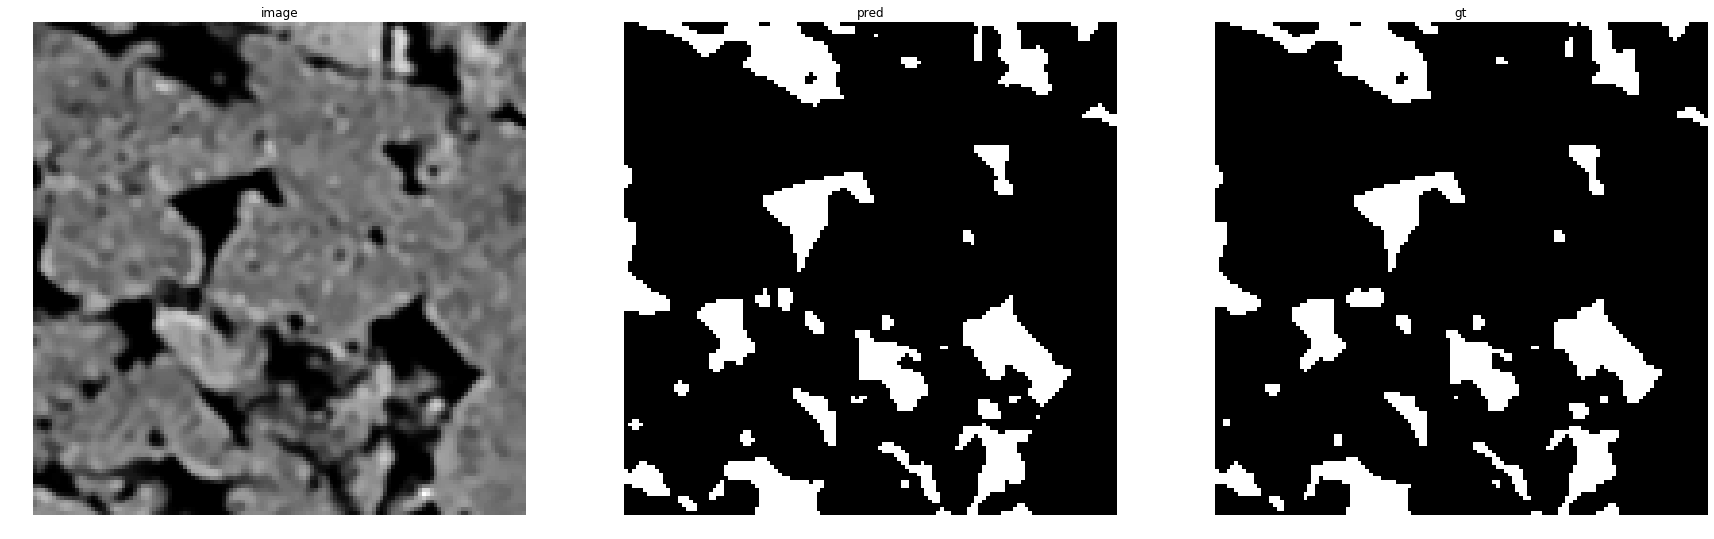

accuracy    : 0.9859619140625
precision   : 0.9261029411764706
recall      : 0.9886185243328101
f1          : 0.9563401670463175
pr_auc      : 0.9964166155039302
iou         : 0.9163332120771189


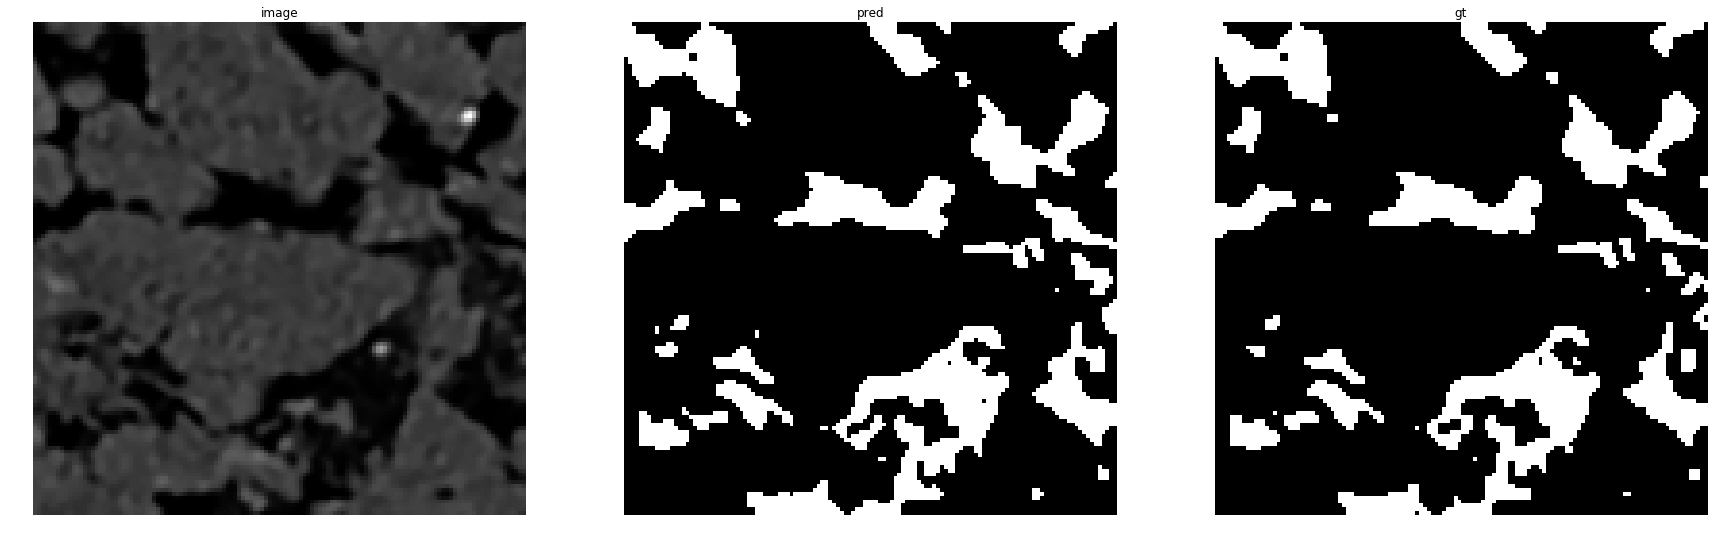

accuracy    : 0.9830322265625
precision   : 0.9349985807550383
recall      : 0.9853425067304816
f1          : 0.9595106321002039
pr_auc      : 0.996287406964645
iou         : 0.9221724524076148


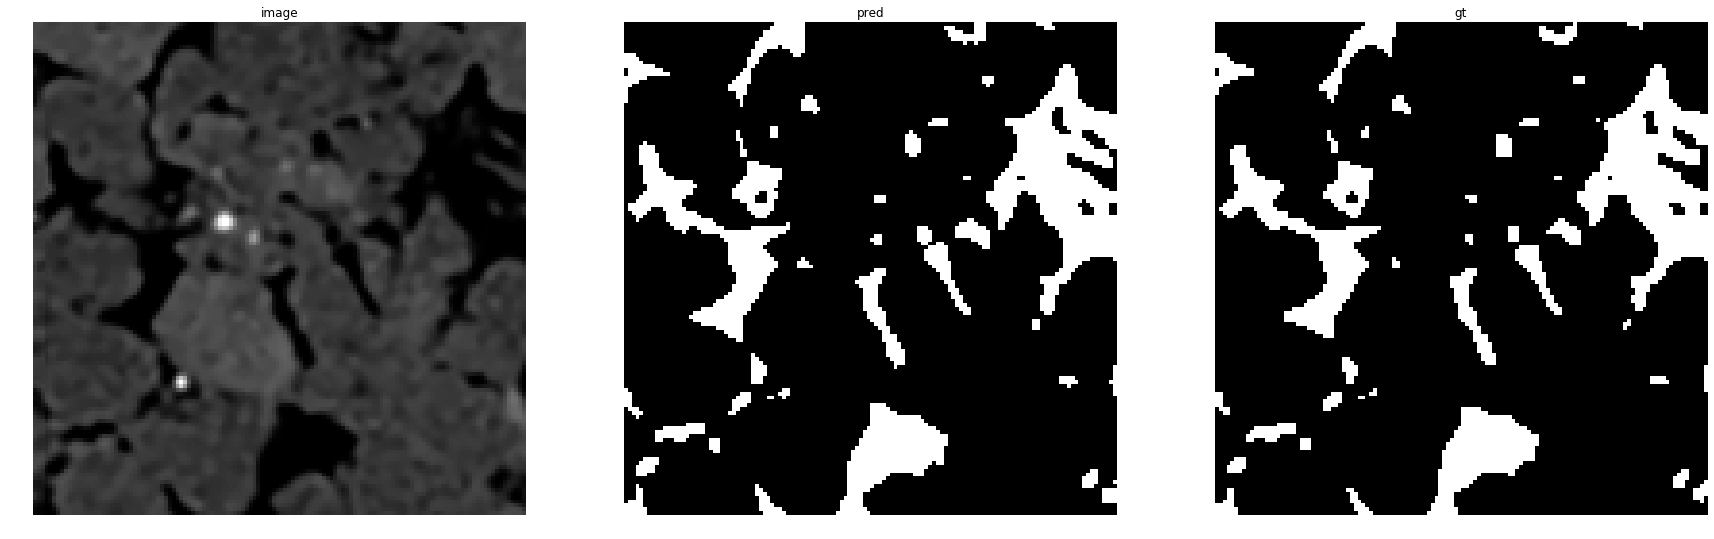

accuracy    : 0.98773193359375
precision   : 0.9394904458598726
recall      : 0.9888268156424581
f1          : 0.9635274904735982
pr_auc      : 0.9969501741600624
iou         : 0.9296218487394958


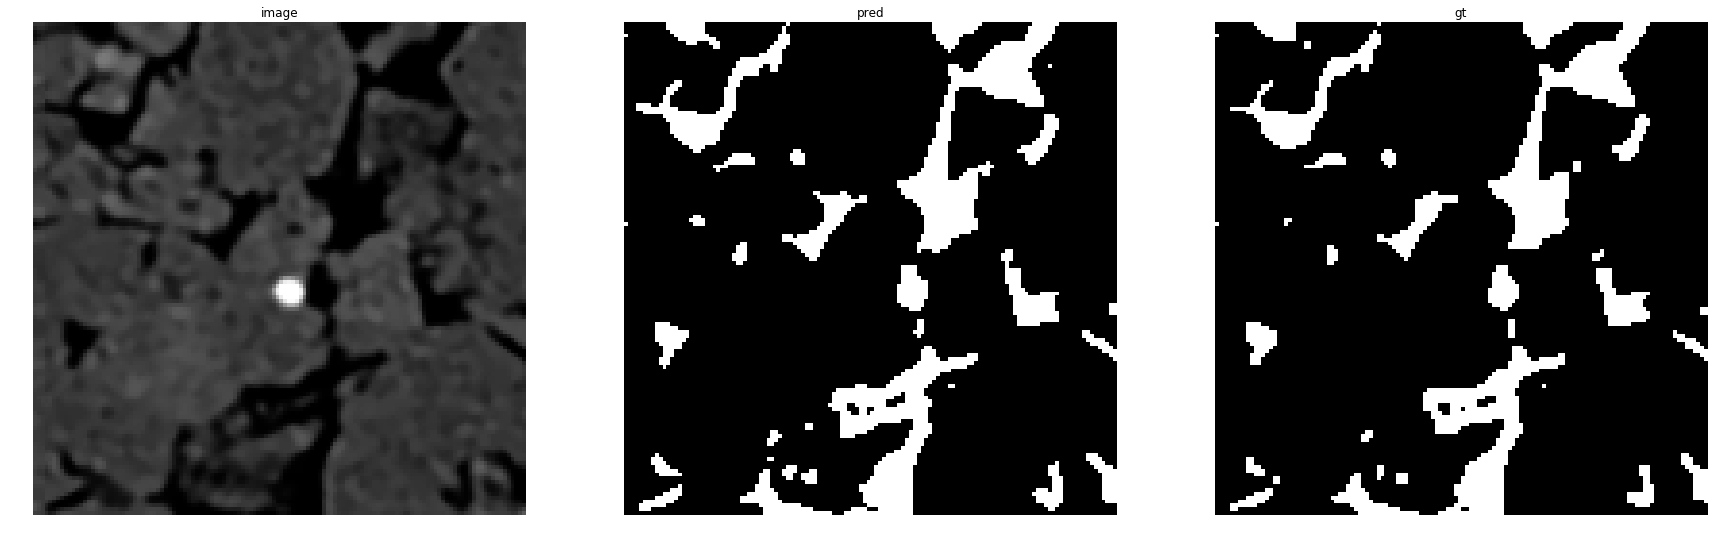

accuracy    : 0.986328125
precision   : 0.9194847020933977
recall      : 0.9896013864818024
f1          : 0.9532554257095158
pr_auc      : 0.9964336119823703
iou         : 0.9106858054226475


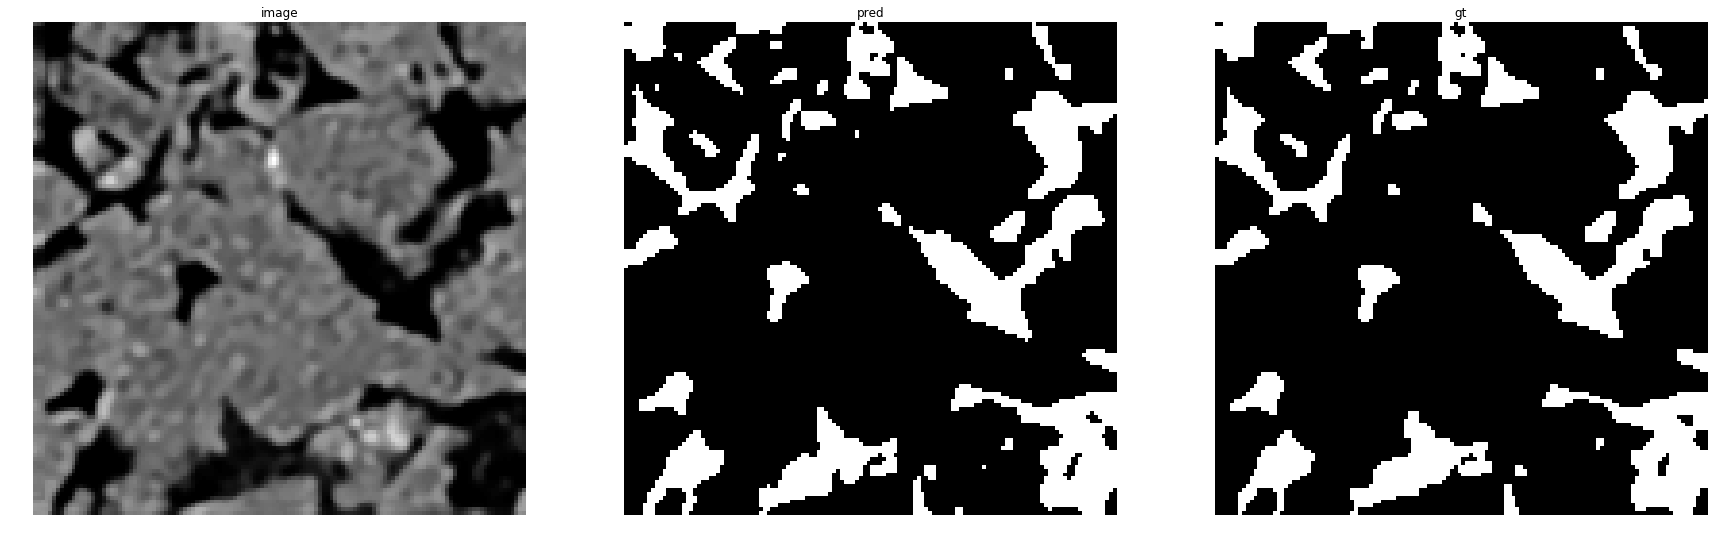

accuracy    : 0.98590087890625
precision   : 0.952816700028596
recall      : 0.9805768098881695
f1          : 0.966497461928934
pr_auc      : 0.9970502835758007
iou         : 0.9351669941060904
Urna_34


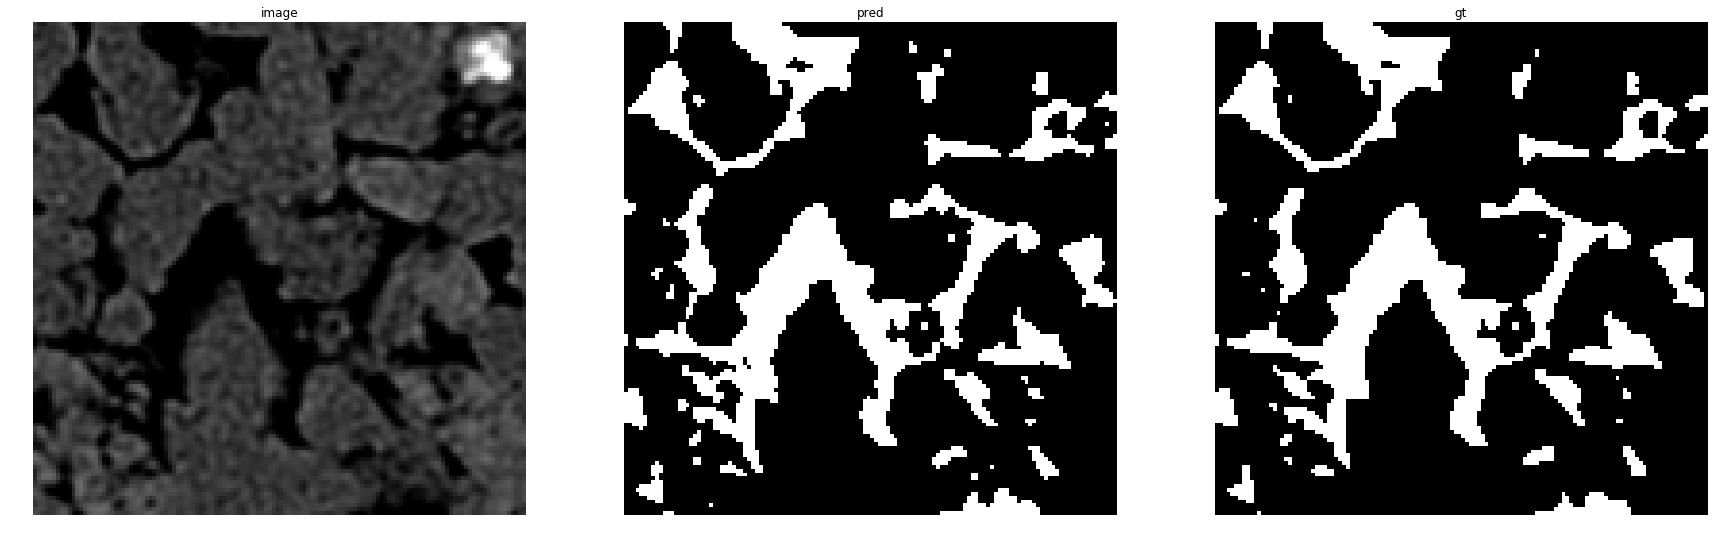

accuracy    : 0.98052978515625
precision   : 0.9392056201026749
recall      : 0.9736694677871148
f1          : 0.956127080181543
pr_auc      : 0.9949306272014646
iou         : 0.9159420289855073


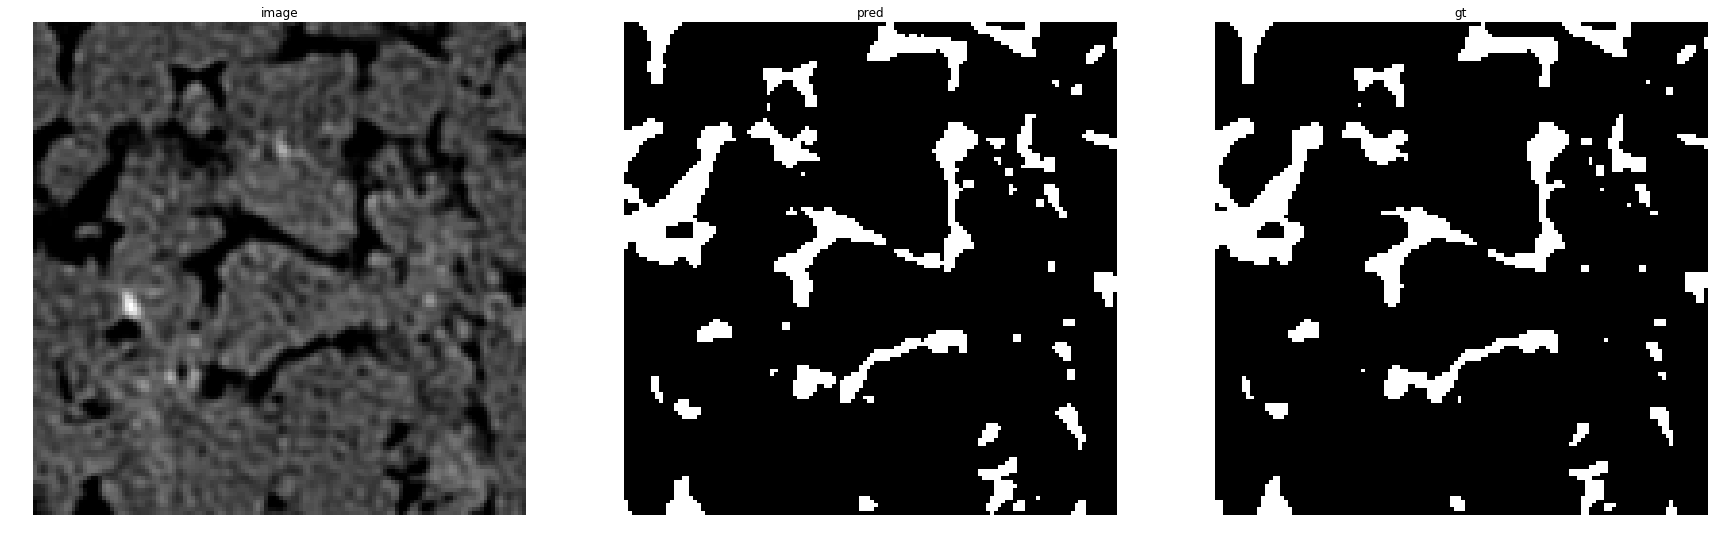

accuracy    : 0.98309326171875
precision   : 0.912745545911375
recall      : 0.9587332053742802
f1          : 0.9351743505733676
pr_auc      : 0.9893290425805583
iou         : 0.8782417582417582


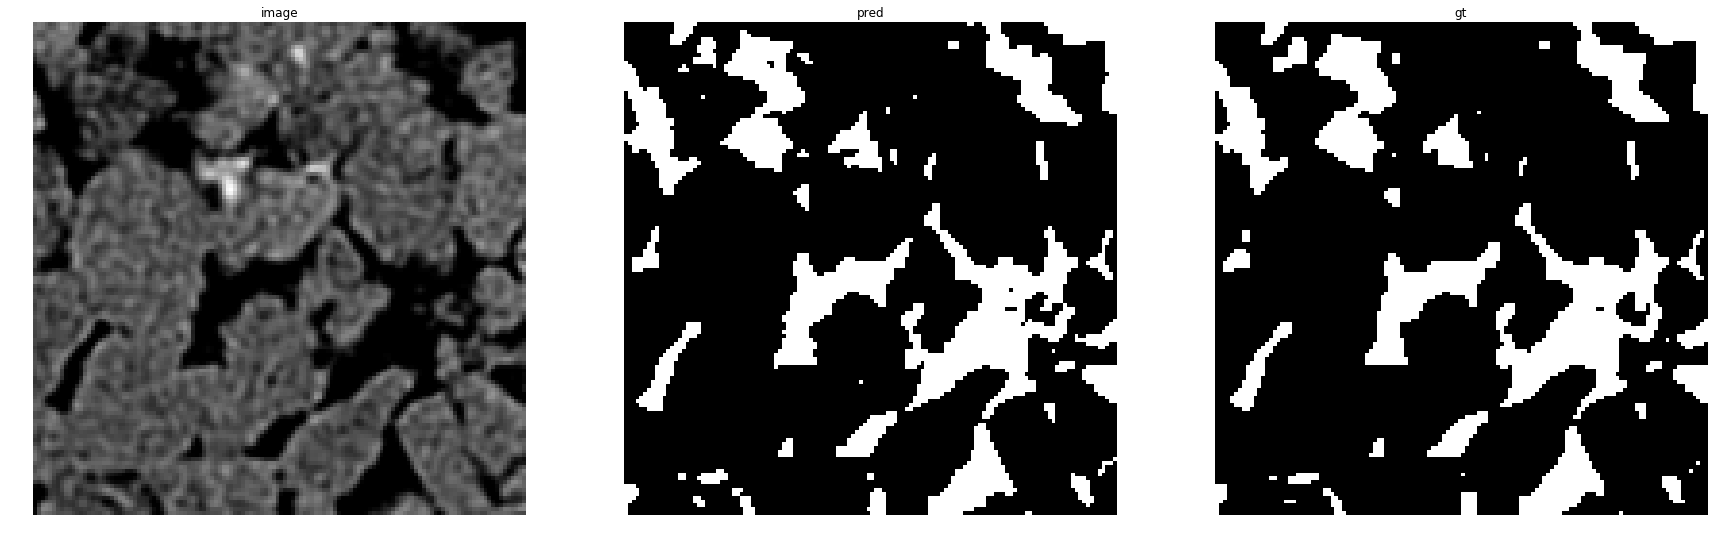

accuracy    : 0.98150634765625
precision   : 0.9452523524379812
recall      : 0.967600700525394
f1          : 0.9562959757680659
pr_auc      : 0.9942076498911023
iou         : 0.9162520729684909


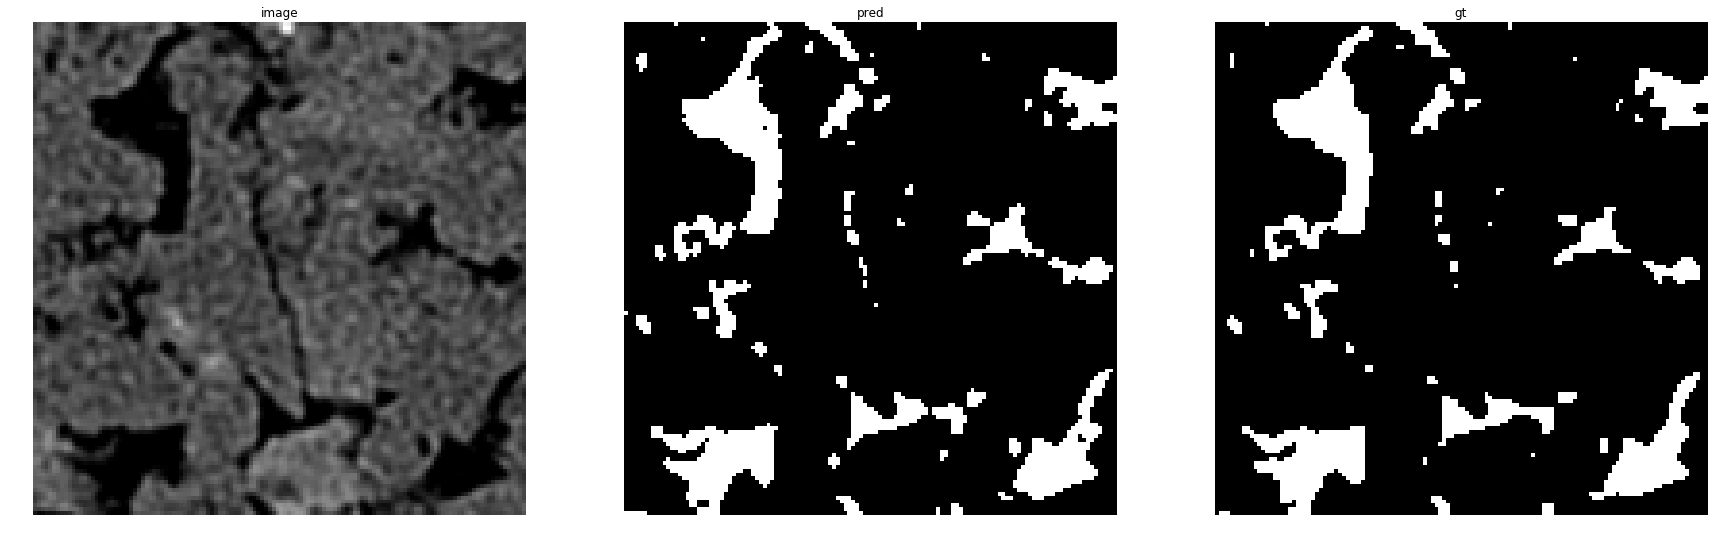

accuracy    : 0.982177734375
precision   : 0.9067291311754685
recall      : 0.9668483197093551
f1          : 0.9358241758241759
pr_auc      : 0.9908330505730922
iou         : 0.8793886823626601


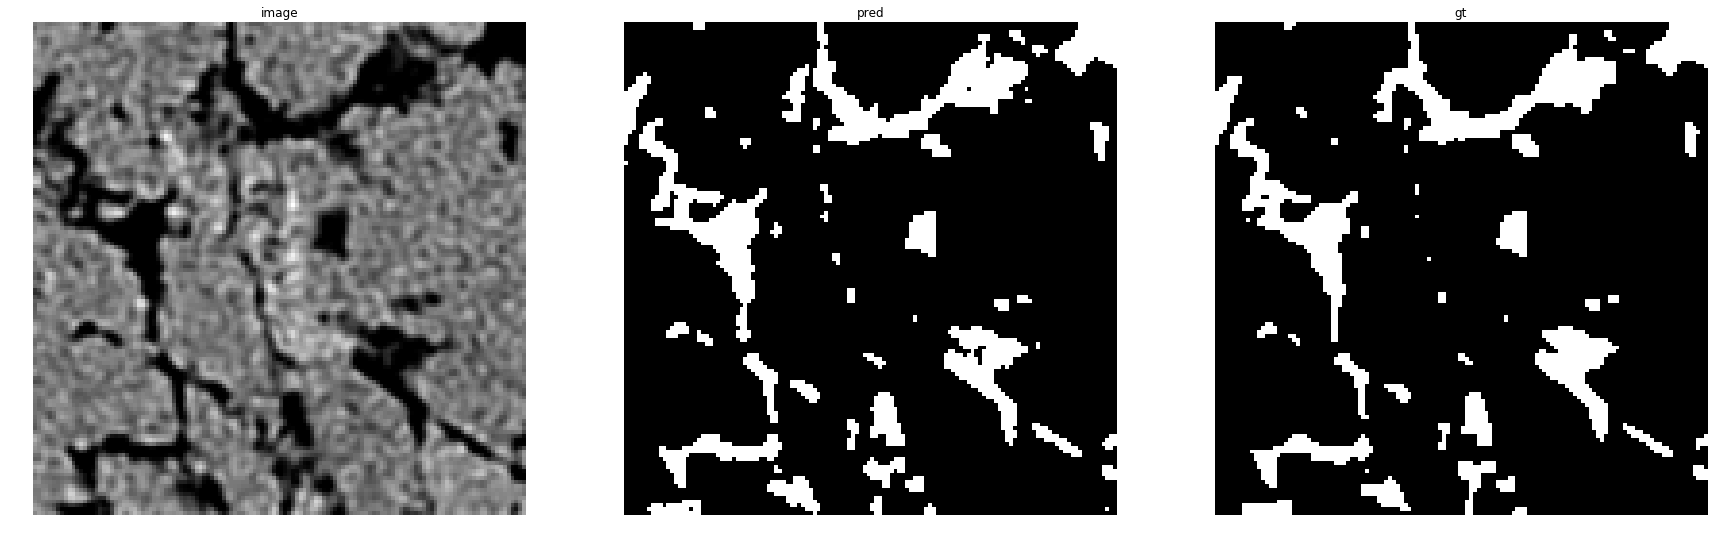

accuracy    : 0.9810791015625
precision   : 0.9102880658436214
recall      : 0.9600694444444444
f1          : 0.9345162653147444
pr_auc      : 0.9899470029299262
iou         : 0.8770816812053925


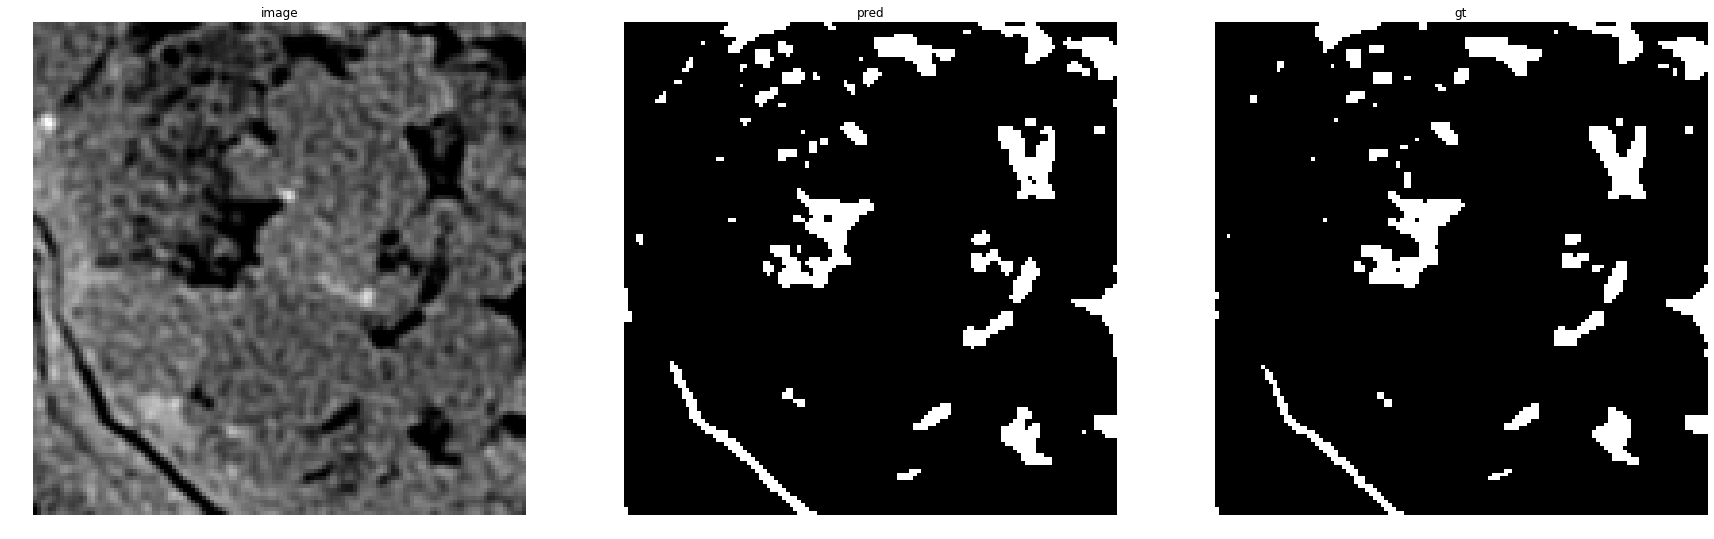

accuracy    : 0.98284912109375
precision   : 0.8678526048284625
recall      : 0.9492703266157053
f1          : 0.9067374709591768
pr_auc      : 0.9811094363252737
iou         : 0.8293867638129934


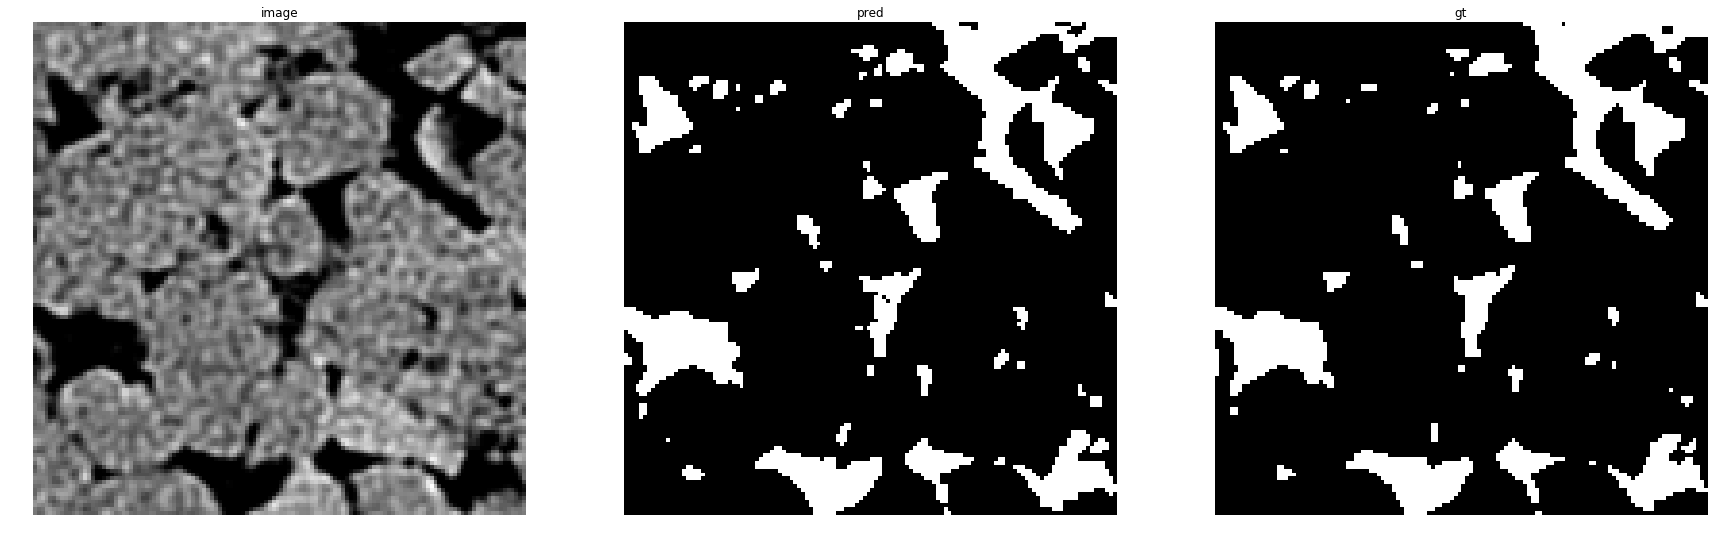

accuracy    : 0.98358154296875
precision   : 0.9305019305019305
recall      : 0.9739162380602499
f1          : 0.9517142344282894
pr_auc      : 0.9948429188696966
iou         : 0.9078767123287671


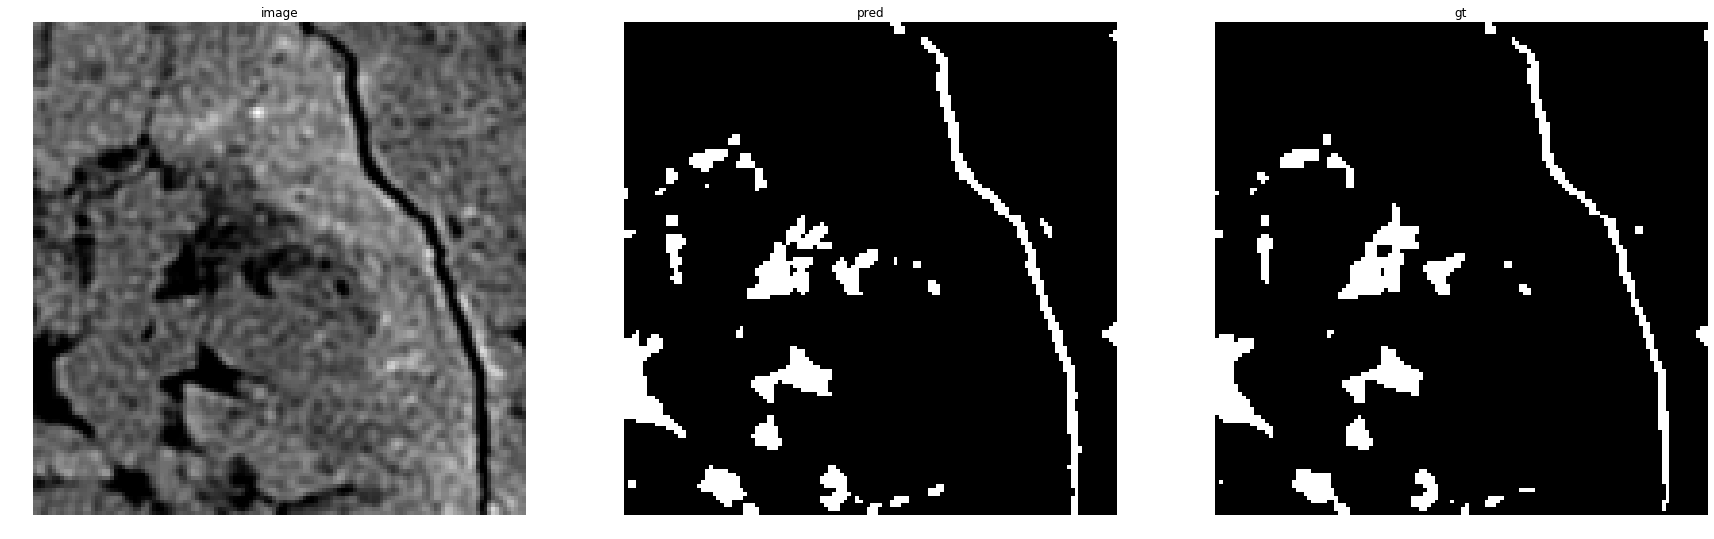

accuracy    : 0.98590087890625
precision   : 0.8725925925925926
recall      : 0.952303961196443
f1          : 0.9107073830691921
pr_auc      : 0.984586822699409
iou         : 0.8360539389638041


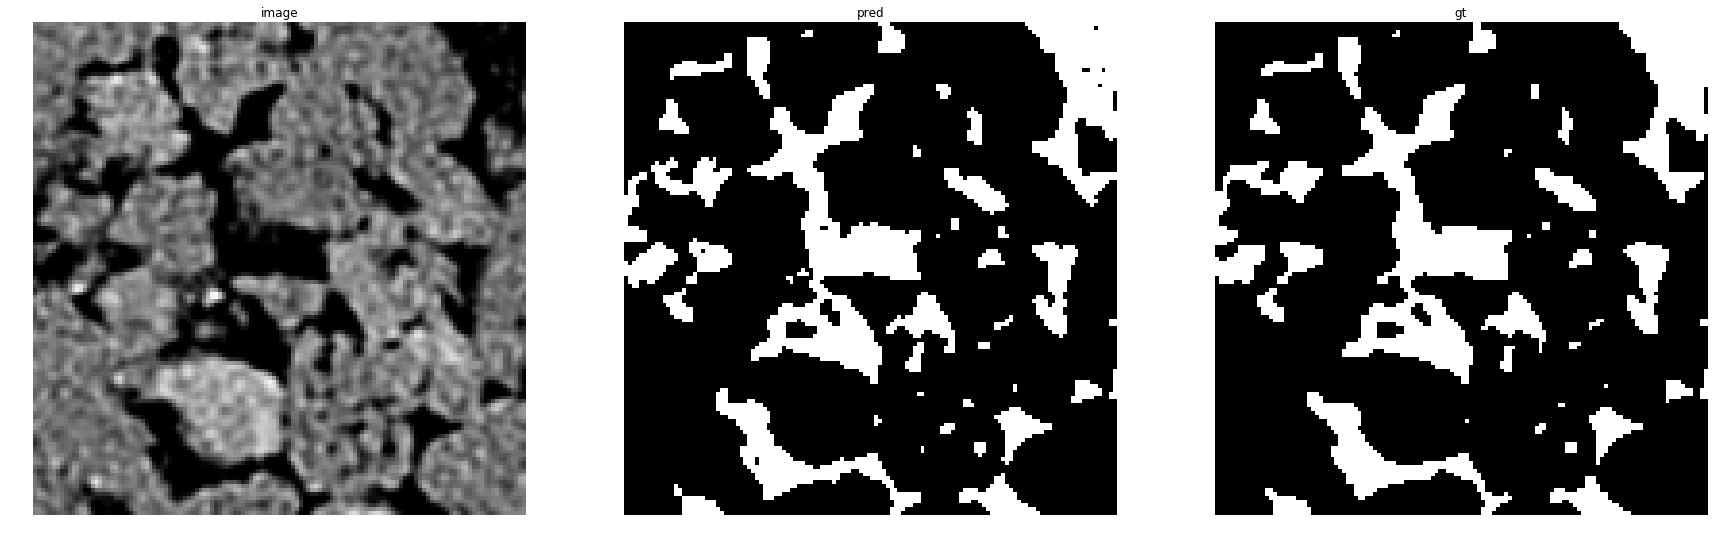

accuracy    : 0.98065185546875
precision   : 0.9434332119854383
recall      : 0.96699196326062
f1          : 0.9550673281360738
pr_auc      : 0.9941543710573727
iou         : 0.9139989148128053


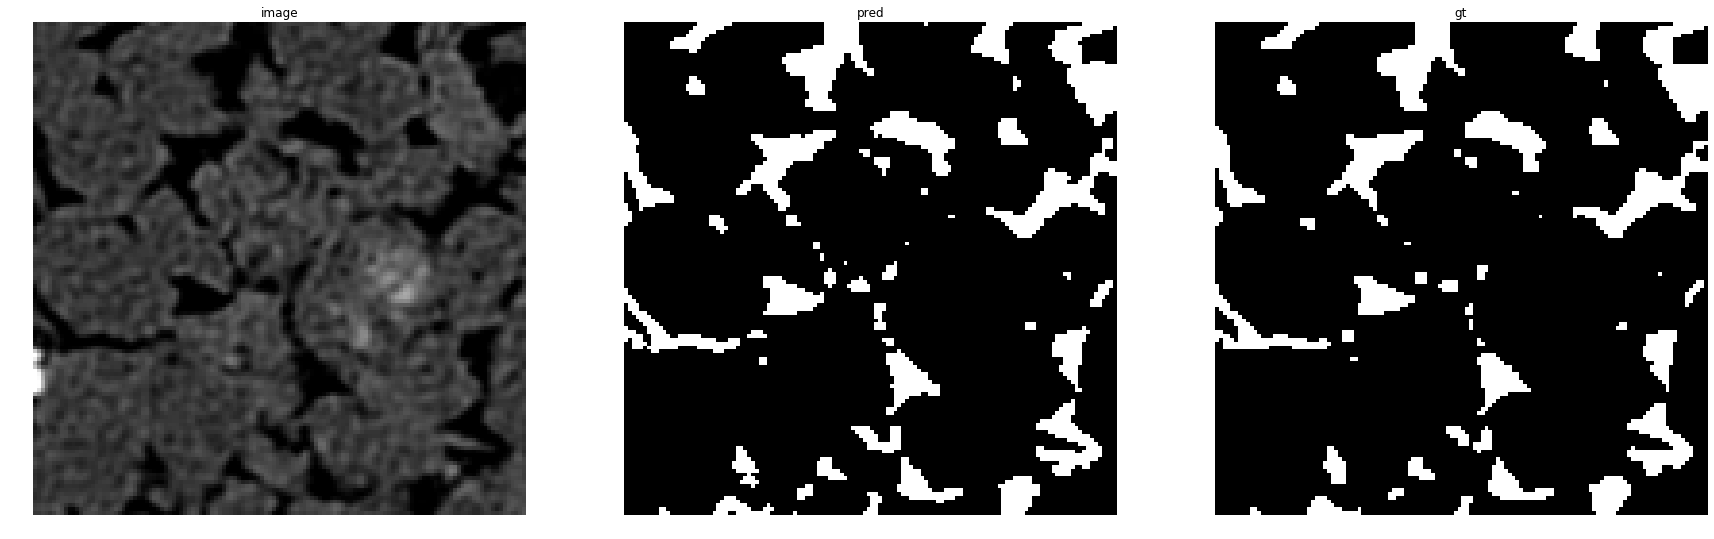

accuracy    : 0.983154296875
precision   : 0.9157727453317441
recall      : 0.97298438159561
f1          : 0.9435120753172329
pr_auc      : 0.9928341371218459
iou         : 0.8930647036032545


In [28]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    print(stack_name)
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt == 0:
            break

## Make prediction for particular stack

In [29]:
stack_name = 'carbRNF'

In [30]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:01, 676.91it/s]
100%|██████████| 700/700 [00:07<00:00, 92.47it/s] 


In [31]:
predicted_stack_1 = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 217268.74it/s]
25200it [02:08, 195.95it/s]
100%|██████████| 25200/25200 [00:08<00:00, 2843.41it/s]


In [32]:
predicted_stack_2 = stack.apply(
    model, 
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 109333.78it/s]
25200it [02:09, 194.37it/s]
100%|██████████| 25200/25200 [00:01<00:00, 13709.53it/s]


In [33]:
predicted_stack_3 = stack.apply(
    model, 
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 218592.03it/s]
25200it [02:21, 178.40it/s]
100%|██████████| 25200/25200 [00:02<00:00, 10588.66it/s]


In [34]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.8507397871385567

In [35]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8501195187587547

In [36]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8501505746373484

In [37]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.8640244025617511

In [39]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack_1.preds, 
                                    mode='stack')))

accuracy    : 0.981631
precision   : 0.919325
recall      : 0.919377
f1          : 0.919351
pr_auc      : 0.980822
iou         : 0.850740


In [14]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=True, preds=True)

25200it [00:00, 238496.09it/s]
25200it [01:58, 212.35it/s]
  0%|          | 0/700 [00:00<?, ?it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'cast'